# CNN PLATO

Este Notebook es el que se empleo para entrenar la red neuronal del Paper y para la realizacion del TFM.
De este modelo se generan los: 

    - best_model_a_completo_1.h5
    - best_model_b_completo_1.h5

Version notes:
En esta versión se implementa la estructura de diccionario para las llamadas a las variables.
Se tiene que instalar la version 2.8.0 de Tensorflow de Keras

In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.8.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installa

In [ ]:
import numpy as np
import random

# Establecer la semilla para reproducibilidad
seed = 13
np.random.seed(seed)
random.seed(seed)

## FM3

### Importación las imágenes

#### Plateaux

In [ ]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM3_imagenes_plateaux.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_plateaux = pickle.load(archivo)


Mounted at /content/drive


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_plateaux = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_plateaux)

In [ ]:
# Extraer imágenes y temperaturas
imagenes_fm3 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_plateaux])
temperaturas_fm3 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_plateaux])
eef_fm3 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_plateaux])

In [ ]:
print("Tamaño de imagenes", imagenes_fm3.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm3.shape)
print("Tamaño etiquetas EEF", eef_fm3.shape)

Tamaño de imagenes (24600, 11, 11)
Tamaño etiquetas Temperatura (24600,)
Tamaño etiquetas EEF (24600,)


Normalización

In [ ]:
#Normalización modelo A
# Normalizar las imágenes en torno a su valor máximo
maximos_por_imagen = np.max(imagenes_fm3, axis=(1, 2), keepdims=True)
imagenes_fm3_normalizadas = imagenes_fm3 / maximos_por_imagen

# Calcular los valores máximo y mínimo de temperatura y EEF
temp_max = np.max(temperaturas_fm3)
temp_min = np.min(temperaturas_fm3)
eef_max = np.max(eef_fm3)
eef_min = np.min(eef_fm3)

# Calcular el rango de temperatura y EEF
temp_range = temp_max - temp_min
eef_range = eef_max - eef_min

# Normalizar las etiquetas de temperatura y EEF
temperaturas_fm3_normalizadas = (temperaturas_fm3 - temp_min) / temp_range
eef_fm3_normalizadas = (eef_fm3 - eef_min) / eef_range

print("Tamaño de imagenes", imagenes_fm3_normalizadas.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm3_normalizadas.shape)
print("Tamaño etiquetas EEF", eef_fm3_normalizadas.shape)

Tamaño de imagenes (24600, 11, 11)
Tamaño etiquetas Temperatura (24600,)
Tamaño etiquetas EEF (24600,)


#### BFT

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM3_imagenes_bft.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_bft = pickle.load(archivo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_bft = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_bft)

In [ ]:
# Extraer imágenes y temperaturas
imagenes_bft_fm3 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_bft])
temperaturas_bft_fm3 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_bft])
eef_bft_fm3 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_bft])

In [ ]:
print("Tamaño de imagenes", imagenes_bft_fm3.shape)
print("Tamaño etiquetas Temperatura", temperaturas_bft_fm3.shape)
print("Tamaño etiquetas EFF", eef_bft_fm3.shape)

Tamaño de imagenes (5412, 11, 11)
Tamaño etiquetas Temperatura (5412,)
Tamaño etiquetas EFF (5412,)


In [ ]:
# Normalizar las imágenes en torno a su valor máximo
minimos_por_imagen_bft = np.min(imagenes_bft_fm3, axis=(1, 2), keepdims=True)
maximos_por_imagen_bft = np.max(imagenes_bft_fm3, axis=(1, 2), keepdims=True)
imagenes_bft_fm3_normalizadas = (imagenes_bft_fm3 - minimos_por_imagen_bft) / (maximos_por_imagen_bft - minimos_por_imagen_bft)

# Calcular los valores máximo y mínimo de temperatura y EEF
temp_bft_max = np.max(temperaturas_bft_fm3)
temp_bft_min = np.min(temperaturas_bft_fm3)
eef_bft_max = np.max(eef_bft_fm3)
eef_bft_min = np.min(eef_bft_fm3)

# Calcular el rango de temperatura y EEF
temp_bft_range = temp_bft_max - temp_bft_min
eef_bft_range = eef_bft_max - eef_bft_min

# Normalizar las etiquetas de temperatura y EEF
temperaturas_bft_fm3_normalizadas = (temperaturas_bft_fm3 - temp_bft_min) / temp_bft_range
eef_bft_fm3_normalizadas = (eef_bft_fm3 - eef_bft_min) / eef_bft_range

# Verificar que los datos normalizados estén dentro del rango esperado (0 a 1)
print("Valor máximo en las imágenes normalizadas:", np.max(imagenes_bft_fm3_normalizadas))
print("Valor mínimo en las imágenes normalizadas:", np.min(imagenes_bft_fm3_normalizadas))

print("Valor mínimo de las etiquetas de temperatura:", np.min(temperaturas_bft_fm3_normalizadas))
print("Valor máximo de las etiquetas de temperatura:", np.max(temperaturas_bft_fm3_normalizadas))

print("Valor mínimo de las etiquetas de EEF:", np.min(eef_bft_fm3_normalizadas))
print("Valor máximo de las etiquetas de EEF:", np.max(eef_bft_fm3_normalizadas))

print("Tamaño de imagenes", imagenes_bft_fm3_normalizadas.shape)
print("Tamaño etiquetas Temperatura", temperaturas_bft_fm3_normalizadas.shape)
print("Tamaño etiquetas EFF", eef_bft_fm3_normalizadas.shape)


Valor máximo en las imágenes normalizadas: 1.0
Valor mínimo en las imágenes normalizadas: 0.0
Valor mínimo de las etiquetas de temperatura: 0.0
Valor máximo de las etiquetas de temperatura: 1.0
Valor mínimo de las etiquetas de EEF: 0.0
Valor máximo de las etiquetas de EEF: 1.0
Tamaño de imagenes (5412, 11, 11)
Tamaño etiquetas Temperatura (5412,)
Tamaño etiquetas EFF (5412,)


In [ ]:
import numpy as np

# Calcular la media y la desviación estándar de los datos normalizados de EEF
media_eef = np.mean(eef_bft_fm3_normalizadas)
std_eef = np.std(eef_bft_fm3_normalizadas)

# Imprimir las estadísticas
print("Media de EEF normalizado:", media_eef)
print("Desviación estándar de EEF normalizado:", std_eef)


Media de EEF normalizado: 0.24387176417064918
Desviación estándar de EEF normalizado: 0.036491890138091086


#### Preprocesamiento

preprocesamiento de los datos del conjunto A

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#Division datos Modelo A

# Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
x_train_fm3, x_temp_val_test_fm3, temperature_train_fm3, temperature_val_test_fm3, eef_train_fm3, eef_val_test_fm3 = train_test_split(imagenes_fm3_normalizadas, temperaturas_fm3_normalizadas, eef_fm3_normalizadas, test_size=0.3, random_state=1)
x_valid_fm3, x_test_fm3, temperature_valid_fm3, temperature_test_fm3, eef_valid_fm3, eef_test_fm3 = train_test_split(x_temp_val_test_fm3, temperature_val_test_fm3, eef_val_test_fm3, test_size=0.5, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_fm3 = np.expand_dims(x_train_fm3, axis=-1)
x_valid_fm3 = np.expand_dims(x_valid_fm3, axis=-1)
x_test_fm3 = np.expand_dims(x_test_fm3, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_fm3:", x_train_fm3.shape)
print("Forma de x_valid_fm3:", x_valid_fm3.shape)
print("Forma de x_test_fm3:", x_test_fm3.shape)
print("Forma de temperature_train_fm3:", temperature_train_fm3.shape)
print("Forma de temperature_valid_fm3:", temperature_valid_fm3.shape)
print("Forma de temperature_test_fm3:", temperature_test_fm3.shape)
print("Forma de eef_train_fm3:", eef_train_fm3.shape)
print("Forma de eef_valid_fm3:", eef_valid_fm3.shape)
print("Forma de eef_test_fm3:", eef_test_fm3.shape)


Forma de x_train_fm3: (17220, 11, 11, 1)
Forma de x_valid_fm3: (3690, 11, 11, 1)
Forma de x_test_fm3: (3690, 11, 11, 1)
Forma de temperature_train_fm3: (17220,)
Forma de temperature_valid_fm3: (3690,)
Forma de temperature_test_fm3: (3690,)
Forma de eef_train_fm3: (17220,)
Forma de eef_valid_fm3: (3690,)
Forma de eef_test_fm3: (3690,)


Preprocesamiento de los datos del conjunto B

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# División de datos para imágenes, temperatura y EEF
x_train_img_fm3_bft, x_test_img_fm3_bft, temperature_train_fm3_bft, temperature_test_fm3_bft, eef_train_fm3_bft, eef_test_fm3_bft = train_test_split(imagenes_bft_fm3_normalizadas, temperaturas_bft_fm3_normalizadas, eef_bft_fm3_normalizadas, test_size=0.3, random_state=1)
x_train_img_fm3_bft, x_valid_img_fm3_bft, temperature_train_fm3_bft, temperature_valid_fm3_bft, eef_train_fm3_bft, eef_valid_fm3_bft = train_test_split(x_train_img_fm3_bft, temperature_train_fm3_bft, eef_train_fm3_bft, test_size=0.2, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_img_fm3_bft = np.expand_dims(x_train_img_fm3_bft, axis=-1)
x_valid_img_fm3_bft = np.expand_dims(x_valid_img_fm3_bft, axis=-1)
x_test_img_fm3_bft = np.expand_dims(x_test_img_fm3_bft, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_img_fm3_bft:", x_train_img_fm3_bft.shape)
print("Forma de x_valid_img_fm3_bft:", x_valid_img_fm3_bft.shape)
print("Forma de x_test_img_fm3_bft:", x_test_img_fm3_bft.shape)
print("Forma de temperature_train_fm3_bft:", temperature_train_fm3_bft.shape)
print("Forma de temperature_valid_fm3_bft:", temperature_valid_fm3_bft.shape)
print("Forma de temperature_test_fm3_bft:", temperature_test_fm3_bft.shape)
print("Forma de eef_train_fm3_bft:", eef_train_fm3_bft.shape)
print("Forma de eef_valid_fm3_bft:", eef_valid_fm3_bft.shape)
print("Forma de eef_test_fm3_bft:", eef_test_fm3_bft.shape)


Forma de x_train_img_fm3_bft: (3030, 11, 11, 1)
Forma de x_valid_img_fm3_bft: (758, 11, 11, 1)
Forma de x_test_img_fm3_bft: (1624, 11, 11, 1)
Forma de temperature_train_fm3_bft: (3030,)
Forma de temperature_valid_fm3_bft: (758,)
Forma de temperature_test_fm3_bft: (1624,)
Forma de eef_train_fm3_bft: (3030,)
Forma de eef_valid_fm3_bft: (758,)
Forma de eef_test_fm3_bft: (1624,)


#### Diccionario

Almacenamos todos los datos en un diccionario

In [ ]:
data_dict_fm3 = {
    'model_a': {
        'normalization': {
            'images': imagenes_fm3_normalizadas,
            'temperature': {
                'max': temp_max,
                'min': temp_min,
                'range': temp_range
            },
            'eef': {
                'max': eef_max,
                'min': eef_min,
                'range': eef_range
            }
        },
        'train': {
            'images': x_train_fm3,
            'temperature': temperature_train_fm3,
            'eef': eef_train_fm3
        },
        'valid': {
            'images': x_valid_fm3,
            'temperature': temperature_valid_fm3,
            'eef': eef_valid_fm3
        },
        'test': {
            'images': x_test_fm3,
            'temperature': temperature_test_fm3,
            'eef': eef_test_fm3
        }
    },
    'model_b': {
        'normalization': {
            'images': imagenes_bft_fm3_normalizadas,
            'temperature': {
                'max': temp_bft_max,
                'min': temp_bft_min,
                'range': temp_bft_range
            },
            'eef': {
                'max': eef_bft_max,
                'min': eef_bft_min,
                'range': eef_bft_range
            }
        },
        'train': {
            'images': x_train_img_fm3_bft,
            'temperature': temperature_train_fm3_bft,
            'eef': eef_train_fm3_bft
        },
        'valid': {
            'images': x_valid_img_fm3_bft,
            'temperature': temperature_valid_fm3_bft,
            'eef': eef_valid_fm3_bft
        },
        'test': {
            'images': x_test_img_fm3_bft,
            'temperature': temperature_test_fm3_bft,
            'eef': eef_test_fm3_bft
        }
    }
}


In [ ]:
import os
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo = os.path.join(directorio, "data_dict_fm3.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo, 'wb') as f:
    pickle.dump(data_dict_fm3, f)

print("El diccionario data_dict_fm3 se ha guardado en el archivo", archivo)


El diccionario data_dict_fm3 se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/data_dict_fm3.pkl


In [ ]:
import os
import pickle

def cargar_diccionario(desde_directorio, nombre_archivo):
    """
    Carga un diccionario desde un archivo pickle.

    Args:
    - desde_directorio (str): Directorio donde se encuentra el archivo.
    - nombre_archivo (str): Nombre del archivo pickle que contiene el diccionario.

    Returns:
    - dict: El diccionario cargado desde el archivo.
    """
    # Combinar el directorio y el nombre del archivo
    ruta_archivo = os.path.join(desde_directorio, nombre_archivo)

    # Verificar si el archivo existe
    if not os.path.exists(ruta_archivo):
        raise FileNotFoundError("El archivo no existe en la ruta especificada.")

    # Cargar el diccionario desde el archivo
    with open(ruta_archivo, 'rb') as f:
        diccionario_cargado = pickle.load(f)

    return diccionario_cargado

In [ ]:
# Llamar a la función para cargar el diccionario desde el archivo
data_dict_fm3 = cargar_diccionario(directorio, "data_dict_fm3.pkl")

### Diseño Modelo CNN

#### **Modelo Conjunto A: Platos Temperatura**


 El modelo A utiliza la información de la imagen, así como la temperatura y el EEF asociados, para aprender a predecir la temperatura y el EEF correspondientes. La influencia de la imagen se tiene en cuenta al extraer características relevantes de la imagen y combinarlas con la información de temperatura y EEF en la red de regresión.

Entradas del modelo A:

* El modelo A toma una imagen como entrada, junto con la temperatura y el EEF asociados a esa imagen.
* La imagen se pasa a través de capas convolucionales y de pooling para extraer características relevantes de la imagen.
* La temperatura y el EEF se ingresan directamente como entradas adicionales al modelo.

Rama convolucional compartida:

* La imagen de entrada se procesa a través de capas convolucionales y de pooling para extraer características visuales importantes.
* Estas características se utilizan para aprender representaciones de la imagen que son relevantes para predecir la temperatura y el EEF.

Red de regresión:

* Las características extraídas de la imagen se aplanan y se pasan a través de capas densas (totalmente conectadas) para combinarlas con la información de temperatura y EEF.
* La red de regresión aprende a mapear estas características combinadas a las salidas deseadas de temperatura y EEF.
* Se utilizan capas densas con activación lineal en las salidas para realizar la regresión y predecir los valores de temperatura y EEF.

In [ ]:

from keras.optimizers import Adam
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

# Definir la entrada para las imágenes
input_img = Input(shape=(11, 11, 1), name='input_image')
input_temp = Input(shape=(1,), name='input_temperature')
input_eef = Input(shape=(1,), name='input_eef')

# Rama compartida de la red convolucional
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((1, 1))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((1, 1))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((1, 1))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

# Rama de regresion_temperatura
regression_temperature_output = Dense(1, activation='linear', name='output_temperature')(x)

# Rama de regresión_eef
regression_eef_output = Dense(1, activation='linear', name='output_eef')(x)

# Construir el modelo
model_a = Model(inputs=[input_img, input_temp, input_eef],
                outputs=[regression_temperature_output, regression_eef_output])

# Compilar el modelo con hiperparámetros ajustados
optimizer = Adam(lr=0.001)  # Tasa de aprendizaje ajustada
model_a.compile(optimizer=optimizer,
                       loss={'output_temperature': 'mean_squared_error', 'output_eef': 'mean_squared_error'},
                       metrics={'output_temperature': 'mae', 'output_eef': 'mae'})

model_a.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 11, 11, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 11, 11, 64)           640       ['input_image[0][0]']         
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 11, 11, 128)          73856     ['max_pooling2d[0][0]']   

#### **Modelo conjunto B: Datos BFT**


El modelo B utiliza la información de la imagen, la temperatura y el EEF asociados para generar predicciones de temperatura y EEF, y también genera una imagen asociada con estas predicciones. La influencia de la imagen se tiene en cuenta al procesarla a través de una rama convolucional y al combinar las características visuales con la información de temperatura y EEF para generar la imagen asociada.

Entradas del modelo B:

* El modelo B toma una imagen como entrada, junto con la temperatura y el EEF asociados a esa imagen.
* Al igual que en el modelo A, la imagen se procesa a través de capas convolucionales y de pooling para extraer características visuales relevantes.
* La temperatura y el EEF se ingresan como entradas adicionales al modelo.

Red neuronal para la regresión de temperatura y EEF:

* Después de procesar la imagen a través de la rama convolucional, se combina con la información de temperatura y EEF.
* A diferencia del modelo A, en el modelo B, se agregan capas densas adicionales después de la concatenación de características visuales, temperatura y EEF.
* Estas capas densas aprenden a mapear las características combinadas a las salidas deseadas de temperatura y EEF.

Salidas del modelo B:

* El modelo B produce tres salidas: la temperatura predicha, el EEF predicho y una imagen generada.
* La imagen generada se produce mediante una capa convolucional de salida que tiene como objetivo generar una imagen que se asemeje a la imagen de entrada pero que esté asociada con la temperatura y el EEF predichos.

In [ ]:

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Definir la entrada para las imágenes
input_img_bft = Input(shape=(11, 11, 1), name='input_image_bft')
input_temp_bft = Input(shape=(1,), name='input_temperature_bft')
input_eef_bft = Input(shape=(1,), name='input_eef_bft')

# Rama compartida de la red convolucional
x_bft = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Conv2D(128, (3, 3), activation='relu', padding='same')(x_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Conv2D(256, (3, 3), activation='relu', padding='same')(x_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Flatten()(x_bft)
x_bft = Dense(128, activation='relu')(x_bft)

# Rama de regresión de temperatura
output_temp_bft = Dense(1, activation='linear', name='output_temperature_bft')(x_bft)

# Rama de regresión de EEF
output_eef_bft = Dense(1, activation='linear', name='output_eef_bft')(x_bft)

# Construir el modelo B
model_b = Model(inputs=[input_img_bft, input_temp_bft, input_eef_bft],
                outputs=[output_temp_bft, output_eef_bft])

# Compilar el modelo B
optimizer = 'adam'  # Puedes ajustar el optimizador según tus necesidades
model_b.compile(optimizer=optimizer,
                loss={'output_temperature_bft': 'mse', 'output_eef_bft': 'mse'},
                metrics={'output_temperature_bft': 'mae', 'output_eef_bft': 'mae'})

model_b.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image_bft (InputLaye  [(None, 11, 11, 1)]          0         []                            
 r)                                                                                               
                                                                                                  
 conv2d_3 (Conv2D)           (None, 11, 11, 64)           640       ['input_image_bft[0][0]']     
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 64)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                            


MSE (Mean Squared Error) y MAE (Mean Absolute Error) son métricas comunes utilizadas para evaluar el rendimiento de modelos de regresión en problemas de aprendizaje automático. Aquí hay una descripción de cada una:

* **Mean Squared Error (MSE):**

1. El MSE es una medida de la calidad de una estimación. Cuantifica el promedio de los errores al cuadrado entre los valores predichos y los valores reales en el conjunto de datos.
2. Se calcula tomando la media de las diferencias al cuadrado entre cada valor predicho y su valor real.
3. El MSE penaliza los errores más grandes de manera más significativa debido al término de cuadrados, lo que lo hace sensible a los outliers en los datos.

* **Mean Absolute Error (MAE):**

1. El MAE es otra métrica común utilizada para evaluar la precisión de las predicciones en problemas de regresión.
2. Se calcula tomando la media de las diferencias absolutas entre cada valor predicho y su valor real en el conjunto de datos.
3. A diferencia del MSE, el MAE no penaliza los errores más grandes de manera exponencial, lo que lo hace menos sensible a los outliers en los datos.

En resumen, el MSE y el MAE son medidas de la discrepancia entre los valores predichos por un modelo y los valores reales. El MSE es útil cuando se desea penalizar de manera más significativa los errores más grandes, mientras que el MAE es más robusto a los outliers y proporciona una medida de la magnitud promedio de los errores de predicción.

### Entrenamiento

#### Modelo A

In [ ]:
history_a = model_a.fit(
    {'input_image': data_dict_fm3['model_a']['train']['images'],
     'input_temperature': data_dict_fm3['model_a']['train']['temperature'],
     'input_eef': data_dict_fm3['model_a']['train']['eef']},
    {'output_temperature': data_dict_fm3['model_a']['train']['temperature'],
     'output_eef': data_dict_fm3['model_a']['train']['eef']},
    epochs=10,
    batch_size=32,
    validation_data=(
        {'input_image': data_dict_fm3['model_a']['valid']['images'],
         'input_temperature': data_dict_fm3['model_a']['valid']['temperature'],
         'input_eef': data_dict_fm3['model_a']['valid']['eef']},
        {'output_temperature': data_dict_fm3['model_a']['valid']['temperature'],
         'output_eef': data_dict_fm3['model_a']['valid']['eef']}
    )
)


Epoch 1/10
539/539 [==============================] - 472s 871ms/step - loss: 0.0215 - output_temperature_loss: 0.0177 - output_eef_loss: 0.0038 - output_temperature_mae: 0.0907 - output_eef_mae: 0.0365 - val_loss: 0.0052 - val_output_temperature_loss: 0.0043 - val_output_eef_loss: 9.4970e-04 - val_output_temperature_mae: 0.0483 - val_output_eef_mae: 0.0238
Epoch 2/10
539/539 [==============================] - 290s 538ms/step - loss: 0.0042 - output_temperature_loss: 0.0036 - output_eef_loss: 6.0895e-04 - output_temperature_mae: 0.0450 - output_eef_mae: 0.0192 - val_loss: 0.0037 - val_output_temperature_loss: 0.0034 - val_output_eef_loss: 2.4545e-04 - val_output_temperature_mae: 0.0434 - val_output_eef_mae: 0.0116
Epoch 3/10
539/539 [==============================] - 171s 317ms/step - loss: 0.0028 - output_temperature_loss: 0.0024 - output_eef_loss: 4.3221e-04 - output_temperature_mae: 0.0366 - output_eef_mae: 0.0162 - val_loss: 0.0027 - val_output_temperature_loss: 0.0021 - val_output

In [ ]:
# Evaluar model_a en el conjunto de datos de prueba
resultados = model_a.evaluate(
    {'input_image': data_dict_fm3['model_a']['test']['images'],
     'input_temperature': data_dict_fm3['model_a']['test']['temperature'],
     'input_eef': data_dict_fm3['model_a']['test']['eef']},
    {'output_temperature': data_dict_fm3['model_a']['test']['temperature'],
     'output_eef': data_dict_fm3['model_a']['test']['eef']}
)

print("Métricas de model_a:")
print(" - Loss total:", resultados[0])
print(" - Loss de la salida de temperatura:", resultados[1])
print(" - Loss de la salida de eef:", resultados[2])
print(" - MAE de la salida de temperatura:", resultados[3])
print(" - MAE de la salida de eef:", resultados[4])


116/116 [==============================] - 8s 69ms/step - loss: 0.0020 - output_temperature_loss: 0.0016 - output_eef_loss: 3.9566e-04 - output_temperature_mae: 0.0316 - output_eef_mae: 0.0168
Métricas de model_a:
 - Loss total: 0.001978518906980753
 - Loss de la salida de temperatura: 0.0015828582691028714
 - Loss de la salida de eef: 0.0003956607251893729
 - MAE de la salida de temperatura: 0.031599011272192
 - MAE de la salida de eef: 0.016794400289654732


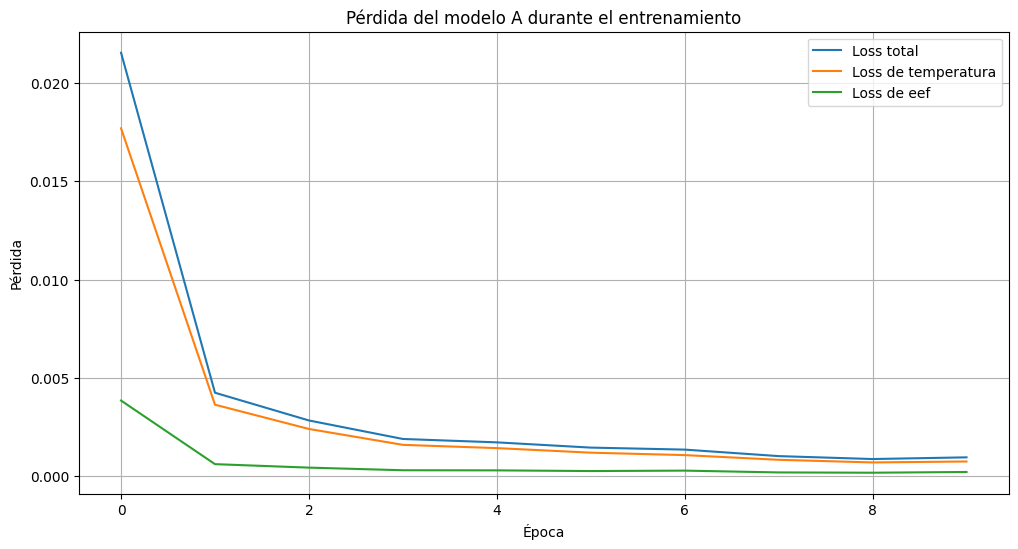

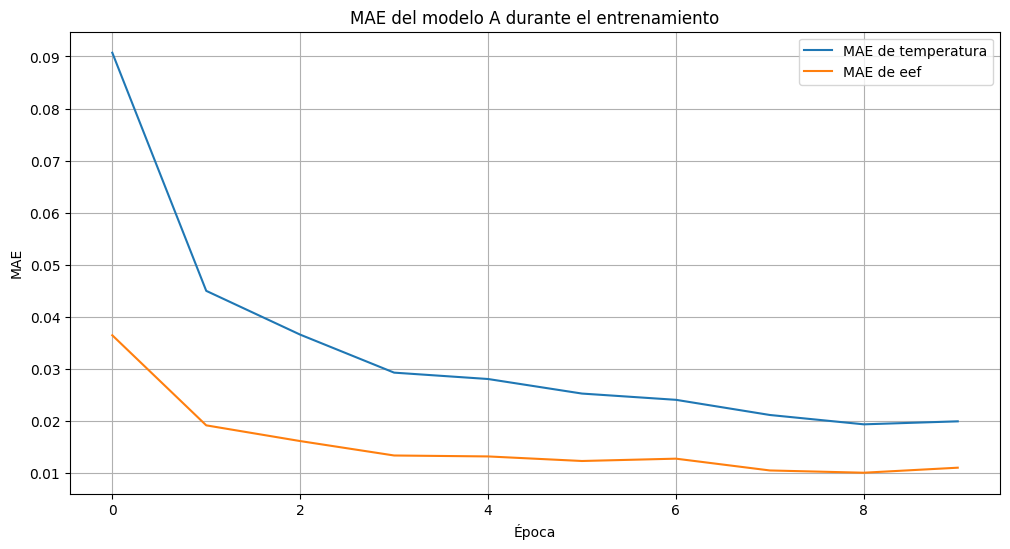

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento de model_a
history_a = history_a.history

# Graficar la pérdida total y la pérdida de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_a['loss'], label='Loss total')
plt.plot(history_a['output_temperature_loss'], label='Loss de temperatura')
plt.plot(history_a['output_eef_loss'], label='Loss de eef')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_a['output_temperature_mae'], label='MAE de temperatura')
plt.plot(history_a['output_eef_mae'], label='MAE de eef')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Guardamos el modelo
model_a.save("/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/model_a.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

# Ruta del archivo del modelo guardado
model_a_path = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/model_a.h5"

# Cargar el modelo
model_a = load_model(model_a_path)

# Resumen del modelo cargado
model_a.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 11, 11, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 11, 11, 64)           640       ['input_image[0][0]']         
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 11, 11, 128)          73856     ['max_pooling2d[0][0]']   

#### Modelo B

In [ ]:
history_b = model_b.fit(
    {'input_image_bft': data_dict_fm3['model_b']['train']['images'],
     'input_temperature_bft': data_dict_fm3['model_b']['train']['temperature'],
     'input_eef_bft': data_dict_fm3['model_b']['train']['eef']},
    {'output_temperature_bft': data_dict_fm3['model_b']['train']['temperature'],
     'output_eef_bft': data_dict_fm3['model_b']['train']['eef']},
    epochs=10,
    batch_size=32,
    validation_data=(
        {'input_image_bft': data_dict_fm3['model_b']['valid']['images'],
         'input_temperature_bft': data_dict_fm3['model_b']['valid']['temperature'],
         'input_eef_bft': data_dict_fm3['model_b']['valid']['eef']},
        {'output_temperature_bft': data_dict_fm3['model_b']['valid']['temperature'],
         'output_eef_bft': data_dict_fm3['model_b']['valid']['eef']}
    )
)


Epoch 1/10
95/95 [==============================] - 29s 280ms/step - loss: 0.0940 - output_temperature_bft_loss: 0.0825 - output_eef_bft_loss: 0.0115 - output_temperature_bft_mae: 0.2241 - output_eef_bft_mae: 0.0654 - val_loss: 0.0543 - val_output_temperature_bft_loss: 0.0530 - val_output_eef_bft_loss: 0.0012 - val_output_temperature_bft_mae: 0.1917 - val_output_eef_bft_mae: 0.0271
Epoch 2/10
95/95 [==============================] - 25s 264ms/step - loss: 0.0498 - output_temperature_bft_loss: 0.0486 - output_eef_bft_loss: 0.0012 - output_temperature_bft_mae: 0.1816 - output_eef_bft_mae: 0.0231 - val_loss: 0.0533 - val_output_temperature_bft_loss: 0.0524 - val_output_eef_bft_loss: 9.2581e-04 - val_output_temperature_bft_mae: 0.1901 - val_output_eef_bft_mae: 0.0237
Epoch 3/10
95/95 [==============================] - 24s 249ms/step - loss: 0.0493 - output_temperature_bft_loss: 0.0486 - output_eef_bft_loss: 7.5278e-04 - output_temperature_bft_mae: 0.1822 - output_eef_bft_mae: 0.0206 - val_

In [ ]:
resultados_b = model_b.evaluate(
    {'input_image_bft': data_dict_fm3['model_b']['test']['images'], 'input_temperature_bft': data_dict_fm3['model_b']['test']['temperature'], 'input_eef_bft': data_dict_fm3['model_b']['test']['eef']},
    {'output_temperature_bft': data_dict_fm3['model_b']['test']['temperature'], 'output_eef_bft': data_dict_fm3['model_b']['test']['eef']}
)

print("Métricas de model_b:")
print(" - Loss total:", resultados_b[0])
print(" - Loss de la salida de temperatura:", resultados_b[1])
print(" - Loss de la salida de eef:", resultados_b[2])
print(" - MAE de la salida de temperatura:", resultados_b[3])
print(" - MAE de la salida de eef:", resultados_b[4])


51/51 [==============================] - 4s 80ms/step - loss: 0.0510 - output_temperature_bft_loss: 0.0506 - output_eef_bft_loss: 3.4946e-04 - output_temperature_bft_mae: 0.1831 - output_eef_bft_mae: 0.0146
Métricas de model_b:
 - Loss total: 0.050951164215803146
 - Loss de la salida de temperatura: 0.050601713359355927
 - Loss de la salida de eef: 0.0003494570846669376
 - MAE de la salida de temperatura: 0.18311059474945068
 - MAE de la salida de eef: 0.014588573016226292


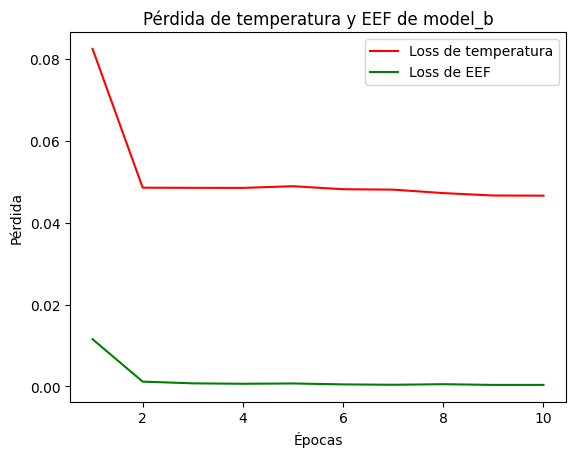

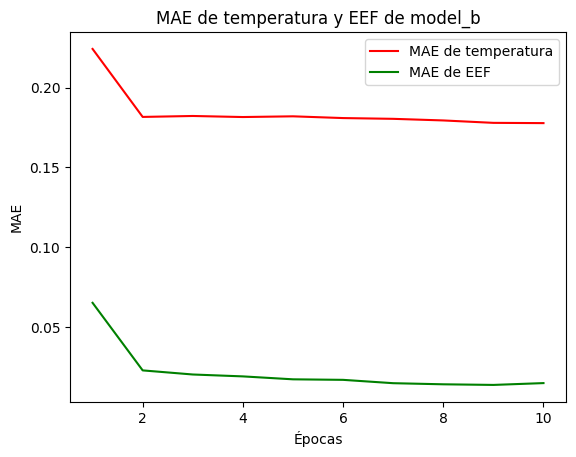

In [ ]:
import matplotlib.pyplot as plt

# Obtener historial de entrenamiento
loss_b = history_b.history['loss']
temp_loss_b = history_b.history['output_temperature_bft_loss']
eef_loss_b = history_b.history['output_eef_bft_loss']
temp_mae_b = history_b.history['output_temperature_bft_mae']
eef_mae_b = history_b.history['output_eef_bft_mae']

epochs = range(1, len(loss_b) + 1)

# Graficar pérdida de temperatura y EEF
plt.plot(epochs, temp_loss_b, 'r', label='Loss de temperatura')
plt.plot(epochs, eef_loss_b, 'g', label='Loss de EEF')
plt.title('Pérdida de temperatura y EEF de model_b')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar MAE de temperatura y EEF
plt.plot(epochs, temp_mae_b, 'r', label='MAE de temperatura')
plt.plot(epochs, eef_mae_b, 'g', label='MAE de EEF')
plt.title('MAE de temperatura y EEF de model_b')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
#Guardamos el modelo
model_b.save("/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/model_b.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

# Ruta del archivo del modelo guardado
model_b_path = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/model_b.h5"

# Cargar el modelo
model_b = load_model(model_b_path)

# Resumen del modelo cargado
model_b.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image_bft (InputLaye  [(None, 11, 11, 1)]          0         []                            
 r)                                                                                               
                                                                                                  
 conv2d_3 (Conv2D)           (None, 11, 11, 64)           640       ['input_image_bft[0][0]']     
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 64)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                            

### Resultados dispersión

Visualizar la dispersion de las predicciones

116/116 [==============================] - 10s 81ms/step


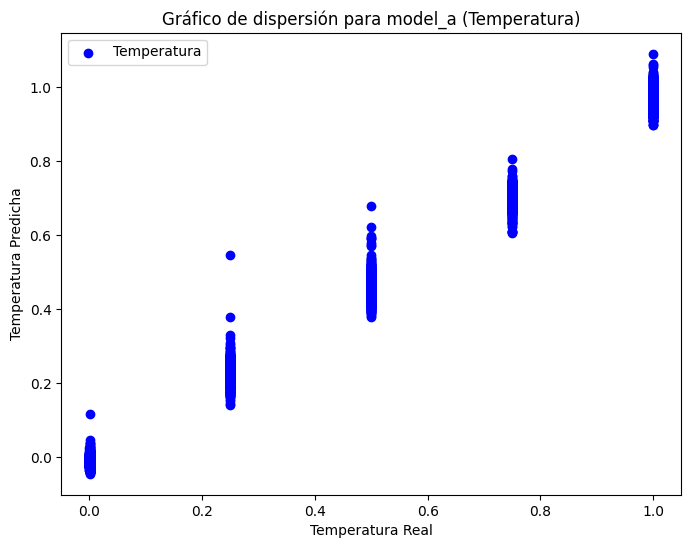

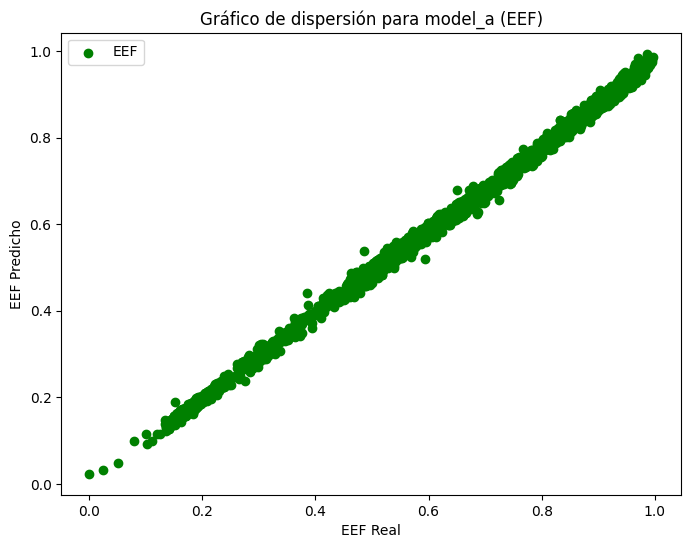

In [ ]:
import matplotlib.pyplot as plt

# Obtener predicciones de model_a
predictions_a = model_a.predict({'input_image': data_dict_fm3['model_a']['test']['images'], 'input_temperature': data_dict_fm3['model_a']['test']['temperature'], 'input_eef': data_dict_fm3['model_a']['test']['eef']})

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3['model_a']['test']['temperature'], predictions_a[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_a (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3['model_a']['test']['eef'], predictions_a[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_a (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()



51/51 [==============================] - 4s 74ms/step


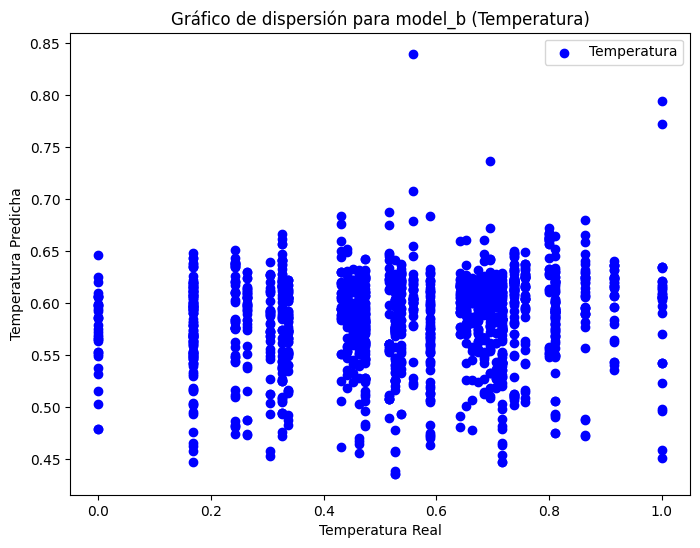

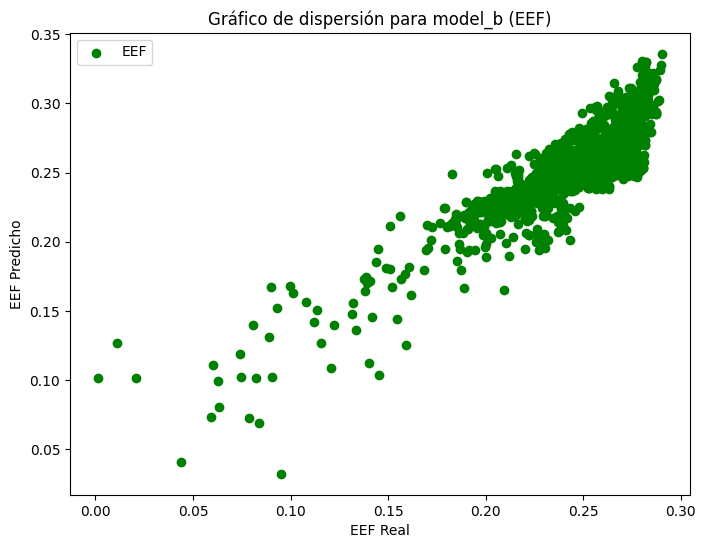

In [ ]:
import matplotlib.pyplot as plt

# Obtener predicciones de model_b
predictions_b = model_b.predict({'input_image_bft': data_dict_fm3['model_b']['test']['images'], 'input_temperature_bft': data_dict_fm3['model_b']['test']['temperature'], 'input_eef_bft': data_dict_fm3['model_b']['test']['eef']})

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3['model_b']['test']['temperature'], predictions_b[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_b (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3['model_b']['test']['eef'], predictions_b[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_b (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()



### Prediccion

In [ ]:
import random

def predecir_con_imagen_aleatoria(model_a, model_b, data_dict_fm3):
    # Seleccionar un índice aleatorio dentro del rango de x_test_img
    indice_aleatorio = random.randint(0, len(data_dict_fm3['model_a']['test']['temperature']) - 1)

    # Seleccionar la imagen correspondiente al índice aleatorio
    imagen_aleatoria = data_dict_fm3['model_a']['test']['images'][indice_aleatorio]

    # Seleccionar las temperaturas y EEF correspondientes al índice aleatorio
    temp_aleatoria = data_dict_fm3['model_a']['test']['temperature'][indice_aleatorio]
    eef_aleatoria = data_dict_fm3['model_a']['test']['eef'][indice_aleatorio]

    # Obtener la predicción del modelo A
    prediccion_temp_a, prediccion_eef_a = model_a.predict({'input_image': imagen_aleatoria.reshape(1, *imagen_aleatoria.shape), 'input_temperature': temp_aleatoria.reshape(1, 1), 'input_eef': eef_aleatoria.reshape(1, 1)})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagen_aleatoria.reshape(1, *imagen_aleatoria.shape), 'input_temperature_bft': prediccion_temp_a, 'input_eef_bft': prediccion_eef_a}

    # Obtener la predicción del modelo B
    prediccion_temp_b, prediccion_eef_b = model_b.predict(datos_modelo_b)

    # Desnormalizar las predicciones del modelo A
    temp_range_a = data_dict_fm3['model_a']['normalization']['temperature']['range']
    temp_min_a = data_dict_fm3['model_a']['normalization']['temperature']['min']
    eef_range_a = data_dict_fm3['model_a']['normalization']['eef']['range']
    eef_min_a = data_dict_fm3['model_a']['normalization']['eef']['min']
    prediccion_temp_a_desnormalizada = prediccion_temp_a * temp_range_a + temp_min_a
    prediccion_eef_a_desnormalizada = prediccion_eef_a * eef_range_a + eef_min_a

    # Desnormalizar las predicciones del modelo B
    temp_range_b = data_dict_fm3['model_b']['normalization']['temperature']['range']
    temp_min_b = data_dict_fm3['model_b']['normalization']['temperature']['min']
    eef_range_b = data_dict_fm3['model_b']['normalization']['eef']['range']
    eef_min_b = data_dict_fm3['model_b']['normalization']['eef']['min']
    prediccion_temp_b_desnormalizada = prediccion_temp_b * temp_range_b + temp_min_b
    prediccion_eef_b_desnormalizada = prediccion_eef_b * eef_range_b + eef_min_b

    # Desnormalizar las temperaturas y EEF reales
    temp_real_desnormalizada = temp_aleatoria * temp_range_a + temp_min_a
    eef_real_desnormalizada = eef_aleatoria * eef_range_a + eef_min_a

    # Mostrar los resultados
    print("Índice de la imagen seleccionada:", indice_aleatorio)
    print("Predicción de temperatura del modelo A (Predicha/Real):", prediccion_temp_a_desnormalizada, temp_real_desnormalizada)
    print("Predicción de eef del modelo A (Predicha/Real):", prediccion_eef_a_desnormalizada, eef_real_desnormalizada)
    print("Predicción de temperatura del modelo B (Predicha/Real):", prediccion_temp_b_desnormalizada, temp_real_desnormalizada)
    print("Predicción de eef del modelo B (Predicha/Real):", prediccion_eef_b_desnormalizada, eef_real_desnormalizada)

# Llamar a la función para predecir con una imagen aleatoria
predecir_con_imagen_aleatoria(model_a, model_b, data_dict_fm3)



1/1 [==============================] - 0s 130ms/step
Índice de la imagen seleccionada: 3498
Predicción de temperatura del modelo A (Predicha/Real): [[-75.85963]] -74.9818
Predicción de eef del modelo A (Predicha/Real): [[76.966064]] 79.32881757539856
Predicción de temperatura del modelo B (Predicha/Real): [[-77.67647]] -74.9818
Predicción de eef del modelo B (Predicha/Real): [[79.14776]] 79.32881757539856


In [ ]:
# Obtener las predicciones del modelo B para todo el conjunto de datos de prueba
predicciones_b = model_b.predict({'input_image_bft': data_dict_fm3['model_b']['test']['images'], 'input_temperature_bft': data_dict_fm3['model_b']['test']['temperature'], 'input_eef_bft': data_dict_fm3['model_b']['test']['eef']})

# Desempaquetar las predicciones
predicciones_temp_b = predicciones_b[0]
predicciones_eef_b = predicciones_b[1]

# Desnormalizar las predicciones de temperatura
temp_range_b = data_dict_fm3['model_b']['normalization']['temperature']['range']
temp_min_b = data_dict_fm3['model_b']['normalization']['temperature']['min']
predicciones_temp_b_desnorm = predicciones_temp_b * temp_range_b + temp_min_b

# Desnormalizar las predicciones de EEF
eef_range_b = data_dict_fm3['model_b']['normalization']['eef']['range']
eef_min_b = data_dict_fm3['model_b']['normalization']['eef']['min']
predicciones_eef_b_desnorm = predicciones_eef_b * eef_range_b + eef_min_b

# Calcular la media y desviación estándar de las predicciones desnormalizadas de temperatura y EEF
media_predicciones_temp_b = np.mean(predicciones_temp_b_desnorm)
desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b_desnorm)
media_predicciones_eef_b = np.mean(predicciones_eef_b_desnorm)
desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b_desnorm)

# Imprimir la media y desviación estándar de las predicciones desnormalizadas
print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)


51/51 [==============================] - 6s 121ms/step
Predicción de temperatura Best Focus: -77.676636 +- 0.00041580506
Predicción de EEF Best Focus: 81.5041 +- 6.1258783


#### Optimización Modelo B

GridSearch

## FM6


### Importación las imágenes

#### Plateaux - Modelo A

In [ ]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM6_imagenes_plateaux.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_plateaux_fm6 = pickle.load(archivo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_plateaux_fm6 = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_plateaux_fm6)

In [ ]:
# Extraer imágenes y temperaturas
imagenes_fm6 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_plateaux_fm6])
temperaturas_fm6 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_plateaux_fm6])
eef_fm6 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_plateaux_fm6])

In [ ]:
print("Tamaño de imagenes", imagenes_fm6.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm6.shape)
print("Tamaño etiquetas EEF", eef_fm6.shape)

Tamaño de imagenes (19680, 11, 11)
Tamaño etiquetas Temperatura (19680,)
Tamaño etiquetas EEF (19680,)


Normalizacion

In [ ]:
#Normalización modelo A
# Normalizar las imágenes en torno a su valor máximo
maximos_por_imagen_fm6 = np.max(imagenes_fm6, axis=(1, 2), keepdims=True)
imagenes_fm6_normalizadas = imagenes_fm6 / maximos_por_imagen_fm6

# Calcular los valores máximo y mínimo de temperatura y EEF
temp_max_fm6 = np.max(temperaturas_fm6)
temp_min_fm6 = np.min(temperaturas_fm6)
eef_max_fm6 = np.max(eef_fm6)
eef_min_fm6 = np.min(eef_fm6)

# Calcular el rango de temperatura y EEF
temp_range_fm6 = temp_max_fm6 - temp_min_fm6
eef_range_fm6 = eef_max_fm6 - eef_min_fm6

# Normalizar las etiquetas de temperatura y EEF
temperaturas_fm6_normalizadas = (temperaturas_fm6 - temp_min_fm6) / temp_range_fm6
eef_fm6_normalizadas = (eef_fm6 - eef_min_fm6) / eef_range_fm6

print("Tamaño de imagenes", imagenes_fm6_normalizadas.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm6_normalizadas.shape)
print("Tamaño etiquetas EEF", eef_fm6_normalizadas.shape)

Tamaño de imagenes (19680, 11, 11)
Tamaño etiquetas Temperatura (19680,)
Tamaño etiquetas EEF (19680,)


Preprocesamiento

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#Division datos Modelo

# Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
x_train_fm6, x_temp_val_test_fm6, temperature_train_fm6, temperature_val_test_fm6, eef_train_fm6, eef_val_test_fm6 = train_test_split(imagenes_fm6_normalizadas, temperaturas_fm6_normalizadas, eef_fm6_normalizadas, test_size=0.3, random_state=1)
x_valid_fm6, x_test_fm6, temperature_valid_fm6, temperature_test_fm6, eef_valid_fm6, eef_test_fm6 = train_test_split(x_temp_val_test_fm3, temperature_val_test_fm3, eef_val_test_fm3, test_size=0.5, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_fm6 = np.expand_dims(x_train_fm6, axis=-1)
x_valid_fm6 = np.expand_dims(x_valid_fm6, axis=-1)
x_test_fm6 = np.expand_dims(x_test_fm6, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_fm6:", x_train_fm6.shape)
print("Forma de x_valid_fm6:", x_valid_fm6.shape)
print("Forma de x_test_fm6:", x_test_fm6.shape)
print("Forma de temperature_train_fm6:", temperature_train_fm6.shape)
print("Forma de temperature_valid_fm6:", temperature_valid_fm6.shape)
print("Forma de temperature_test_fm6:", temperature_test_fm6.shape)
print("Forma de eef_train_fm6:", eef_train_fm6.shape)
print("Forma de eef_valid_fm6:", eef_valid_fm6.shape)
print("Forma de eef_test_fm6:", eef_test_fm6.shape)


Forma de x_train_fm6: (13776, 11, 11, 1)
Forma de x_valid_fm6: (3690, 11, 11, 1)
Forma de x_test_fm6: (3690, 11, 11, 1)
Forma de temperature_train_fm6: (13776,)
Forma de temperature_valid_fm6: (3690,)
Forma de temperature_test_fm6: (3690,)
Forma de eef_train_fm6: (13776,)
Forma de eef_valid_fm6: (3690,)
Forma de eef_test_fm6: (3690,)


#### BFT - Modelo B

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
#drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM6_imagenes_bft.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_bft_fm6 = pickle.load(archivo)


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_bft_fm6 = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_bft_fm6)

In [ ]:
# Extraer imágenes y temperaturas
imagenes_bft_fm6 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_bft_fm6])
temperaturas_bft_fm6 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_bft_fm6])
eef_bft_fm6 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_bft_fm6])

In [ ]:
print("Tamaño de imagenes", imagenes_bft_fm6.shape)
print("Tamaño etiquetas Temperatura", temperaturas_bft_fm6.shape)
print("Tamaño etiquetas EFF", eef_bft_fm6.shape)

Tamaño de imagenes (5412, 11, 11)
Tamaño etiquetas Temperatura (5412,)
Tamaño etiquetas EFF (5412,)


In [ ]:
#Normalizacion modelo B
# Normalizar las imágenes en torno a su valor máximo
maximos_por_imagen_bft_fm6 = np.max(imagenes_bft_fm6, axis=(1, 2), keepdims=True)
imagenes_bft_fm6_normalizadas = imagenes_bft_fm6 / maximos_por_imagen_bft_fm6

# Calcular los valores máximo y mínimo de temperatura y EEF
temp_bft_max_fm6 = np.max(temperaturas_bft_fm6)
temp_bft_min_fm6 = np.min(temperaturas_bft_fm6)
eef_bft_max_fm6 = np.max(eef_bft_fm6)
eef_bft_min_fm6 = np.min(eef_bft_fm6)

# Calcular el rango de temperatura y EEF
temp_bft_range_fm6 = temp_bft_max_fm6 - temp_bft_min_fm6
eef_bft_range_fm6 = eef_bft_max_fm6 - eef_bft_min_fm6

# Normalizar las etiquetas de temperatura y EEF
temperaturas_bft_fm6_normalizadas = (temperaturas_bft_fm6 - temp_bft_min_fm6) / temp_bft_range_fm6
eef_bft_fm6_normalizadas = (eef_bft_fm6 - eef_bft_min_fm6) / eef_bft_range_fm6

print("Tamaño de imagenes", imagenes_bft_fm6_normalizadas.shape)
print("Tamaño etiquetas Temperatura", temperaturas_bft_fm6_normalizadas.shape)
print("Tamaño etiquetas EFF", eef_bft_fm6_normalizadas.shape)


Tamaño de imagenes (5412, 11, 11)
Tamaño etiquetas Temperatura (5412,)
Tamaño etiquetas EFF (5412,)


Preprocesamiento de los datos del conjunto B

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#Division datos Modelo B

# División de datos para imágenes, temperatura y EEF
x_train_img_fm6_bft, x_test_img_fm6_bft, temperature_train_fm6_bft, temperature_test_fm6_bft, eef_train_fm6_bft, eef_test_fm6_bft = train_test_split(imagenes_bft_fm6_normalizadas, temperaturas_bft_fm6_normalizadas, eef_bft_fm6_normalizadas, test_size=0.3, random_state=1)
x_train_img_fm6_bft, x_valid_img_fm6_bft, temperature_train_fm6_bft, temperature_valid_fm6_bft, eef_train_fm6_bft, eef_valid_fm6_bft = train_test_split(x_train_img_fm6_bft, temperature_train_fm6_bft, eef_train_fm6_bft, test_size=0.2, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_img_fm6_bft = np.expand_dims(x_train_img_fm6_bft, axis=-1)
x_valid_img_fm6_bft = np.expand_dims(x_valid_img_fm6_bft, axis=-1)
x_test_img_fm6_bft = np.expand_dims(x_test_img_fm6_bft, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_img_fm6_bft:", x_train_img_fm6_bft.shape)
print("Forma de x_valid_img_fm6_bft:", x_valid_img_fm6_bft.shape)
print("Forma de x_test_img_fm6_bft:", x_test_img_fm6_bft.shape)
print("Forma de temperature_train_fm6_bft:", temperature_train_fm6_bft.shape)
print("Forma de temperature_valid_fm6_bft:", temperature_valid_fm6_bft.shape)
print("Forma de temperature_test_fm6_bft:", temperature_test_fm6_bft.shape)
print("Forma de eef_train_fm6_bft:", eef_train_fm6_bft.shape)
print("Forma de eef_valid_fm6_bft:", eef_valid_fm6_bft.shape)
print("Forma de eef_test_fm6_bft:", eef_test_fm6_bft.shape)


Forma de x_train_img_fm6_bft: (3030, 11, 11, 1)
Forma de x_valid_img_fm6_bft: (758, 11, 11, 1)
Forma de x_test_img_fm6_bft: (1624, 11, 11, 1)
Forma de temperature_train_fm6_bft: (3030,)
Forma de temperature_valid_fm6_bft: (758,)
Forma de temperature_test_fm6_bft: (1624,)
Forma de eef_train_fm6_bft: (3030,)
Forma de eef_valid_fm6_bft: (758,)
Forma de eef_test_fm6_bft: (1624,)


Creamos diccionario

In [ ]:
# Crear un nuevo diccionario para 'FM6' con los nuevos datos
data_dict_fm6 = {
    'model_a': {
        'normalization': {
            'images': imagenes_fm6_normalizadas,
            'temperature': {
                'max': temp_max_fm6,
                'min': temp_min_fm6,
                'range': temp_range_fm6
            },
            'eef': {
                'max': eef_max_fm6,
                'min': eef_min_fm6,
                'range': eef_range_fm6
            }
        },
        'train': {
            'images': x_train_fm6,
            'temperature': temperature_train_fm6,
            'eef': eef_train_fm6
        },
        'valid': {
            'images': x_valid_fm6,
            'temperature': temperature_valid_fm6,
            'eef': eef_valid_fm6
        },
        'test': {
            'images': x_test_fm6,
            'temperature': temperature_test_fm6,
            'eef': eef_test_fm6
        }
    },
    'model_b': {
        'normalization': {
            'images': imagenes_bft_fm6_normalizadas,
            'temperature': {
                'max': temp_bft_max_fm6,
                'min': temp_bft_min_fm6,
                'range': temp_bft_range_fm6
            },
            'eef': {
                'max': eef_bft_max_fm6,
                'min': eef_bft_min_fm6,
                'range': eef_bft_range_fm6
            }
        },
        'train': {
            'images': x_train_img_fm6_bft,
            'temperature': temperature_train_fm6_bft,
            'eef': eef_train_fm6_bft
        },
        'valid': {
            'images': x_valid_img_fm6_bft,
            'temperature': temperature_valid_fm6_bft,
            'eef': eef_valid_fm6_bft
        },
        'test': {
            'images': x_test_img_fm6_bft,
            'temperature': temperature_test_fm6_bft,
            'eef': eef_test_fm6_bft
        }
    }
}


In [ ]:
import os
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo = os.path.join(directorio, "data_dict_fm6.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo, 'wb') as f:
    pickle.dump(data_dict_fm6, f)

print("El diccionario data_dict_fm6 se ha guardado en el archivo", archivo)

El diccionario data_dict_fm6 se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/data_dict_fm6.pkl


### Evaluamos modelo

In [ ]:
# Obtener las predicciones del modelo B para todo el conjunto de datos de prueba
predicciones_b = model_b.predict({'input_image_bft': data_dict_fm6['model_b']['test']['images'], 'input_temperature_bft': data_dict_fm6['model_b']['test']['temperature'], 'input_eef_bft': data_dict_fm6['model_b']['test']['eef']})

# Desempaquetar las predicciones
predicciones_temp_b = predicciones_b[0]
predicciones_eef_b = predicciones_b[1]

# Desnormalizar las predicciones de temperatura
temp_range_b = data_dict_fm6['model_b']['normalization']['temperature']['range']
temp_min_b = data_dict_fm6['model_b']['normalization']['temperature']['min']
predicciones_temp_b_desnorm = predicciones_temp_b * temp_range_b + temp_min_b

# Desnormalizar las predicciones de EEF
eef_range_b = data_dict_fm6['model_b']['normalization']['eef']['range']
eef_min_b = data_dict_fm6['model_b']['normalization']['eef']['min']
predicciones_eef_b_desnorm = predicciones_eef_b * eef_range_b + eef_min_b

# Calcular la media y desviación estándar de las predicciones desnormalizadas de temperatura y EEF
media_predicciones_temp_b = np.mean(predicciones_temp_b_desnorm)
desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b_desnorm)
media_predicciones_eef_b = np.mean(predicciones_eef_b_desnorm)
desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b_desnorm)

# Imprimir la media y desviación estándar de las predicciones desnormalizadas
print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)


51/51 [==============================] - 4s 74ms/step
Predicción de temperatura Best Focus: -80.31004 +- 0.000283885
Predicción de EEF Best Focus: 44.052387 +- 2.0457442


## FM10

### Importación las imágenes

#### Plateaux - Modelo A

In [ ]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM10_imagenes_plateaux.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_plateaux_fm10 = pickle.load(archivo)


Mounted at /content/drive


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_plateaux_fm10 = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_plateaux_fm10)

In [ ]:
# Extraer imágenes y temperaturas
imagenes_fm10 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_plateaux_fm10])
temperaturas_fm10 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_plateaux_fm10])
eef_fm10 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_plateaux_fm10])

In [ ]:
print("Tamaño de imagenes", imagenes_fm10.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm10.shape)
print("Tamaño etiquetas EEF", eef_fm10.shape)

Tamaño de imagenes (24600, 11, 11)
Tamaño etiquetas Temperatura (24600,)
Tamaño etiquetas EEF (24600,)


Normalizacion

In [ ]:
#Normalización modelo A
# Normalizar las imágenes en torno a su valor máximo
maximos_por_imagen_fm10 = np.max(imagenes_fm10, axis=(1, 2), keepdims=True)
imagenes_fm10_normalizadas = imagenes_fm10 / maximos_por_imagen_fm10

# Calcular los valores máximo y mínimo de temperatura y EEF
temp_max_fm10 = np.max(temperaturas_fm10)
temp_min_fm10 = np.min(temperaturas_fm10)
eef_max_fm10 = np.max(eef_fm10)
eef_min_fm10 = np.min(eef_fm10)

# Calcular el rango de temperatura y EEF
temp_range_fm10 = temp_max_fm10 - temp_min_fm10
eef_range_fm10 = eef_max_fm10 - eef_min_fm10

# Normalizar las etiquetas de temperatura y EEF
temperaturas_fm10_normalizadas = (temperaturas_fm10 - temp_min_fm10) / temp_range_fm10
eef_fm10_normalizadas = (eef_fm10 - eef_min_fm10) / eef_range_fm10

print("Tamaño de imagenes", imagenes_fm10_normalizadas.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm10_normalizadas.shape)
print("Tamaño etiquetas EEF", eef_fm10_normalizadas.shape)

Tamaño de imagenes (24600, 11, 11)
Tamaño etiquetas Temperatura (24600,)
Tamaño etiquetas EEF (24600,)


Preprocesamiento

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# División de datos Modelo

# Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
x_train_fm10, x_temp_val_test_fm10, temperature_train_fm10, temperature_val_test_fm10, eef_train_fm10, eef_val_test_fm10 = train_test_split(imagenes_fm10_normalizadas, temperaturas_fm10_normalizadas, eef_fm10_normalizadas, test_size=0.3, random_state=1)
x_valid_fm10, x_test_fm10, temperature_valid_fm10, temperature_test_fm10, eef_valid_fm10, eef_test_fm10 = train_test_split(x_temp_val_test_fm10, temperature_val_test_fm10, eef_val_test_fm10, test_size=0.5, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_fm10 = np.expand_dims(x_train_fm10, axis=-1)
x_valid_fm10 = np.expand_dims(x_valid_fm10, axis=-1)
x_test_fm10 = np.expand_dims(x_test_fm10, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_fm10:", x_train_fm10.shape)
print("Forma de x_valid_fm10:", x_valid_fm10.shape)
print("Forma de x_test_fm10:", x_test_fm10.shape)
print("Forma de temperature_train_fm10:", temperature_train_fm10.shape)
print("Forma de temperature_valid_fm10:", temperature_valid_fm10.shape)
print("Forma de temperature_test_fm10:", temperature_test_fm10.shape)
print("Forma de eef_train_fm10:", eef_train_fm10.shape)
print("Forma de eef_valid_fm10:", eef_valid_fm10.shape)
print("Forma de eef_test_fm10:", eef_test_fm10.shape)


Forma de x_train_fm10: (17220, 11, 11, 1)
Forma de x_valid_fm10: (3690, 11, 11, 1)
Forma de x_test_fm10: (3690, 11, 11, 1)
Forma de temperature_train_fm10: (17220,)
Forma de temperature_valid_fm10: (3690,)
Forma de temperature_test_fm10: (3690,)
Forma de eef_train_fm10: (17220,)
Forma de eef_valid_fm10: (3690,)
Forma de eef_test_fm10: (3690,)


#### BFT - Modelo B

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
#drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM10_imagenes_bft.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_bft_fm10 = pickle.load(archivo)


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_bft_fm10 = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_bft_fm10)

In [ ]:
# Extraer imágenes y temperaturas
imagenes_bft_fm10 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_bft_fm10])
temperaturas_bft_fm10 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_bft_fm10])
eef_bft_fm10 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_bft_fm10])


In [ ]:
print("Tamaño de imagenes", imagenes_bft_fm10.shape)
print("Tamaño etiquetas Temperatura", temperaturas_bft_fm10.shape)
print("Tamaño etiquetas EFF", eef_bft_fm10.shape)

Tamaño de imagenes (5412, 11, 11)
Tamaño etiquetas Temperatura (5412,)
Tamaño etiquetas EFF (5412,)


In [ ]:
# Normalización Modelo B

# Normalizar las imágenes en torno a su valor máximo
maximos_por_imagen_bft_fm10 = np.max(imagenes_bft_fm10, axis=(1, 2), keepdims=True)
imagenes_bft_fm10_normalizadas = imagenes_bft_fm10 / maximos_por_imagen_bft_fm10

# Calcular los valores máximo y mínimo de temperatura y EEF
temp_bft_max_fm10 = np.max(temperaturas_bft_fm10)
temp_bft_min_fm10 = np.min(temperaturas_bft_fm10)
eef_bft_max_fm10 = np.max(eef_bft_fm10)
eef_bft_min_fm10 = np.min(eef_bft_fm10)

# Calcular el rango de temperatura y EEF
temp_bft_range_fm10 = temp_bft_max_fm10 - temp_bft_min_fm10
eef_bft_range_fm10 = eef_bft_max_fm10 - eef_bft_min_fm10

# Normalizar las etiquetas de temperatura y EEF
temperaturas_bft_fm10_normalizadas = (temperaturas_bft_fm10 - temp_bft_min_fm10) / temp_bft_range_fm10
eef_bft_fm10_normalizadas = (eef_bft_fm10 - eef_bft_min_fm10) / eef_bft_range_fm10

print("Tamaño de imagenes", imagenes_bft_fm10_normalizadas.shape)
print("Tamaño etiquetas Temperatura", temperaturas_bft_fm10_normalizadas.shape)
print("Tamaño etiquetas EFF", eef_bft_fm10_normalizadas.shape)


Tamaño de imagenes (5412, 11, 11)
Tamaño etiquetas Temperatura (5412,)
Tamaño etiquetas EFF (5412,)


Preprocesamiento de los datos del conjunto B

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# División de datos para Modelo B

# Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
x_train_img_fm10_bft, x_test_img_fm10_bft, temperature_train_fm10_bft, temperature_test_fm10_bft, eef_train_fm10_bft, eef_test_fm10_bft = train_test_split(imagenes_bft_fm10_normalizadas, temperaturas_bft_fm10_normalizadas, eef_bft_fm10_normalizadas, test_size=0.3, random_state=1)
x_train_img_fm10_bft, x_valid_img_fm10_bft, temperature_train_fm10_bft, temperature_valid_fm10_bft, eef_train_fm10_bft, eef_valid_fm10_bft = train_test_split(x_train_img_fm10_bft, temperature_train_fm10_bft, eef_train_fm10_bft, test_size=0.2, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_img_fm10_bft = np.expand_dims(x_train_img_fm10_bft, axis=-1)
x_valid_img_fm10_bft = np.expand_dims(x_valid_img_fm10_bft, axis=-1)
x_test_img_fm10_bft = np.expand_dims(x_test_img_fm10_bft, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_img_fm10_bft:", x_train_img_fm10_bft.shape)
print("Forma de x_valid_img_fm10_bft:", x_valid_img_fm10_bft.shape)
print("Forma de x_test_img_fm10_bft:", x_test_img_fm10_bft.shape)
print("Forma de temperature_train_fm10_bft:", temperature_train_fm10_bft.shape)
print("Forma de temperature_valid_fm10_bft:", temperature_valid_fm10_bft.shape)
print("Forma de temperature_test_fm10_bft:", temperature_test_fm10_bft.shape)
print("Forma de eef_train_fm10_bft:", eef_train_fm10_bft.shape)
print("Forma de eef_valid_fm10_bft:", eef_valid_fm10_bft.shape)
print("Forma de eef_test_fm10_bft:", eef_test_fm10_bft.shape)



Forma de x_train_img_fm10_bft: (3030, 11, 11, 1)
Forma de x_valid_img_fm10_bft: (758, 11, 11, 1)
Forma de x_test_img_fm10_bft: (1624, 11, 11, 1)
Forma de temperature_train_fm10_bft: (3030,)
Forma de temperature_valid_fm10_bft: (758,)
Forma de temperature_test_fm10_bft: (1624,)
Forma de eef_train_fm10_bft: (3030,)
Forma de eef_valid_fm10_bft: (758,)
Forma de eef_test_fm10_bft: (1624,)


Creamos diccionario

In [ ]:
# Crear un nuevo diccionario para 'FM10' con los nuevos datos
data_dict_fm10 = {
    'model_a': {
        'normalization': {
            'images': imagenes_fm10_normalizadas,
            'temperature': {
                'max': temp_max_fm10,
                'min': temp_min_fm10,
                'range': temp_range_fm10
            },
            'eef': {
                'max': eef_max_fm10,
                'min': eef_min_fm10,
                'range': eef_range_fm10
            }
        },
        'train': {
            'images': x_train_fm10,
            'temperature': temperature_train_fm10,
            'eef': eef_train_fm10
        },
        'valid': {
            'images': x_valid_fm10,
            'temperature': temperature_valid_fm10,
            'eef': eef_valid_fm10
        },
        'test': {
            'images': x_test_fm10,
            'temperature': temperature_test_fm10,
            'eef': eef_test_fm10
        }
    },
    'model_b': {
        'normalization': {
            'images': imagenes_bft_fm10_normalizadas,
            'temperature': {
                'max': temp_bft_max_fm10,
                'min': temp_bft_min_fm10,
                'range': temp_bft_range_fm10
            },
            'eef': {
                'max': eef_bft_max_fm10,
                'min': eef_bft_min_fm10,
                'range': eef_bft_range_fm10
            }
        },
        'train': {
            'images': x_train_img_fm10_bft,
            'temperature': temperature_train_fm10_bft,
            'eef': eef_train_fm10_bft
        },
        'valid': {
            'images': x_valid_img_fm10_bft,
            'temperature': temperature_valid_fm10_bft,
            'eef': eef_valid_fm10_bft
        },
        'test': {
            'images': x_test_img_fm10_bft,
            'temperature': temperature_test_fm10_bft,
            'eef': eef_test_fm10_bft
        }
    }
}


In [ ]:
import os
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo = os.path.join(directorio, "data_dict_fm10.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo, 'wb') as f:
    pickle.dump(data_dict_fm10, f)

print("El diccionario data_dict_fm10 se ha guardado en el archivo", archivo)

El diccionario data_dict_fm10 se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/data_dict_fm10.pkl


### Prediccion

In [ ]:
# Obtener las predicciones del modelo B para todo el conjunto de datos de prueba
predicciones_b = model_b.predict({'input_image_bft': data_dict_fm10['model_b']['test']['images'], 'input_temperature_bft': data_dict_fm10['model_b']['test']['temperature'], 'input_eef_bft': data_dict_fm10['model_b']['test']['eef']})

# Desempaquetar las predicciones
predicciones_temp_b = predicciones_b[0]
predicciones_eef_b = predicciones_b[1]

# Desnormalizar las predicciones de temperatura
temp_range_b = data_dict_fm10['model_b']['normalization']['temperature']['range']
temp_min_b = data_dict_fm10['model_b']['normalization']['temperature']['min']
predicciones_temp_b_desnorm = predicciones_temp_b * temp_range_b + temp_min_b

# Desnormalizar las predicciones de EEF
eef_range_b = data_dict_fm10['model_b']['normalization']['eef']['range']
eef_min_b = data_dict_fm10['model_b']['normalization']['eef']['min']
predicciones_eef_b_desnorm = predicciones_eef_b * eef_range_b + eef_min_b

# Calcular la media y desviación estándar de las predicciones desnormalizadas de temperatura y EEF
media_predicciones_temp_b = np.mean(predicciones_temp_b_desnorm)
desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b_desnorm)
media_predicciones_eef_b = np.mean(predicciones_eef_b_desnorm)
desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b_desnorm)

# Imprimir la media y desviación estándar de las predicciones desnormalizadas
print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)


51/51 [==============================] - 4s 81ms/step
Predicción de temperatura Best Focus: -82.89002 +- 0.0003447946
Predicción de EEF Best Focus: 46.68437 +- 1.8849885


### Prediccion con un Obsid

#### Plateaux - Modelo A

In [ ]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM10_imagenes_-70.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_plateaux_fm10_70 = pickle.load(archivo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_plateaux_fm10_70 = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_plateaux_fm10_70)

In [ ]:
# Extraer imágenes y temperaturas
imagenes_fm10_70 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_plateaux_fm10_70])
temperaturas_fm10_70 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_plateaux_fm10_70])
eef_fm10_70 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_plateaux_fm10_70])

In [ ]:
print("Tamaño de imagenes", imagenes_fm10_70.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm10_70.shape)
print("Tamaño etiquetas EEF", eef_fm10_70.shape)

Tamaño de imagenes (4920, 11, 11)
Tamaño etiquetas Temperatura (4920,)
Tamaño etiquetas EEF (4920,)


Normalizacion

In [ ]:
#Normalización modelo A
# Normalizar las imágenes en torno a su valor máximo
maximos_por_imagen_fm10_70 = np.max(imagenes_fm10_70, axis=(1, 2), keepdims=True)
imagenes_fm10_70_normalizadas = imagenes_fm10_70 / maximos_por_imagen_fm10_70

# Calcular los valores máximo y mínimo de temperatura y EEF
temp_max_fm10_70 = np.max(temperaturas_fm10_70)
temp_min_fm10_70 = np.min(temperaturas_fm10_70)
eef_max_fm10_70 = np.max(eef_fm10_70)
eef_min_fm10_70 = np.min(eef_fm10_70)

# Calcular el rango de temperatura y EEF
temp_range_fm10_70 = temp_max_fm10_70 - temp_min_fm10_70
eef_range_fm10_70 = eef_max_fm10_70 - eef_min_fm10_70

# Normalizar las etiquetas de temperatura y EEF
temperaturas_fm10_70_normalizadas = (temperaturas_fm10_70 - temp_min_fm10_70) / temp_range_fm10_70
eef_fm10_70_normalizadas = (eef_fm10_70 - eef_min_fm10_70) / eef_range_fm10_70

print("Tamaño de imagenes", imagenes_fm10_70_normalizadas.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm10_70_normalizadas.shape)
print("Tamaño etiquetas EEF", eef_fm10_70_normalizadas.shape)

Tamaño de imagenes (4920, 11, 11)
Tamaño etiquetas Temperatura (4920,)
Tamaño etiquetas EEF (4920,)


Preprocesamiento

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# División de datos Modelo

# Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
x_train_fm10_70, x_temp_val_test_fm10_70, temperature_train_fm10_70, temperature_val_test_fm10_70, eef_train_fm10_70, eef_val_test_fm10_70 = train_test_split(imagenes_fm10_70_normalizadas, temperaturas_fm10_70_normalizadas, eef_fm10_70_normalizadas, test_size=0.3, random_state=1)
x_valid_fm10_70, x_test_fm10_70, temperature_valid_fm10_70, temperature_test_fm10_70, eef_valid_fm10_70, eef_test_fm10_70 = train_test_split(x_temp_val_test_fm10_70, temperature_val_test_fm10_70, eef_val_test_fm10_70, test_size=0.5, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_fm10_70 = np.expand_dims(x_train_fm10_70, axis=-1)
x_valid_fm10_70 = np.expand_dims(x_valid_fm10_70, axis=-1)
x_test_fm10_70 = np.expand_dims(x_test_fm10_70, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_fm10_70:", x_train_fm10_70.shape)
print("Forma de x_valid_fm10_70:", x_valid_fm10_70.shape)
print("Forma de x_test_fm10_70:", x_test_fm10_70.shape)
print("Forma de temperature_train_fm10_70:", temperature_train_fm10_70.shape)
print("Forma de temperature_valid_fm10_70:", temperature_valid_fm10_70.shape)
print("Forma de temperature_test_fm10_70:", temperature_test_fm10_70.shape)
print("Forma de eef_train_fm10_70:", eef_train_fm10_70.shape)
print("Forma de eef_valid_fm10_70:", eef_valid_fm10_70.shape)
print("Forma de eef_test_fm10_70:", eef_test_fm10_70.shape)


Forma de x_train_fm10_70: (3444, 11, 11, 1)
Forma de x_valid_fm10_70: (738, 11, 11, 1)
Forma de x_test_fm10_70: (738, 11, 11, 1)
Forma de temperature_train_fm10_70: (3444,)
Forma de temperature_valid_fm10_70: (738,)
Forma de temperature_test_fm10_70: (738,)
Forma de eef_train_fm10_70: (3444,)
Forma de eef_valid_fm10_70: (738,)
Forma de eef_test_fm10_70: (738,)


In [ ]:
# Crear un nuevo diccionario para 'FM10' con los nuevos datos
data_dict_fm10_70 = {
    'model_a': {
        'normalization': {
            'images': imagenes_fm10_70_normalizadas,
            'temperature': {
                'max': temp_max_fm10_70,
                'min': temp_min_fm10_70,
                'range': temp_range_fm10_70
            },
            'eef': {
                'max': eef_max_fm10_70,
                'min': eef_min_fm10_70,
                'range': eef_range_fm10_70
            }
        },
        'train': {
            'images': x_train_fm10_70,
            'temperature': temperature_train_fm10_70,
            'eef': eef_train_fm10_70
        },
        'valid': {
            'images': x_valid_fm10_70,
            'temperature': temperature_valid_fm10_70,
            'eef': eef_valid_fm10_70
        },
        'test': {
            'images': x_test_fm10_70,
            'temperature': temperature_test_fm10_70,
            'eef': eef_test_fm10_70
        }
    },
    'model_b': {
        'normalization': {
            'images': imagenes_bft_fm10_normalizadas,
            'temperature': {
                'max': temp_bft_max_fm10,
                'min': temp_bft_min_fm10,
                'range': temp_bft_range_fm10
            },
            'eef': {
                'max': eef_bft_max_fm10,
                'min': eef_bft_min_fm10,
                'range': eef_bft_range_fm10
            }
        },
        'train': {
            'images': x_train_img_fm10_bft,
            'temperature': temperature_train_fm10_bft,
            'eef': eef_train_fm10_bft
        },
        'valid': {
            'images': x_valid_img_fm10_bft,
            'temperature': temperature_valid_fm10_bft,
            'eef': eef_valid_fm10_bft
        },
        'test': {
            'images': x_test_img_fm10_bft,
            'temperature': temperature_test_fm10_bft,
            'eef': eef_test_fm10_bft
        }
    }
}


In [ ]:
import os
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo = os.path.join(directorio, "data_dict_fm10_70.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo, 'wb') as f:
    pickle.dump(data_dict_fm10_70, f)

print("El diccionario data_dict_fm10_70 se ha guardado en el archivo", archivo)

El diccionario data_dict_fm10_70 se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/data_dict_fm10_70.pkl


## EM

### Importación las imágenes

#### Plateaux - Modelo A

In [ ]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/EM_imagenes_plateaux.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_plateaux_em = pickle.load(archivo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_plateaux_em = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_plateaux_em)


In [ ]:
# Extraer imágenes y temperaturas
imagenes_em = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_plateaux_em])
temperaturas_em = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_plateaux_em])
eef_em = np.array([item['eef'] for item in imagenes_recortadas_con_eef_plateaux_em])

In [ ]:
print("Tamaño de imagenes", imagenes_em.shape)
print("Tamaño etiquetas Temperatura", temperaturas_em.shape)
print("Tamaño etiquetas EEF", eef_em.shape)

Tamaño de imagenes (24600, 11, 11)
Tamaño etiquetas Temperatura (24600,)
Tamaño etiquetas EEF (24600,)


Normalizacion

In [ ]:
# Normalización modelo A
# Normalizar las imágenes en torno a su valor máximo
maximos_por_imagen_em = np.max(imagenes_em, axis=(1, 2), keepdims=True)
imagenes_em_normalizadas = imagenes_em / maximos_por_imagen_em

# Calcular los valores máximo y mínimo de temperatura y EEF
temp_max_em = np.max(temperaturas_em)
temp_min_em = np.min(temperaturas_em)
eef_max_em = np.max(eef_em)
eef_min_em = np.min(eef_em)

# Calcular el rango de temperatura y EEF
temp_range_em = temp_max_em - temp_min_em
eef_range_em = eef_max_em - eef_min_em

# Normalizar las etiquetas de temperatura y EEF
temperaturas_em_normalizadas = (temperaturas_em - temp_min_em) / temp_range_em
eef_em_normalizadas = (eef_em - eef_min_em) / eef_range_em

print("Tamaño de imagenes", imagenes_em_normalizadas.shape)
print("Tamaño etiquetas Temperatura", temperaturas_em_normalizadas.shape)
print("Tamaño etiquetas EEF", eef_em_normalizadas.shape)


Tamaño de imagenes (24600, 11, 11)
Tamaño etiquetas Temperatura (24600,)
Tamaño etiquetas EEF (24600,)


Preprocesamiento

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# División de datos Modelo

# Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
x_train_em, x_temp_val_test_em, temperature_train_em, temperature_val_test_em, eef_train_em, eef_val_test_em = train_test_split(imagenes_em_normalizadas, temperaturas_em_normalizadas, eef_em_normalizadas, test_size=0.3, random_state=1)
x_valid_em, x_test_em, temperature_valid_em, temperature_test_em, eef_valid_em, eef_test_em = train_test_split(x_temp_val_test_em, temperature_val_test_em, eef_val_test_em, test_size=0.5, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_em = np.expand_dims(x_train_em, axis=-1)
x_valid_em = np.expand_dims(x_valid_em, axis=-1)
x_test_em = np.expand_dims(x_test_em, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_em:", x_train_em.shape)
print("Forma de x_valid_em:", x_valid_em.shape)
print("Forma de x_test_em:", x_test_em.shape)
print("Forma de temperature_train_em:", temperature_train_em.shape)
print("Forma de temperature_valid_em:", temperature_valid_em.shape)
print("Forma de temperature_test_em:", temperature_test_em.shape)
print("Forma de eef_train_em:", eef_train_em.shape)
print("Forma de eef_valid_em:", eef_valid_em.shape)
print("Forma de eef_test_em:", eef_test_em.shape)



Forma de x_train_em: (17220, 11, 11, 1)
Forma de x_valid_em: (3690, 11, 11, 1)
Forma de x_test_em: (3690, 11, 11, 1)
Forma de temperature_train_em: (17220,)
Forma de temperature_valid_em: (3690,)
Forma de temperature_test_em: (3690,)
Forma de eef_train_em: (17220,)
Forma de eef_valid_em: (3690,)
Forma de eef_test_em: (3690,)


#### BFT - Modelo B

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
#drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo_em = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/EM_imagenes_bft.pkl'

# Cargar el archivo pickle
with open(ruta_archivo_em, 'rb') as archivo:
    imagenes_recortadas_con_eef_bft_em = pickle.load(archivo)


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_bft_em = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_bft_em)


In [ ]:
# Extraer imágenes y temperaturas
imagenes_bft_em = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_bft_em])
temperaturas_bft_em = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_bft_em])
eef_bft_em = np.array([item['eef'] for item in imagenes_recortadas_con_eef_bft_em])


In [ ]:
print("Tamaño de imagenes", imagenes_bft_em.shape)
print("Tamaño etiquetas Temperatura", temperaturas_bft_em.shape)
print("Tamaño etiquetas EFF", eef_bft_em.shape)

Tamaño de imagenes (5412, 11, 11)
Tamaño etiquetas Temperatura (5412,)
Tamaño etiquetas EFF (5412,)


In [ ]:
# Normalización Modelo B

# Normalizar las imágenes en torno a su valor máximo
maximos_por_imagen_bft_em = np.max(imagenes_bft_em, axis=(1, 2), keepdims=True)
imagenes_bft_em_normalizadas = imagenes_bft_em / maximos_por_imagen_bft_em

# Calcular los valores máximo y mínimo de temperatura y EEF
temp_bft_max_em = np.max(temperaturas_bft_em)
temp_bft_min_em = np.min(temperaturas_bft_em)
eef_bft_max_em = np.max(eef_bft_em)
eef_bft_min_em = np.min(eef_bft_em)

# Calcular el rango de temperatura y EEF
temp_bft_range_em = temp_bft_max_em - temp_bft_min_em
eef_bft_range_em = eef_bft_max_em - eef_bft_min_em

# Normalizar las etiquetas de temperatura y EEF
temperaturas_bft_em_normalizadas = (temperaturas_bft_em - temp_bft_min_em) / temp_bft_range_em
eef_bft_em_normalizadas = (eef_bft_em - eef_bft_min_em) / eef_bft_range_em

print("Tamaño de imagenes", imagenes_bft_em_normalizadas.shape)
print("Tamaño etiquetas Temperatura", temperaturas_bft_em_normalizadas.shape)
print("Tamaño etiquetas EFF", eef_bft_em_normalizadas.shape)



Tamaño de imagenes (5412, 11, 11)
Tamaño etiquetas Temperatura (5412,)
Tamaño etiquetas EFF (5412,)


Preprocesamiento de los datos del conjunto B

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# División de datos Modelo B

# División de datos para imágenes, temperatura y EEF
x_train_img_em_bft, x_test_img_em_bft, temperature_train_em_bft, temperature_test_em_bft, eef_train_em_bft, eef_test_em_bft = train_test_split(imagenes_bft_em_normalizadas, temperaturas_bft_em_normalizadas, eef_bft_em_normalizadas, test_size=0.3, random_state=1)
x_train_img_em_bft, x_valid_img_em_bft, temperature_train_em_bft, temperature_valid_em_bft, eef_train_em_bft, eef_valid_em_bft = train_test_split(x_train_img_em_bft, temperature_train_em_bft, eef_train_em_bft, test_size=0.2, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_img_em_bft = np.expand_dims(x_train_img_em_bft, axis=-1)
x_valid_img_em_bft = np.expand_dims(x_valid_img_em_bft, axis=-1)
x_test_img_em_bft = np.expand_dims(x_test_img_em_bft, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_img_em_bft:", x_train_img_em_bft.shape)
print("Forma de x_valid_img_em_bft:", x_valid_img_em_bft.shape)
print("Forma de x_test_img_em_bft:", x_test_img_em_bft.shape)
print("Forma de temperature_train_em_bft:", temperature_train_em_bft.shape)
print("Forma de temperature_valid_em_bft:", temperature_valid_em_bft.shape)
print("Forma de temperature_test_em_bft:", temperature_test_em_bft.shape)
print("Forma de eef_train_em_bft:", eef_train_em_bft.shape)
print("Forma de eef_valid_em_bft:", eef_valid_em_bft.shape)
print("Forma de eef_test_em_bft:", eef_test_em_bft.shape)



Forma de x_train_img_em_bft: (3030, 11, 11, 1)
Forma de x_valid_img_em_bft: (758, 11, 11, 1)
Forma de x_test_img_em_bft: (1624, 11, 11, 1)
Forma de temperature_train_em_bft: (3030,)
Forma de temperature_valid_em_bft: (758,)
Forma de temperature_test_em_bft: (1624,)
Forma de eef_train_em_bft: (3030,)
Forma de eef_valid_em_bft: (758,)
Forma de eef_test_em_bft: (1624,)


Creamos diccionario

In [ ]:
# Crear un nuevo diccionario para 'EM' con los nuevos datos
data_dict_em = {
    'model_a': {
        'normalization': {
            'images': imagenes_em_normalizadas,
            'temperature': {
                'max': temp_max_em,
                'min': temp_min_em,
                'range': temp_range_em
            },
            'eef': {
                'max': eef_max_em,
                'min': eef_min_em,
                'range': eef_range_em
            }
        },
        'train': {
            'images': x_train_em,
            'temperature': temperature_train_em,
            'eef': eef_train_em
        },
        'valid': {
            'images': x_valid_em,
            'temperature': temperature_valid_em,
            'eef': eef_valid_em
        },
        'test': {
            'images': x_test_em,
            'temperature': temperature_test_em,
            'eef': eef_test_em
        }
    },
    'model_b': {
        'normalization': {
            'images': imagenes_bft_em_normalizadas,
            'temperature': {
                'max': temp_bft_max_em,
                'min': temp_bft_min_em,
                'range': temp_bft_range_em
            },
            'eef': {
                'max': eef_bft_max_em,
                'min': eef_bft_min_em,
                'range': eef_bft_range_em
            }
        },
        'train': {
            'images': x_train_img_em_bft,
            'temperature': temperature_train_em_bft,
            'eef': eef_train_em_bft
        },
        'valid': {
            'images': x_valid_img_em_bft,
            'temperature': temperature_valid_em_bft,
            'eef': eef_valid_em_bft
        },
        'test': {
            'images': x_test_img_em_bft,
            'temperature': temperature_test_em_bft,
            'eef': eef_test_em_bft
        }
    }
}



In [ ]:
import os
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo_em = os.path.join(directorio, "data_dict_em.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo_em, 'wb') as f:
    pickle.dump(data_dict_em, f)

print("El diccionario data_dict_fm10 se ha guardado en el archivo", archivo)

El diccionario data_dict_fm10 se ha guardado en el archivo <_io.BufferedReader name='/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/EM_imagenes_bft.pkl'>


### Prediccion

## Predicciones

In [ ]:
import os
import pickle

def cargar_diccionario(desde_directorio, nombre_archivo):
    """
    Carga un diccionario desde un archivo pickle.

    Args:
    - desde_directorio (str): Directorio donde se encuentra el archivo.
    - nombre_archivo (str): Nombre del archivo pickle que contiene el diccionario.

    Returns:
    - dict: El diccionario cargado desde el archivo.
    """
    # Combinar el directorio y el nombre del archivo
    ruta_archivo = os.path.join(desde_directorio, nombre_archivo)

    # Verificar si el archivo existe
    if not os.path.exists(ruta_archivo):
        raise FileNotFoundError("El archivo no existe en la ruta especificada.")

    # Cargar el diccionario desde el archivo
    with open(ruta_archivo, 'rb') as f:
        diccionario_cargado = pickle.load(f)

    return diccionario_cargado

In [ ]:
# Llamar a la función para cargar el diccionario desde el archivo
data_dict_fm3 = cargar_diccionario(directorio, "data_dict_fm3.pkl")
data_dict_fm6 = cargar_diccionario(directorio, "data_dict_fm6.pkl")
data_dict_fm10 = cargar_diccionario(directorio, "data_dict_fm10.pkl")
data_dict_em = cargar_diccionario(directorio, "data_dict_em.pkl")

En la siguiente funcion de predecir, se usa para desnormalizar los datos los del modelo A. (Antes lo estaba haciendo con los del B y me daba mas preciso, normal...)

Esta mal! Tengo que normalizar todo con el mismo criterio. Buscar un criterio unificado de normalizacion

In [ ]:
def predecir(model_a, model_b, data_dict):
    # Obtener las imágenes de prueba, temperaturas y EEF del diccionario de datos
    imagenes_prueba_a = data_dict['model_a']['test']['images']
    temperaturas_prueba_a = data_dict['model_a']['test']['temperature']
    eef_prueba_a = data_dict['model_a']['test']['eef']

    # Obtener las predicciones del modelo A para las imágenes de prueba
    predicciones_temp_a, predicciones_eef_a = model_a.predict({'input_image': imagenes_prueba_a,
                                                               'input_temperature': temperaturas_prueba_a,
                                                               'input_eef': eef_prueba_a})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagenes_prueba_a,
                      'input_temperature_bft': predicciones_temp_a,
                      'input_eef_bft': predicciones_eef_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    # Desnormalizar las predicciones de temperatura del modelo B
    temp_range_b = data_dict['model_b']['normalization']['temperature']['range']
    temp_min_b = data_dict['model_b']['normalization']['temperature']['min']
    predicciones_temp_b_desnorm = predicciones_temp_b * temp_range_b + temp_min_b

    # Desnormalizar las predicciones de EEF del modelo B
    eef_range_b = data_dict['model_b']['normalization']['eef']['range']
    eef_min_b = data_dict['model_b']['normalization']['eef']['min']
    predicciones_eef_b_desnorm = predicciones_eef_b * eef_range_b + eef_min_b

    # Calcular la media y desviación estándar de las predicciones desnormalizadas de temperatura y EEF
    media_predicciones_temp_b = np.mean(predicciones_temp_b_desnorm)
    desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b_desnorm)
    media_predicciones_eef_b = np.mean(predicciones_eef_b_desnorm)
    desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b_desnorm)

    # Imprimir la media y desviación estándar de las predicciones desnormalizadas
    print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
    print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)

em y fm3 estan normalizados con model_b y fm6 y fm10 con model_A

In [ ]:
# Llamar a la función predecir con los modelos y el diccionario de datos
predecir(model_a, model_b, data_dict_em)

116/116 [==============================] - 7s 56ms/step
Predicción de temperatura Best Focus: -75.6935 +- 0.00038523515
Predicción de EEF Best Focus: 32.822598 +- 6.289237


In [ ]:
# Llamar a la función predecir con los modelos y el diccionario de datos
predecir(model_a, model_b, data_dict_fm3)

116/116 [==============================] - 9s 81ms/step
Predicción de temperatura Best Focus: -77.676285 +- 0.00049696234
Predicción de EEF Best Focus: 65.33979 +- 16.716307


In [ ]:
# Llamar a la función predecir con los modelos y el diccionario de datos
predecir(model_a, model_b, data_dict_fm6)


116/116 [==============================] - 6s 55ms/step
Predicción de temperatura Best Focus: -75.643105 +- 0.7856443
Predicción de EEF Best Focus: 35.25994 +- 6.8478346


In [ ]:
# Llamar a la función predecir con los modelos y el diccionario de datos
predecir(model_a, model_b, data_dict_fm10)

116/116 [==============================] - 7s 62ms/step
Predicción de temperatura Best Focus: -77.49374 +- 1.1350296
Predicción de EEF Best Focus: 30.896347 +- 7.508958


In [ ]:
# Llamar a la función predecir con los modelos y el diccionario de datos
predecir(model_a,model_b, data_dict_fm10_70)

24/24 [==============================] - 2s 96ms/step
Predicción de temperatura Best Focus: -82.88936 +- 0.00046751174
Predicción de EEF Best Focus: 33.724976 +- 2.8605592


#### Imagen aleatoria

In [ ]:
import random

def predecir_aleatoria(model_a, model_b, data_dict):
    # Seleccionar un índice aleatorio dentro del rango de x_test_img
    indice_aleatorio = random.randint(0, len(data_dict['model_a']['test']['temperature']) - 1)

    # Seleccionar la imagen correspondiente al índice aleatorio
    imagen_aleatoria = data_dict['model_a']['test']['images'][indice_aleatorio]

    # Seleccionar las temperaturas y EEF correspondientes al índice aleatorio
    temp_aleatoria = data_dict['model_a']['test']['temperature'][indice_aleatorio]
    eef_aleatoria = data_dict['model_a']['test']['eef'][indice_aleatorio]

    # Obtener las predicciones del modelo A para la imagen aleatoria
    predicciones_temp_a, predicciones_eef_a = model_a.predict({'input_image': imagen_aleatoria.reshape(1, 11, 11, 1),
                                                               'input_temperature': np.array([temp_aleatoria]),
                                                               'input_eef': np.array([eef_aleatoria])})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagen_aleatoria.reshape(1, 11, 11, 1),
                      'input_temperature_bft': predicciones_temp_a,
                      'input_eef_bft': predicciones_eef_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    # Desnormalizar las predicciones de temperatura del modelo B
    temp_range_b = data_dict['model_b']['normalization']['temperature']['range']
    temp_min_b = data_dict['model_b']['normalization']['temperature']['min']
    predicciones_temp_b_desnorm = predicciones_temp_b * temp_range_b + temp_min_b

    # Desnormalizar las predicciones de EEF del modelo B
    eef_range_b = data_dict['model_b']['normalization']['eef']['range']
    eef_min_b = data_dict['model_b']['normalization']['eef']['min']
    predicciones_eef_b_desnorm = predicciones_eef_b * eef_range_b + eef_min_b

    # Calcular la media y desviación estándar de las predicciones desnormalizadas de temperatura y EEF
    media_predicciones_temp_b = np.mean(predicciones_temp_b_desnorm)
    desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b_desnorm)
    media_predicciones_eef_b = np.mean(predicciones_eef_b_desnorm)
    desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b_desnorm)

    # Imprimir la media y desviación estándar de las predicciones desnormalizadas
    print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
    print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)


In [ ]:
predecir_aleatoria(model_a, model_b, data_dict_fm6)

1/1 [==============================] - 0s 65ms/step
Predicción de temperatura Best Focus: -80.30988 +- 0.0
Predicción de EEF Best Focus: 39.620113 +- 0.0


# Modelo Sin normalizar

### Importación las imágenes

#### Plateaux

In [ ]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM3_imagenes_plateaux.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_plateaux = pickle.load(archivo)


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_plateaux = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_plateaux)

In [ ]:
# Extraer imágenes y temperaturas
imagenes_fm3 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_plateaux])
temperaturas_fm3 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_plateaux])
eef_fm3 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_plateaux])

In [ ]:
print("Tamaño de imagenes", imagenes_fm3.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm3.shape)
print("Tamaño etiquetas EEF", eef_fm3.shape)

Tamaño de imagenes (24600, 11, 11)
Tamaño etiquetas Temperatura (24600,)
Tamaño etiquetas EEF (24600,)


#### BFT

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
#drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM3_imagenes_bft.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_bft = pickle.load(archivo)


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_bft = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_bft)

In [ ]:
# Extraer imágenes y temperaturas
imagenes_bft_fm3 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_bft])
temperaturas_bft_fm3 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_bft])
eef_bft_fm3 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_bft])

In [ ]:
print("Tamaño de imagenes", imagenes_bft_fm3.shape)
print("Tamaño etiquetas Temperatura", temperaturas_bft_fm3.shape)
print("Tamaño etiquetas EFF", eef_bft_fm3.shape)

Tamaño de imagenes (5412, 11, 11)
Tamaño etiquetas Temperatura (5412,)
Tamaño etiquetas EFF (5412,)


#### Preprocesamiento

preprocesamiento de los datos del conjunto A

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#Division datos Modelo A

# Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
x_train_fm3_a, x_temp_val_test_fm3_a, temperature_train_fm3_a, temperature_val_test_fm3_a, eef_train_fm3_a, eef_val_test_fm3_a = train_test_split(imagenes_fm3, temperaturas_fm3, eef_fm3, test_size=0.3, random_state=1)
x_valid_fm3_a, x_test_fm3_a, temperature_valid_fm3_a, temperature_test_fm3_a, eef_valid_fm3_a, eef_test_fm3_a = train_test_split(x_temp_val_test_fm3_a, temperature_val_test_fm3_a, eef_val_test_fm3_a, test_size=0.5, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_fm3_a = np.expand_dims(x_train_fm3_a, axis=-1)
x_valid_fm3_a = np.expand_dims(x_valid_fm3_a, axis=-1)
x_test_fm3_a = np.expand_dims(x_test_fm3_a, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_fm3_a:", x_train_fm3_a.shape)
print("Forma de x_valid_fm3_a:", x_valid_fm3_a.shape)
print("Forma de x_test_fm3_a:", x_test_fm3_a.shape)
print("Forma de temperature_train_fm3_a:", temperature_train_fm3_a.shape)
print("Forma de temperature_valid_fm3_a:", temperature_valid_fm3_a.shape)
print("Forma de temperature_test_fm3_a:", temperature_test_fm3_a.shape)
print("Forma de eef_train_fm3_a:", eef_train_fm3_a.shape)
print("Forma de eef_valid_fm3_a:", eef_valid_fm3_a.shape)
print("Forma de eef_test_fm3_a:", eef_test_fm3_a.shape)


Forma de x_train_fm3_a: (17220, 11, 11, 1)
Forma de x_valid_fm3_a: (3690, 11, 11, 1)
Forma de x_test_fm3_a: (3690, 11, 11, 1)
Forma de temperature_train_fm3_a: (17220,)
Forma de temperature_valid_fm3_a: (3690,)
Forma de temperature_test_fm3_a: (3690,)
Forma de eef_train_fm3_a: (17220,)
Forma de eef_valid_fm3_a: (3690,)
Forma de eef_test_fm3_a: (3690,)


Preprocesamiento de los datos del conjunto B

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# División de datos para imágenes, temperatura y EEF
x_train_img_fm3_bft_a, x_test_img_fm3_bft_a, temperature_train_fm3_bft_a, temperature_test_fm3_bft_a, eef_train_fm3_bft_a, eef_test_fm3_bft_a = train_test_split(imagenes_bft_fm3, temperaturas_bft_fm3, eef_bft_fm3, test_size=0.3, random_state=1)
x_train_img_fm3_bft_a, x_valid_img_fm3_bft_a, temperature_train_fm3_bft_a, temperature_valid_fm3_bft_a, eef_train_fm3_bft_a, eef_valid_fm3_bft_a = train_test_split(x_train_img_fm3_bft_a, temperature_train_fm3_bft_a, eef_train_fm3_bft_a, test_size=0.2, random_state=1)

# Ajustar la forma de los datos de imagen de entrenamiento y validación
x_train_img_fm3_bft_a = np.expand_dims(x_train_img_fm3_bft_a, axis=-1)
x_valid_img_fm3_bft_a = np.expand_dims(x_valid_img_fm3_bft_a, axis=-1)
x_test_img_fm3_bft_a = np.expand_dims(x_test_img_fm3_bft_a, axis=-1)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de x_train_img_fm3_bft_a:", x_train_img_fm3_bft_a.shape)
print("Forma de x_valid_img_fm3_bft_a:", x_valid_img_fm3_bft_a.shape)
print("Forma de x_test_img_fm3_bft_a:", x_test_img_fm3_bft_a.shape)
print("Forma de temperature_train_fm3_bft_a:", temperature_train_fm3_bft_a.shape)
print("Forma de temperature_valid_fm3_bft_a:", temperature_valid_fm3_bft_a.shape)
print("Forma de temperature_test_fm3_bft_a:", temperature_test_fm3_bft_a.shape)
print("Forma de eef_train_fm3_bft_a:", eef_train_fm3_bft_a.shape)
print("Forma de eef_valid_fm3_bft_a:", eef_valid_fm3_bft_a.shape)
print("Forma de eef_test_fm3_bft_a:", eef_test_fm3_bft_a.shape)


Forma de x_train_img_fm3_bft_a: (3030, 11, 11, 1)
Forma de x_valid_img_fm3_bft_a: (758, 11, 11, 1)
Forma de x_test_img_fm3_bft_a: (1624, 11, 11, 1)
Forma de temperature_train_fm3_bft_a: (3030,)
Forma de temperature_valid_fm3_bft_a: (758,)
Forma de temperature_test_fm3_bft_a: (1624,)
Forma de eef_train_fm3_bft_a: (3030,)
Forma de eef_valid_fm3_bft_a: (758,)
Forma de eef_test_fm3_bft_a: (1624,)


#### Diccionario

In [ ]:
# Calcular los valores máximo y mínimo de temperatura y EEF
temp_max = np.max(temperaturas_fm3)
temp_min = np.min(temperaturas_fm3)
eef_max = np.max(eef_fm3)
eef_min = np.min(eef_fm3)

# Calcular el rango de temperatura y EEF
temp_range = temp_max - temp_min
eef_range = eef_max - eef_min


# Calcular los valores máximo y mínimo de temperatura y EEF
temp_bft_max = np.max(temperaturas_bft_fm3)
temp_bft_min = np.min(temperaturas_bft_fm3)
eef_bft_max = np.max(eef_bft_fm3)
eef_bft_min = np.min(eef_bft_fm3)

# Calcular el rango de temperatura y EEF
temp_bft_range = temp_bft_max - temp_bft_min
eef_bft_range = eef_bft_max - eef_bft_min

Almacenamos todos los datos en un diccionario

In [ ]:
data_dict_fm3_a = {
    'model_a': {
        'normalization': {
            'images': imagenes_fm3,
            'temperature': {
                'max': temp_max,
                'min': temp_min,
                'range': temp_range
            },
            'eef': {
                'max': eef_max,
                'min': eef_min,
                'range': eef_range
            }
        },
        'train': {
            'images': x_train_fm3_a,
            'temperature': temperature_train_fm3_a,
            'eef': eef_train_fm3_a
        },
        'valid': {
            'images': x_valid_fm3_a,
            'temperature': temperature_valid_fm3_a,
            'eef': eef_valid_fm3_a
        },
        'test': {
            'images': x_test_fm3_a,
            'temperature': temperature_test_fm3_a,
            'eef': eef_test_fm3_a
        }
    },
    'model_b': {
        'normalization': {
            'images': imagenes_bft_fm3,
            'temperature': {
                'max': temp_bft_max,
                'min': temp_bft_min,
                'range': temp_bft_range
            },
            'eef': {
                'max': eef_bft_max,
                'min': eef_bft_min,
                'range': eef_bft_range
            }
        },
        'train': {
            'images': x_train_img_fm3_bft_a,
            'temperature': temperature_train_fm3_bft_a,
            'eef': eef_train_fm3_bft_a
        },
        'valid': {
            'images': x_valid_img_fm3_bft_a,
            'temperature': temperature_valid_fm3_bft_a,
            'eef': eef_valid_fm3_bft_a
        },
        'test': {
            'images': x_test_img_fm3_bft_a,
            'temperature': temperature_test_fm3_bft_a,
            'eef': eef_test_fm3_bft_a
        }
    }
}


In [ ]:
import os
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo = os.path.join(directorio, "data_dict_fm3_a.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo, 'wb') as f:
    pickle.dump(data_dict_fm3_a, f)

print("El diccionario data_dict_fm3_a se ha guardado en el archivo", archivo)


El diccionario data_dict_fm3_a se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/data_dict_fm3_a.pkl


In [ ]:
import os
import pickle

def cargar_diccionario(desde_directorio, nombre_archivo):
    """
    Carga un diccionario desde un archivo pickle.

    Args:
    - desde_directorio (str): Directorio donde se encuentra el archivo.
    - nombre_archivo (str): Nombre del archivo pickle que contiene el diccionario.

    Returns:
    - dict: El diccionario cargado desde el archivo.
    """
    # Combinar el directorio y el nombre del archivo
    ruta_archivo = os.path.join(desde_directorio, nombre_archivo)

    # Verificar si el archivo existe
    if not os.path.exists(ruta_archivo):
        raise FileNotFoundError("El archivo no existe en la ruta especificada.")

    # Cargar el diccionario desde el archivo
    with open(ruta_archivo, 'rb') as f:
        diccionario_cargado = pickle.load(f)

    return diccionario_cargado

In [ ]:
# Llamar a la función para cargar el diccionario desde el archivo

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

data_dict_fm3_a = cargar_diccionario(directorio, "data_dict_fm3_a.pkl")

#### **Modelo Conjunto A: Platos Temperatura**


 El modelo A utiliza la información de la imagen, así como la temperatura y el EEF asociados, para aprender a predecir la temperatura y el EEF correspondientes. La influencia de la imagen se tiene en cuenta al extraer características relevantes de la imagen y combinarlas con la información de temperatura y EEF en la red de regresión.

Entradas del modelo A:

* El modelo A toma una imagen como entrada, junto con la temperatura y el EEF asociados a esa imagen.
* La imagen se pasa a través de capas convolucionales y de pooling para extraer características relevantes de la imagen.
* La temperatura y el EEF se ingresan directamente como entradas adicionales al modelo.

Rama convolucional compartida:

* La imagen de entrada se procesa a través de capas convolucionales y de pooling para extraer características visuales importantes.
* Estas características se utilizan para aprender representaciones de la imagen que son relevantes para predecir la temperatura y el EEF.

Red de regresión:

* Las características extraídas de la imagen se aplanan y se pasan a través de capas densas (totalmente conectadas) para combinarlas con la información de temperatura y EEF.
* La red de regresión aprende a mapear estas características combinadas a las salidas deseadas de temperatura y EEF.
* Se utilizan capas densas con activación lineal en las salidas para realizar la regresión y predecir los valores de temperatura y EEF.

In [ ]:
#Modelo A

from keras.optimizers import Adam
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

# Definir la entrada para las imágenes
input_img = Input(shape=(11, 11, 1), name='input_image')
input_temp = Input(shape=(1,), name='input_temperature')
input_eef = Input(shape=(1,), name='input_eef')

# Rama compartida de la red convolucional
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((1, 1))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((1, 1))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((1, 1))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

# Rama de regresion_temperatura
regression_temperature_output = Dense(1, activation='linear', name='output_temperature')(x)

# Rama de regresión_eef
regression_eef_output = Dense(1, activation='linear', name='output_eef')(x)

# Construir el modelo
model_a_1 = Model(inputs=[input_img, input_temp, input_eef],
                outputs=[regression_temperature_output, regression_eef_output])

# Compilar el modelo con hiperparámetros ajustados
optimizer = Adam(lr=0.001)  # Tasa de aprendizaje ajustada
model_a_1.compile(optimizer=optimizer,
                       loss={'output_temperature': 'mean_squared_error', 'output_eef': 'mean_squared_error'},
                       metrics={'output_temperature': 'mae', 'output_eef': 'mae'})

model_a_1.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 11, 11, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 11, 11, 64)           640       ['input_image[0][0]']         
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 64)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 11, 11, 128)          73856     ['max_pooling2d_3[0][0]'

#### **Modelo conjunto B: Datos BFT**


El modelo B utiliza la información de la imagen, la temperatura y el EEF asociados para generar predicciones de temperatura y EEF, y también genera una imagen asociada con estas predicciones. La influencia de la imagen se tiene en cuenta al procesarla a través de una rama convolucional y al combinar las características visuales con la información de temperatura y EEF para generar la imagen asociada.

Entradas del modelo B:

* El modelo B toma una imagen como entrada, junto con la temperatura y el EEF asociados a esa imagen.
* Al igual que en el modelo A, la imagen se procesa a través de capas convolucionales y de pooling para extraer características visuales relevantes.
* La temperatura y el EEF se ingresan como entradas adicionales al modelo.

Red neuronal para la regresión de temperatura y EEF:

* Después de procesar la imagen a través de la rama convolucional, se combina con la información de temperatura y EEF.
* A diferencia del modelo A, en el modelo B, se agregan capas densas adicionales después de la concatenación de características visuales, temperatura y EEF.
* Estas capas densas aprenden a mapear las características combinadas a las salidas deseadas de temperatura y EEF.

Salidas del modelo B:

* El modelo B produce tres salidas: la temperatura predicha, el EEF predicho y una imagen generada.
* La imagen generada se produce mediante una capa convolucional de salida que tiene como objetivo generar una imagen que se asemeje a la imagen de entrada pero que esté asociada con la temperatura y el EEF predichos.

In [ ]:
#Modelo B

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Definir la entrada para las imágenes
input_img_bft = Input(shape=(11, 11, 1), name='input_image_bft')
input_temp_bft = Input(shape=(1,), name='input_temperature_bft')
input_eef_bft = Input(shape=(1,), name='input_eef_bft')

# Rama compartida de la red convolucional
x_bft = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Conv2D(128, (3, 3), activation='relu', padding='same')(x_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Conv2D(256, (3, 3), activation='relu', padding='same')(x_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Flatten()(x_bft)
x_bft = Dense(128, activation='relu')(x_bft)

# Rama de regresión de temperatura
output_temp_bft = Dense(1, activation='linear', name='output_temperature_bft')(x_bft)

# Rama de regresión de EEF
output_eef_bft = Dense(1, activation='linear', name='output_eef_bft')(x_bft)

# Construir el modelo B
model_b_1 = Model(inputs=[input_img_bft, input_temp_bft, input_eef_bft],
                outputs=[output_temp_bft, output_eef_bft])

# Compilar el modelo B
optimizer = 'adam'  # Puedes ajustar el optimizador según tus necesidades
model_b_1.compile(optimizer=optimizer,
                loss={'output_temperature_bft': 'mse', 'output_eef_bft': 'mse'},
                metrics={'output_temperature_bft': 'mae', 'output_eef_bft': 'mae'})

model_b_1.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image_bft (InputLaye  [(None, 11, 11, 1)]          0         []                            
 r)                                                                                               
                                                                                                  
 conv2d (Conv2D)             (None, 11, 11, 64)           640       ['input_image_bft[0][0]']     
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                              


MSE (Mean Squared Error) y MAE (Mean Absolute Error) son métricas comunes utilizadas para evaluar el rendimiento de modelos de regresión en problemas de aprendizaje automático. Aquí hay una descripción de cada una:

* **Mean Squared Error (MSE):**

1. El MSE es una medida de la calidad de una estimación. Cuantifica el promedio de los errores al cuadrado entre los valores predichos y los valores reales en el conjunto de datos.
2. Se calcula tomando la media de las diferencias al cuadrado entre cada valor predicho y su valor real.
3. El MSE penaliza los errores más grandes de manera más significativa debido al término de cuadrados, lo que lo hace sensible a los outliers en los datos.

* **Mean Absolute Error (MAE):**

1. El MAE es otra métrica común utilizada para evaluar la precisión de las predicciones en problemas de regresión.
2. Se calcula tomando la media de las diferencias absolutas entre cada valor predicho y su valor real en el conjunto de datos.
3. A diferencia del MSE, el MAE no penaliza los errores más grandes de manera exponencial, lo que lo hace menos sensible a los outliers en los datos.

En resumen, el MSE y el MAE son medidas de la discrepancia entre los valores predichos por un modelo y los valores reales. El MSE es útil cuando se desea penalizar de manera más significativa los errores más grandes, mientras que el MAE es más robusto a los outliers y proporciona una medida de la magnitud promedio de los errores de predicción.

### Entrenamiento

#### Modelo A

In [ ]:
history_a_1 = model_a_1.fit(
    {'input_image': data_dict_fm3_a['model_a']['train']['images'],
     'input_temperature': data_dict_fm3_a['model_a']['train']['temperature'],
     'input_eef': data_dict_fm3_a['model_a']['train']['eef']},
    {'output_temperature': data_dict_fm3_a['model_a']['train']['temperature'],
     'output_eef': data_dict_fm3_a['model_a']['train']['eef']},
    epochs=10,
    batch_size=32,
    validation_data=(
        {'input_image': data_dict_fm3_a['model_a']['valid']['images'],
         'input_temperature': data_dict_fm3_a['model_a']['valid']['temperature'],
         'input_eef': data_dict_fm3_a['model_a']['valid']['eef']},
        {'output_temperature': data_dict_fm3_a['model_a']['valid']['temperature'],
         'output_eef': data_dict_fm3_a['model_a']['valid']['eef']}
    )
)


Epoch 1/10
539/539 [==============================] - 168s 306ms/step - loss: 24611.0879 - output_temperature_loss: 2612.6899 - output_eef_loss: 21998.4043 - output_temperature_mae: 6.3635 - output_eef_mae: 10.8926 - val_loss: 15.6285 - val_output_temperature_loss: 7.8797 - val_output_eef_loss: 7.7488 - val_output_temperature_mae: 2.0229 - val_output_eef_mae: 1.9882
Epoch 2/10
539/539 [==============================] - 158s 293ms/step - loss: 14.8660 - output_temperature_loss: 7.7918 - output_eef_loss: 7.0742 - output_temperature_mae: 2.1281 - output_eef_mae: 1.9587 - val_loss: 48.5859 - val_output_temperature_loss: 29.4702 - val_output_eef_loss: 19.1157 - val_output_temperature_mae: 4.6953 - val_output_eef_mae: 3.5429
Epoch 3/10
539/539 [==============================] - 157s 291ms/step - loss: 9.9157 - output_temperature_loss: 5.3483 - output_eef_loss: 4.5675 - output_temperature_mae: 1.7769 - output_eef_mae: 1.5921 - val_loss: 9.5202 - val_output_temperature_loss: 6.2043 - val_outpu

In [ ]:
# Evaluar model_a en el conjunto de datos de prueba
resultados = model_a_1.evaluate(
    {'input_image': data_dict_fm3_a['model_a']['test']['images'],
     'input_temperature': data_dict_fm3_a['model_a']['test']['temperature'],
     'input_eef': data_dict_fm3_a['model_a']['test']['eef']},
    {'output_temperature': data_dict_fm3_a['model_a']['test']['temperature'],
     'output_eef': data_dict_fm3_a['model_a']['test']['eef']}
)

print("Métricas de model_a:")
print(" - Loss total:", resultados[0])
print(" - Loss de la salida de temperatura:", resultados[1])
print(" - Loss de la salida de eef:", resultados[2])
print(" - MAE de la salida de temperatura:", resultados[3])
print(" - MAE de la salida de eef:", resultados[4])


116/116 [==============================] - 9s 78ms/step - loss: 3.5638 - output_temperature_loss: 2.4574 - output_eef_loss: 1.1065 - output_temperature_mae: 1.2205 - output_eef_mae: 0.8012
Métricas de model_a:
 - Loss total: 3.5638365745544434
 - Loss de la salida de temperatura: 2.4573588371276855
 - Loss de la salida de eef: 1.1064777374267578
 - MAE de la salida de temperatura: 1.2204581499099731
 - MAE de la salida de eef: 0.8012262582778931


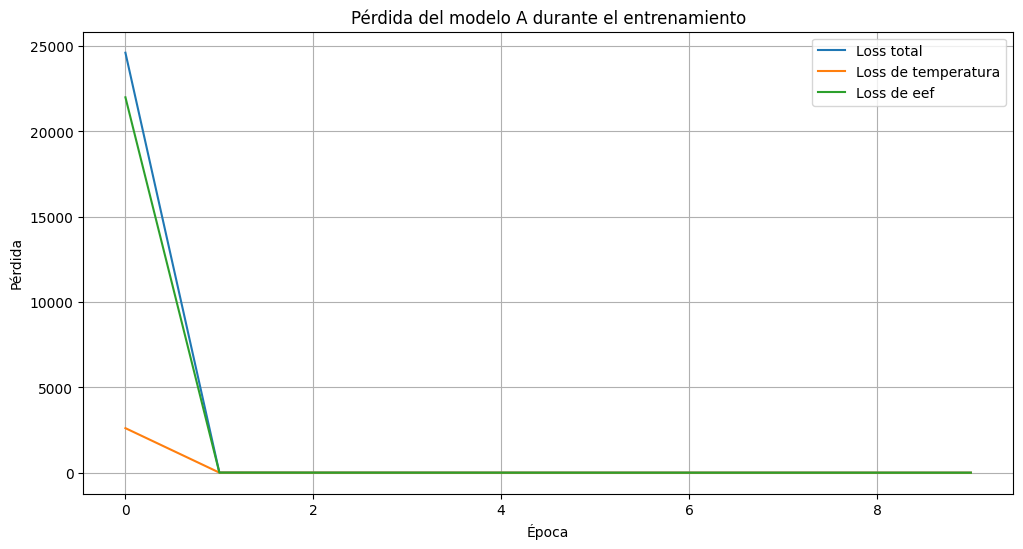

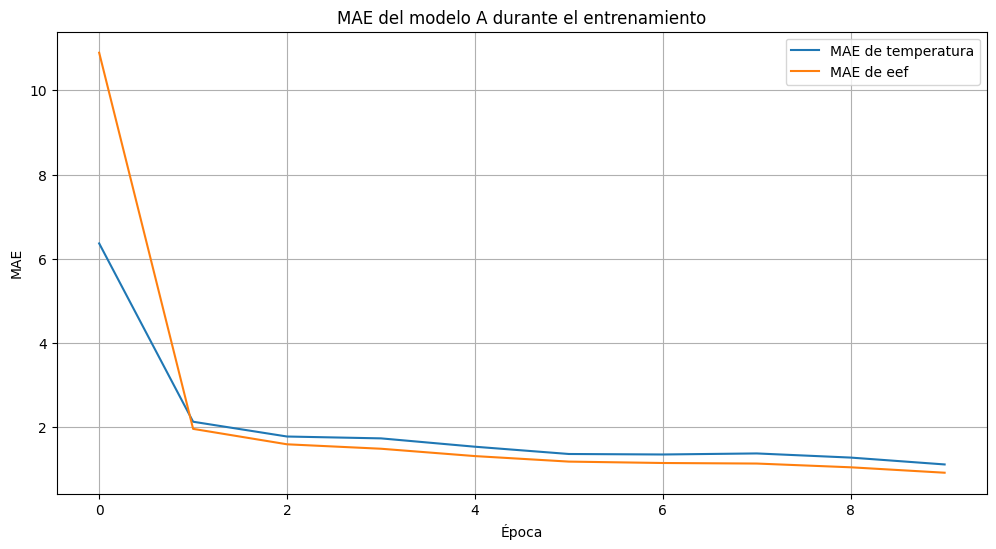

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento de model_a
history_a_1 = history_a_1.history

# Graficar la pérdida total y la pérdida de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_a_1['loss'], label='Loss total')
plt.plot(history_a_1['output_temperature_loss'], label='Loss de temperatura')
plt.plot(history_a_1['output_eef_loss'], label='Loss de eef')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_a_1['output_temperature_mae'], label='MAE de temperatura')
plt.plot(history_a_1['output_eef_mae'], label='MAE de eef')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Guardamos el modelo
model_a_1.save("/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/model_a_1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

# Ruta del archivo del modelo guardado
model_a_1_path = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/model_a_1.h5"

# Cargar el modelo
model_a_1 = load_model(model_a_1_path)

# Resumen del modelo cargado
model_a_1.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 11, 11, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 11, 11, 64)           640       ['input_image[0][0]']         
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 64)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 11, 11, 128)          73856     ['max_pooling2d_3[0][0]'

#### Modelo B

In [ ]:
history_b_1 = model_b_1.fit(
    {'input_image_bft': data_dict_fm3_a['model_b']['train']['images'],
     'input_temperature_bft': data_dict_fm3_a['model_b']['train']['temperature'],
     'input_eef_bft': data_dict_fm3_a['model_b']['train']['eef']},
    {'output_temperature_bft': data_dict_fm3_a['model_b']['train']['temperature'],
     'output_eef_bft': data_dict_fm3_a['model_b']['train']['eef']},
    epochs=10,
    batch_size=32,
    validation_data=(
        {'input_image_bft': data_dict_fm3_a['model_b']['valid']['images'],
         'input_temperature_bft': data_dict_fm3_a['model_b']['valid']['temperature'],
         'input_eef_bft': data_dict_fm3_a['model_b']['valid']['eef']},
        {'output_temperature_bft': data_dict_fm3_a['model_b']['valid']['temperature'],
         'output_eef_bft': data_dict_fm3_a['model_b']['valid']['eef']}
    )
)


Epoch 1/10
95/95 [==============================] - 43s 423ms/step - loss: 1268814.6250 - output_temperature_bft_loss: 7816.0464 - output_eef_bft_loss: 1260998.5000 - output_temperature_bft_mae: 17.0232 - output_eef_bft_mae: 148.3987 - val_loss: 42.1511 - val_output_temperature_bft_loss: 25.4634 - val_output_eef_bft_loss: 16.6877 - val_output_temperature_bft_mae: 3.6149 - val_output_eef_bft_mae: 3.1633
Epoch 2/10
95/95 [==============================] - 31s 328ms/step - loss: 41.5002 - output_temperature_bft_loss: 18.5924 - output_eef_bft_loss: 22.9078 - output_temperature_bft_mae: 3.3382 - output_eef_bft_mae: 3.3076 - val_loss: 30.3810 - val_output_temperature_bft_loss: 16.4079 - val_output_eef_bft_loss: 13.9731 - val_output_temperature_bft_mae: 2.9811 - val_output_eef_bft_mae: 2.9450
Epoch 3/10
95/95 [==============================] - 30s 321ms/step - loss: 30.1653 - output_temperature_bft_loss: 15.1080 - output_eef_bft_loss: 15.0573 - output_temperature_bft_mae: 3.0003 - output_eef_

In [ ]:
resultados_b_1 = model_b_1.evaluate(
    {'input_image_bft': data_dict_fm3_a['model_b']['test']['images'], 'input_temperature_bft': data_dict_fm3_a['model_b']['test']['temperature'], 'input_eef_bft': data_dict_fm3_a['model_b']['test']['eef']},
    {'output_temperature_bft': data_dict_fm3_a['model_b']['test']['temperature'], 'output_eef_bft': data_dict_fm3_a['model_b']['test']['eef']}
)

print("Métricas de model_b:")
print(" - Loss total:", resultados_b_1[0])
print(" - Loss de la salida de temperatura:", resultados_b_1[1])
print(" - Loss de la salida de eef:", resultados_b_1[2])
print(" - MAE de la salida de temperatura:", resultados_b_1[3])
print(" - MAE de la salida de eef:", resultados_b_1[4])


51/51 [==============================] - 8s 154ms/step - loss: 25.0747 - output_temperature_bft_loss: 13.0227 - output_eef_bft_loss: 12.0521 - output_temperature_bft_mae: 2.8526 - output_eef_bft_mae: 2.7120
Métricas de model_b:
 - Loss total: 25.074745178222656
 - Loss de la salida de temperatura: 13.022669792175293
 - Loss de la salida de eef: 12.052079200744629
 - MAE de la salida de temperatura: 2.8525564670562744
 - MAE de la salida de eef: 2.7119901180267334


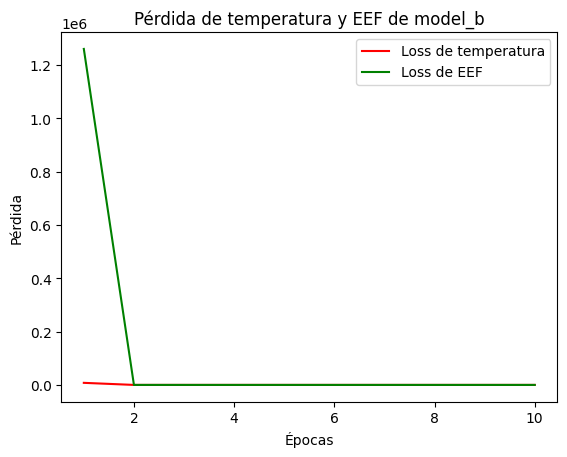

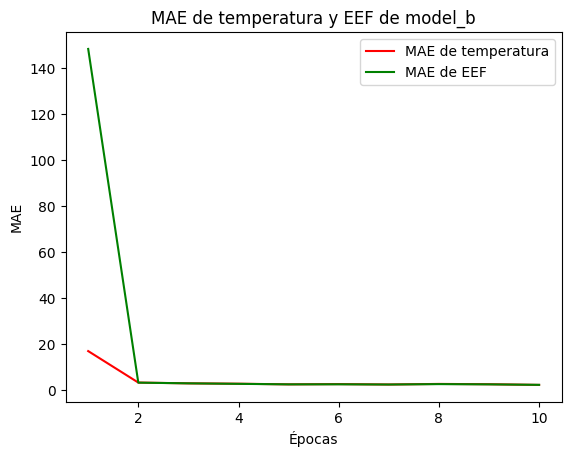

In [ ]:
import matplotlib.pyplot as plt

# Obtener historial de entrenamiento
loss_b = history_b_1.history['loss']
temp_loss_b = history_b_1.history['output_temperature_bft_loss']
eef_loss_b = history_b_1.history['output_eef_bft_loss']
temp_mae_b = history_b_1.history['output_temperature_bft_mae']
eef_mae_b = history_b_1.history['output_eef_bft_mae']

epochs = range(1, len(loss_b) + 1)

# Graficar pérdida de temperatura y EEF
plt.plot(epochs, temp_loss_b, 'r', label='Loss de temperatura')
plt.plot(epochs, eef_loss_b, 'g', label='Loss de EEF')
plt.title('Pérdida de temperatura y EEF de model_b')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar MAE de temperatura y EEF
plt.plot(epochs, temp_mae_b, 'r', label='MAE de temperatura')
plt.plot(epochs, eef_mae_b, 'g', label='MAE de EEF')
plt.title('MAE de temperatura y EEF de model_b')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
#Guardamos el modelo
model_b_1.save("/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/model_b_1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Resultados dispersión

116/116 [==============================] - 13s 106ms/step


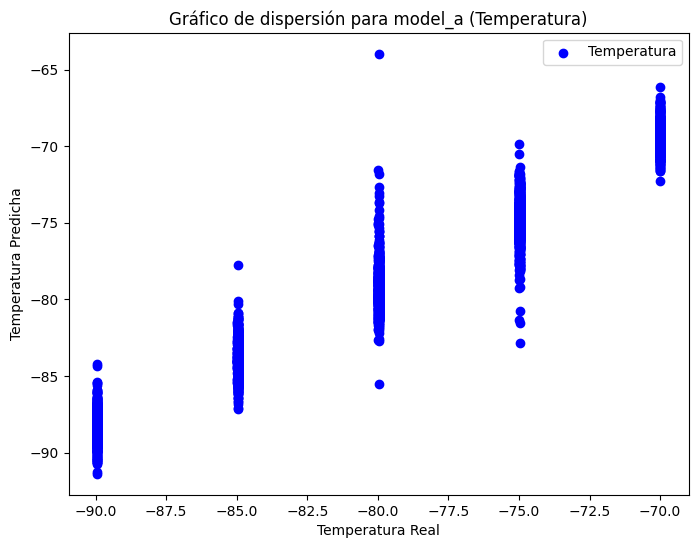

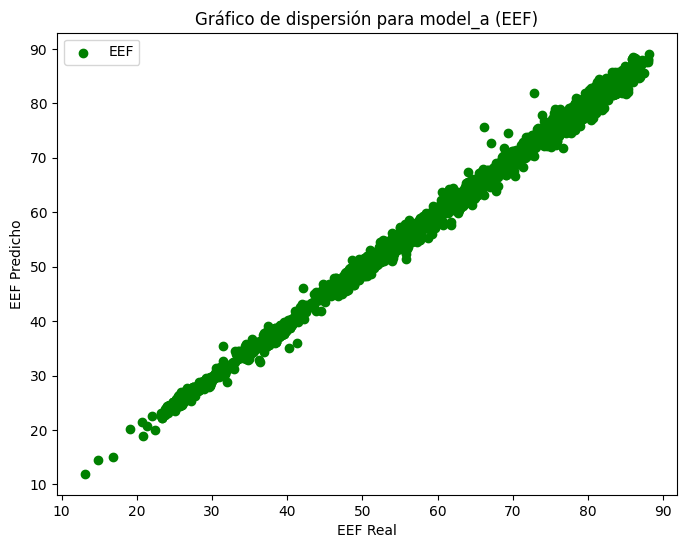

In [ ]:
import matplotlib.pyplot as plt

# Obtener predicciones de model_a
predictions_a_1 = model_a_1.predict({'input_image': data_dict_fm3_a['model_a']['test']['images'], 'input_temperature': data_dict_fm3_a['model_a']['test']['temperature'], 'input_eef': data_dict_fm3_a['model_a']['test']['eef']})

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3_a['model_a']['test']['temperature'], predictions_a_1[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_a (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3_a['model_a']['test']['eef'], predictions_a_1[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_a (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()



51/51 [==============================] - 7s 120ms/step


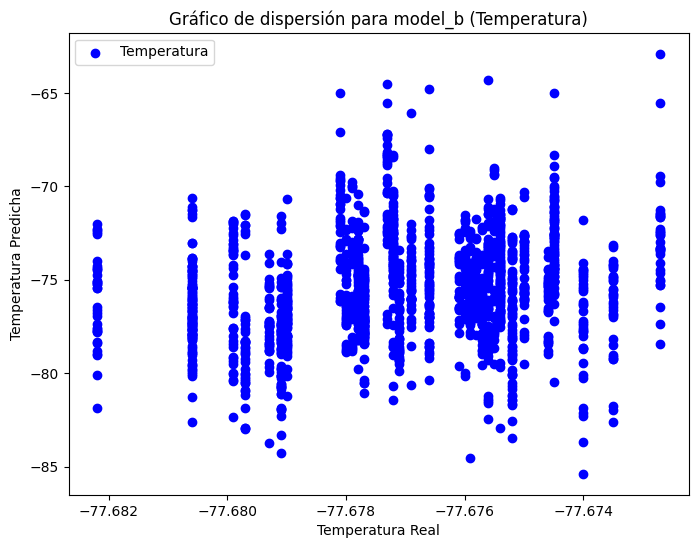

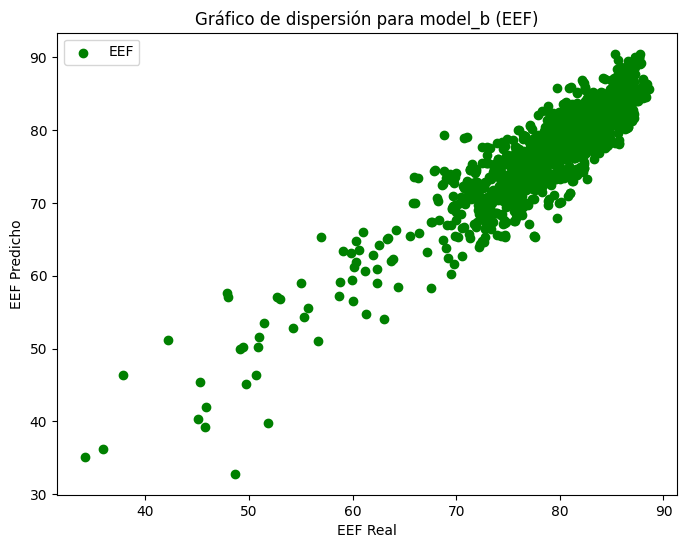

In [ ]:
import matplotlib.pyplot as plt

# Obtener predicciones de model_b
predictions_b_1 = model_b_1.predict({'input_image_bft': data_dict_fm3_a['model_b']['test']['images'], 'input_temperature_bft': data_dict_fm3_a['model_b']['test']['temperature'], 'input_eef_bft': data_dict_fm3_a['model_b']['test']['eef']})

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3_a['model_b']['test']['temperature'], predictions_b_1[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_b (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3_a['model_b']['test']['eef'], predictions_b_1[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_b (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()



In [ ]:
import numpy as np

def predecir(model_a, model_b, data_dict):
    # Obtener las imágenes de prueba, temperaturas y EEF del diccionario de datos del modelo A
    imagenes_prueba_a = data_dict['model_a']['test']['images']
    temperaturas_prueba_a = data_dict['model_a']['test']['temperature']
    eef_prueba_a = data_dict['model_a']['test']['eef']

    # Obtener las predicciones del modelo A para las imágenes de prueba
    predicciones_temp_a, predicciones_eef_a = model_a.predict({'input_image': imagenes_prueba_a,
                                                               'input_temperature': temperaturas_prueba_a,
                                                               'input_eef': eef_prueba_a})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagenes_prueba_a,
                      'input_temperature_bft': predicciones_temp_a,
                      'input_eef_bft': predicciones_eef_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones del modelo B
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    # Calcular la media y desviación estándar de las predicciones del modelo B
    media_predicciones_temp_b = np.mean(predicciones_temp_b)
    desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b)
    media_predicciones_eef_b = np.mean(predicciones_eef_b)
    desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b)

    # Imprimir la media y desviación estándar de las predicciones del modelo B
    print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
    print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)


In [ ]:
predecir(model_a_1, model_b_1, data_dict_fm3_a)

116/116 [==============================] - 9s 78ms/step
Predicción de temperatura Best Focus: -38.784393 +- 6.287956
Predicción de EEF Best Focus: 33.36568 +- 10.774289


Ahora vamos a analizarlos para identificar posibles problemas y áreas de mejora.

Comencemos por el modelo A:

* La pérdida total es de aproximadamente 3.56, con una pérdida de temperatura de alrededor de 2.46 y una pérdida de EEF de aproximadamente 1.11.
* El error absoluto medio (MAE) para la temperatura es de alrededor de 1.22, y para EEF es de aproximadamente 0.80.

Ahora veamos el modelo B:

* La pérdida total es más alta, alrededor de 25.07, con una pérdida de temperatura de aproximadamente 13.02 y una pérdida de EEF de alrededor de 12.05.
* El MAE para la temperatura es de aproximadamente 2.85, y para EEF es de alrededor de 2.71.


Ambos modelos muestran signos de posible sobreajuste, ya que la pérdida en los datos de validación es significativamente mayor que en los datos de entrenamiento. Además, las métricas de MAE también son bastante altas, lo que sugiere que los modelos pueden no estar capturando adecuadamente la relación entre las imágenes y las etiquetas de temperatura y EEF.

Para abordar estos problemas, aquí hay algunas sugerencias que podríamos considerar:

* Regularización: Podríamos agregar regularización a las capas densas de ambos modelos para ayudar a prevenir el sobreajuste.
Aumento de datos: Podríamos aplicar técnicas de aumento de datos a las imágenes de entrada para aumentar la variabilidad de los datos de entrenamiento y ayudar a generalizar mejor.
* Explorar arquitecturas más complejas o diferentes: Podríamos explorar arquitecturas de redes neuronales más complejas o diferentes para ver si pueden capturar mejor las relaciones en los datos.
* Ajuste de hiperparámetros: Podríamos ajustar los hiperparámetros de los modelos, como la tasa de aprendizaje, el tamaño del lote, el número de épocas, etc., para encontrar configuraciones que funcionen mejor.
* Ingeniería de características: Podríamos considerar la posibilidad de introducir características adicionales o ingeniería de características para ayudar a los modelos a capturar mejor la información relevante en los datos de entrada.

## Optimizacion


El learning rate (tasa de aprendizaje) es un hiperparámetro crucial en el entrenamiento de modelos de redes neuronales. Define el tamaño de los pasos que el optimizador toma durante el proceso de optimización para minimizar la función de pérdida.

En términos simples, la tasa de aprendizaje controla cuánto se ajustan los pesos del modelo en cada iteración durante el entrenamiento. Si la tasa de aprendizaje es demasiado pequeña, el entrenamiento puede ser lento y llevar mucho tiempo, ya que los pesos cambian muy lentamente. Por otro lado, si la tasa de aprendizaje es demasiado grande, el entrenamiento puede volverse inestable, con los pesos oscilando alrededor de una solución óptima sin converger.

Ajustar la tasa de aprendizaje es esencial para entrenar modelos de forma efectiva. En general, se prueba con diferentes valores de tasa de aprendizaje para encontrar el valor que permite que el modelo converja de manera rápida y estable hacia una solución óptima. Dependiendo del problema y de la arquitectura del modelo, los valores de la tasa de aprendizaje pueden variar ampliamente. Es común empezar con valores de aprendizaje más altos y reducirlos gradualmente durante el entrenamiento si es necesario, por ejemplo, utilizando técnicas como ReduceLROnPlateau.

Model A:

* Learning Rate = 0.0001
* Epochs = 20

In [ ]:
from keras.optimizers import Adam
from keras.models import clone_model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Definir el optimizador con la tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.001)  # Reducimos la tasa de aprendizaje a 0.0001

model_a_2 = clone_model(model_a_1)

# Compilar el modelo con el optimizador ajustado
model_a_2.compile(optimizer=optimizer,
                   loss={'output_temperature': 'mean_squared_error', 'output_eef': 'mean_squared_error'},
                   metrics={'output_temperature': 'mae', 'output_eef': 'mae'})


# Definir los callbacks
callbacks_a_2 = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_2.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

# Entrenar el modelo_a_2 con los callbacks
history_a_2 = model_a_2.fit(
    {'input_image': data_dict_fm3_a['model_a']['train']['images'],
     'input_temperature': data_dict_fm3_a['model_a']['train']['temperature'],
     'input_eef': data_dict_fm3_a['model_a']['train']['eef']},
    {'output_temperature': data_dict_fm3_a['model_a']['train']['temperature'],
     'output_eef': data_dict_fm3_a['model_a']['train']['eef']},
    epochs=20,
    batch_size=32,
    validation_data=(
        {'input_image': data_dict_fm3_a['model_a']['valid']['images'],
         'input_temperature': data_dict_fm3_a['model_a']['valid']['temperature'],
         'input_eef': data_dict_fm3_a['model_a']['valid']['eef']},
        {'output_temperature': data_dict_fm3_a['model_a']['valid']['temperature'],
         'output_eef': data_dict_fm3_a['model_a']['valid']['eef']}
    ),
    callbacks=callbacks_a_2
)


Epoch 1/20
539/539 [==============================] - ETA: 0s - loss: 27149.3477 - output_temperature_loss: 15910.2793 - output_eef_loss: 11239.0596 - output_temperature_mae: 10.5325 - output_eef_mae: 8.9354
Epoch 1: val_loss improved from inf to 24.36041, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_2.h5
539/539 [==============================] - 169s 301ms/step - loss: 27149.3477 - output_temperature_loss: 15910.2793 - output_eef_loss: 11239.0596 - output_temperature_mae: 10.5325 - output_eef_mae: 8.9354 - val_loss: 24.3604 - val_output_temperature_loss: 13.0066 - val_output_eef_loss: 11.3538 - val_output_temperature_mae: 2.7232 - val_output_eef_mae: 2.5607 - lr: 0.0010
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


539/539 [==============================] - ETA: 0s - loss: 16.9927 - output_temperature_loss: 9.0210 - output_eef_loss: 7.9717 - output_temperature_mae: 2.2803 - output_eef_mae: 2.1124
Epoch 2: val_loss improved from 24.36041 to 13.49146, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_2.h5
539/539 [==============================] - 162s 300ms/step - loss: 16.9927 - output_temperature_loss: 9.0210 - output_eef_loss: 7.9717 - output_temperature_mae: 2.2803 - output_eef_mae: 2.1124 - val_loss: 13.4915 - val_output_temperature_loss: 7.5615 - val_output_eef_loss: 5.9300 - val_output_temperature_mae: 2.1585 - val_output_eef_mae: 1.8343 - lr: 0.0010
Epoch 3/20
539/539 [==============================] - ETA: 0s - loss: 12.8538 - output_temperature_loss: 6.7862 - output_eef_loss: 6.0676 - output_temperature_mae: 1.9898 - output_eef_mae: 1.8535
Epoch 3: val_loss improved from 13.49146 to 11.97233, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNe

In [ ]:
from keras.models import load_model

# Ruta del archivo del modelo
filepath = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_2.h5'

# Cargar el modelo
model_a_2 = load_model(filepath)


In [ ]:
# Evaluar model_a_2 en el conjunto de datos de prueba
resultados_a_2 = model_a_2.evaluate(
    {'input_image': data_dict_fm3_a['model_a']['test']['images'],
     'input_temperature': data_dict_fm3_a['model_a']['test']['temperature'],
     'input_eef': data_dict_fm3_a['model_a']['test']['eef']},
    {'output_temperature': data_dict_fm3_a['model_a']['test']['temperature'],
     'output_eef': data_dict_fm3_a['model_a']['test']['eef']}
)

print("Métricas de model_a_2:")
print(" - Loss total:", resultados_a_2[0])
print(" - Loss de la salida de temperatura:", resultados_a_2[1])
print(" - Loss de la salida de eef:", resultados_a_2[2])
print(" - MAE de la salida de temperatura:", resultados_a_2[3])
print(" - MAE de la salida de eef:", resultados_a_2[4])


116/116 [==============================] - 9s 80ms/step - loss: 1.9909 - output_temperature_loss: 0.9834 - output_eef_loss: 1.0075 - output_temperature_mae: 0.7090 - output_eef_mae: 0.7730
Métricas de model_a_2:
 - Loss total: 1.990863561630249
 - Loss de la salida de temperatura: 0.9833506941795349
 - Loss de la salida de eef: 1.007513403892517
 - MAE de la salida de temperatura: 0.7090086936950684
 - MAE de la salida de eef: 0.7730332016944885


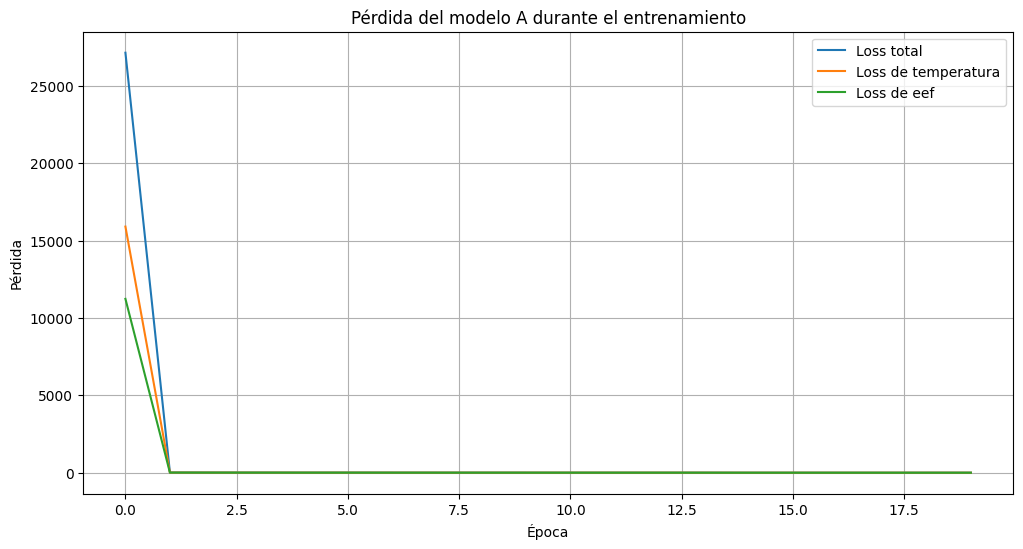

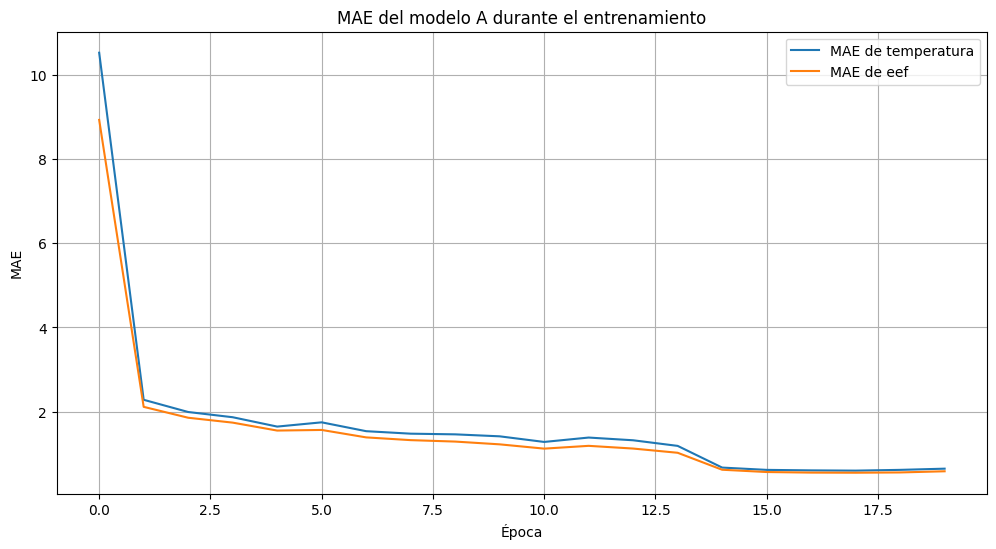

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento de model_a_2
loss_total = history_a_2['loss']
temp_loss = history_a_2['output_temperature_loss']
eef_loss = history_a_2['output_eef_loss']
temp_mae = history_a_2['output_temperature_mae']
eef_mae = history_a_2['output_eef_mae']

# Graficar la pérdida total y la pérdida de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(loss_total, label='Loss total')
plt.plot(temp_loss, label='Loss de temperatura')
plt.plot(eef_loss, label='Loss de eef')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(temp_mae, label='MAE de temperatura')
plt.plot(eef_mae, label='MAE de eef')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from keras.optimizers import Adam
from keras.models import clone_model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Definir el optimizador con la tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.001)  # Reducimos la tasa de aprendizaje a 0.001

model_b_2 = clone_model(model_b_1)

# Compilar el modelo con el optimizador ajustado
model_b_2.compile(optimizer=optimizer,
                   loss={'output_temperature_bft': 'mean_squared_error', 'output_eef_bft': 'mean_squared_error'},
                   metrics={'output_temperature_bft': 'mae', 'output_eef_bft': 'mae'})


# Definir los callbacks
callbacks_b_2 = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_2.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

# Entrenar el modelo_b_2 con los callbacks
history_b_2 = model_b_2.fit(
    {'input_image_bft': data_dict_fm3_a['model_b']['train']['images'],
     'input_temperature_bft': data_dict_fm3_a['model_b']['train']['temperature'],
     'input_eef_bft': data_dict_fm3_a['model_b']['train']['eef']},
    {'output_temperature_bft': data_dict_fm3_a['model_b']['train']['temperature'],
     'output_eef_bft': data_dict_fm3_a['model_b']['train']['eef']},
    epochs=50,
    batch_size=16,
    validation_data=(
        {'input_image_bft': data_dict_fm3_a['model_b']['valid']['images'],
         'input_temperature_bft': data_dict_fm3_a['model_b']['valid']['temperature'],
         'input_eef_bft': data_dict_fm3_a['model_b']['valid']['eef']},
        {'output_temperature_bft': data_dict_fm3_a['model_b']['valid']['temperature'],
         'output_eef_bft': data_dict_fm3_a['model_b']['valid']['eef']}
    ),
    callbacks=callbacks_b_2
)


Epoch 1/50
190/190 [==============================] - ETA: 0s - loss: 362953.2812 - output_temperature_bft_loss: 114866.4297 - output_eef_bft_loss: 248086.7031 - output_temperature_bft_mae: 37.5839 - output_eef_bft_mae: 50.4575
Epoch 1: val_loss improved from inf to 29.48722, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


190/190 [==============================] - 46s 209ms/step - loss: 362953.2812 - output_temperature_bft_loss: 114866.4297 - output_eef_bft_loss: 248086.7031 - output_temperature_bft_mae: 37.5839 - output_eef_bft_mae: 50.4575 - val_loss: 29.4872 - val_output_temperature_bft_loss: 15.3881 - val_output_eef_bft_loss: 14.0991 - val_output_temperature_bft_mae: 2.9385 - val_output_eef_bft_mae: 2.9723 - lr: 0.0010
Epoch 2/50
190/190 [==============================] - ETA: 0s - loss: 30.1299 - output_temperature_bft_loss: 15.5400 - output_eef_bft_loss: 14.5899 - output_temperature_bft_mae: 2.9586 - output_eef_bft_mae: 2.9784
Epoch 2: val_loss improved from 29.48722 to 23.21559, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_2.h5
190/190 [==============================] - 36s 191ms/step - loss: 30.1299 - output_temperature_bft_loss: 15.5400 - output_eef_bft_loss: 14.5899 - output_temperature_bft_mae: 2.9586 - output_eef_bft_mae: 2.9784 - val_loss: 23.2156 - val

In [ ]:
from keras.models import load_model

# Ruta del archivo del modelo
filepath = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_2.h5'

# Cargar el modelo
model_b_2 = load_model(filepath)


In [ ]:
# Evaluar model_b_2 en el conjunto de datos de prueba
resultados_b_2 = model_b_2.evaluate(
    {'input_image_bft': data_dict_fm3_a['model_b']['test']['images'],
     'input_temperature_bft': data_dict_fm3_a['model_b']['test']['temperature'],
     'input_eef_bft': data_dict_fm3_a['model_b']['test']['eef']},
    {'output_temperature_bft': data_dict_fm3_a['model_b']['test']['temperature'],
     'output_eef_bft': data_dict_fm3_a['model_b']['test']['eef']}
)


print("Métricas de model_b_2:")
print(" - Loss total:", resultados_b_2[0])
print(" - Loss de la salida de temperatura:", resultados_b_2[1])
print(" - Loss de la salida de eef:", resultados_b_2[2])
print(" - MAE de la salida de temperatura:", resultados_b_2[3])
print(" - MAE de la salida de eef:", resultados_b_2[4])


51/51 [==============================] - 6s 95ms/step - loss: 8.3216 - output_temperature_bft_loss: 4.2442 - output_eef_bft_loss: 4.0775 - output_temperature_bft_mae: 1.5075 - output_eef_bft_mae: 1.4867
Métricas de model_b_2:
 - Loss total: 8.321640968322754
 - Loss de la salida de temperatura: 4.244162559509277
 - Loss de la salida de eef: 4.077479839324951
 - MAE de la salida de temperatura: 1.5074844360351562
 - MAE de la salida de eef: 1.4867329597473145


In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento de model_a_2
loss_total = history_b_2['loss']
temp_loss = history_b_2['output_temperature_loss']
eef_loss = history_b_2['output_eef_loss']
temp_mae = history_b_2['output_temperature_mae']
eef_mae = history_b_2['output_eef_mae']

# Graficar la pérdida total y la pérdida de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(loss_total, label='Loss total')
plt.plot(temp_loss, label='Loss de temperatura')
plt.plot(eef_loss, label='Loss de eef')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(temp_mae, label='MAE de temperatura')
plt.plot(eef_mae, label='MAE de eef')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'history_b_2' is not defined

### Resultados dispersión

116/116 [==============================] - 13s 111ms/step


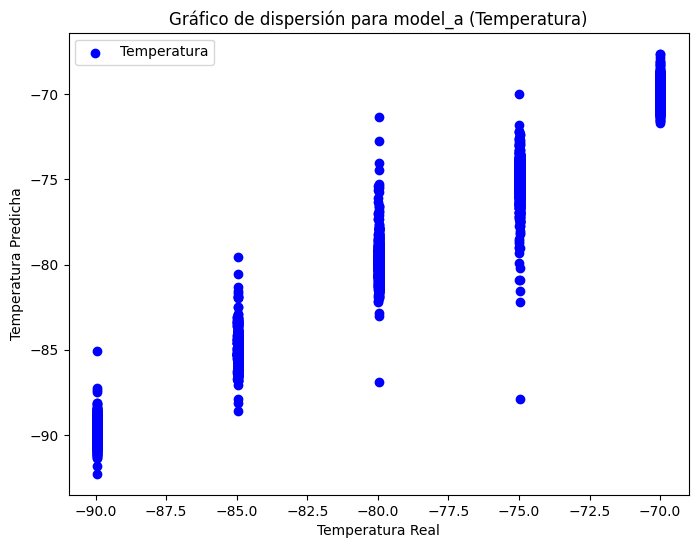

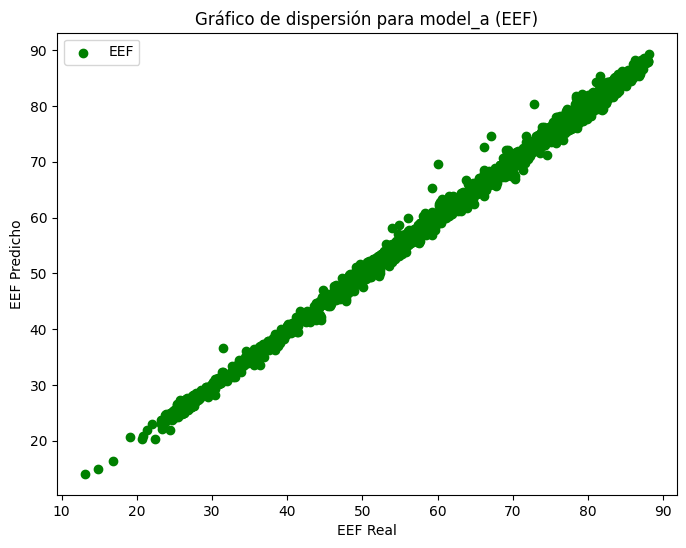

In [ ]:
import matplotlib.pyplot as plt

# Obtener predicciones de model_a
predictions_a_2 = model_a_2.predict({'input_image': data_dict_fm3_a['model_a']['test']['images'], 'input_temperature': data_dict_fm3_a['model_a']['test']['temperature'], 'input_eef': data_dict_fm3_a['model_a']['test']['eef']})

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3_a['model_a']['test']['temperature'], predictions_a_2[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_a (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3_a['model_a']['test']['eef'], predictions_a_2[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_a (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()



51/51 [==============================] - 3s 59ms/step


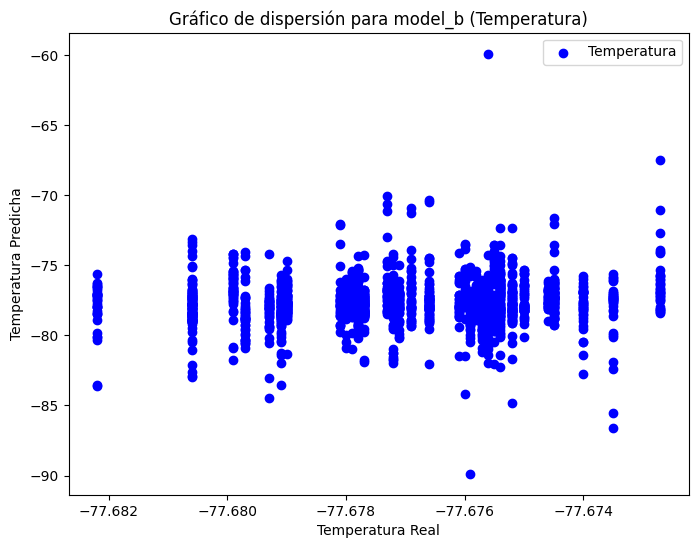

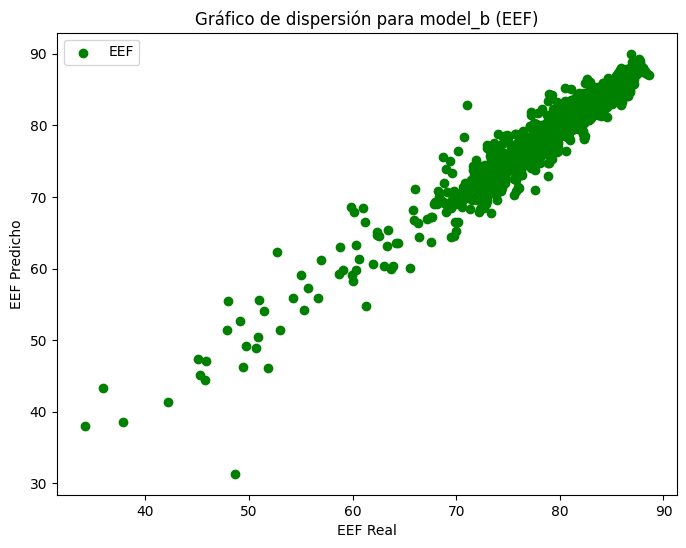

In [ ]:
import matplotlib.pyplot as plt

# Obtener predicciones de model_b
predictions_b_2 = model_b_2.predict({'input_image_bft': data_dict_fm3_a['model_b']['test']['images'], 'input_temperature_bft': data_dict_fm3_a['model_b']['test']['temperature'], 'input_eef_bft': data_dict_fm3_a['model_b']['test']['eef']})

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3_a['model_b']['test']['temperature'], predictions_b_2[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_b (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(data_dict_fm3_a['model_b']['test']['eef'], predictions_b_2[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_b (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()



## Prediccion

In [ ]:
import numpy as np

def predecir(model_a, model_b, data_dict):
    # Obtener las imágenes de prueba, temperaturas y EEF del diccionario de datos del modelo A
    imagenes_prueba_a = data_dict['model_a']['test']['images']
    temperaturas_prueba_a = data_dict['model_a']['test']['temperature']
    eef_prueba_a = data_dict['model_a']['test']['eef']

    # Obtener las predicciones del modelo A para las imágenes de prueba
    predicciones_temp_a, predicciones_eef_a = model_a.predict({'input_image': imagenes_prueba_a,
                                                               'input_temperature': temperaturas_prueba_a,
                                                               'input_eef': eef_prueba_a})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagenes_prueba_a,
                      'input_temperature_bft': predicciones_temp_a,
                      'input_eef_bft': predicciones_eef_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones del modelo B
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    print(predicciones_temp_b)
    #print(predicciones_eef_b)


"""
    # Calcular la media y desviación estándar de las predicciones del modelo B
    media_predicciones_temp_b = np.max(predicciones_temp_b)
    desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b)
    media_predicciones_eef_b = np.max(predicciones_eef_b)
    desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b)

    # Imprimir la media y desviación estándar de las predicciones del modelo B
    print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
    print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)
"""

'\n    # Calcular la media y desviación estándar de las predicciones del modelo B\n    media_predicciones_temp_b = np.max(predicciones_temp_b)\n    desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b)\n    media_predicciones_eef_b = np.max(predicciones_eef_b)\n    desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b)\n\n    # Imprimir la media y desviación estándar de las predicciones del modelo B\n    print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)\n    print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)\n'

In [ ]:
predecir(model_a_2, model_b_2, data_dict_fm3_a)

116/116 [==============================] - 8s 73ms/step
[[-43.292267]
 [-46.981728]
 [-47.173332]
 ...
 [-42.055252]
 [-50.882523]
 [-45.78736 ]]


In [ ]:
import random

def predecir_aleatoria(model_a, model_b, data_dict):
    # Seleccionar un índice aleatorio dentro del rango de x_test_img
    indice_aleatorio = random.randint(0, len(data_dict['model_a']['test']['temperature']) - 1)

    # Seleccionar la imagen correspondiente al índice aleatorio
    imagen_aleatoria = data_dict['model_a']['test']['images'][indice_aleatorio]

    # Seleccionar las temperaturas y EEF correspondientes al índice aleatorio
    temp_aleatoria = data_dict['model_a']['test']['temperature'][indice_aleatorio]
    eef_aleatoria = data_dict['model_a']['test']['eef'][indice_aleatorio]

    # Obtener las predicciones del modelo A para la imagen aleatoria
    predicciones_temp_a, predicciones_eef_a = model_a.predict({'input_image': imagen_aleatoria.reshape(1, 11, 11, 1),
                                                               'input_temperature': np.array([temp_aleatoria]),
                                                               'input_eef': np.array([eef_aleatoria])})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagen_aleatoria.reshape(1, 11, 11, 1),
                      'input_temperature_bft': predicciones_temp_a,
                      'input_eef_bft': predicciones_eef_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    # Calcular la media y desviación estándar de las predicciones desnormalizadas de temperatura y EEF
    media_predicciones_temp_b = np.mean(predicciones_temp_b)
    desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b)
    media_predicciones_eef_b = np.mean(predicciones_eef_b)
    desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b)

    # Imprimir la media y desviación estándar de las predicciones desnormalizadas
    print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
    print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)

In [ ]:
predecir_aleatoria(model_a_2, model_b_2, data_dict_fm3_a)

1/1 [==============================] - 0s 27ms/step
Predicción de temperatura Best Focus: -47.48864 +- 0.0
Predicción de EEF Best Focus: 50.26928 +- 0.0


# EM + FM3 + FM6 sin normalizar


### Importación las imágenes

In [ ]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

rutas_archivos = {
    'imagenes_recortadas_con_eef_em_plateaux': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/EM_imagenes_plateaux.pkl',
    'imagenes_recortadas_con_eef_fm3_plateaux': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM3_imagenes_plateaux.pkl',
    'imagenes_recortadas_con_eef_fm6_plateaux': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM6_imagenes_plateaux.pkl',
    'imagenes_recortadas_con_eef_fm10_plateaux': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM10_imagenes_plateaux.pkl',
    'imagenes_recortadas_con_eef_em_bft': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/EM_imagenes_bft.pkl',
    'imagenes_recortadas_con_eef_fm3_bft': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM3_imagenes_bft.pkl',
    'imagenes_recortadas_con_eef_fm6_bft': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM6_imagenes_bft.pkl',
    'imagenes_recortadas_con_eef_fm10_bft': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM10_imagenes_bft.pkl',
    'imagenes_recortadas_con_eef_fm13_plateaux': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM13_imagenes_transients.pkl',
    'imagenes_recortadas_con_eef_fm16_plateaux': '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM16_imagenes_plateaux.pkl'
}

datos_cargados = {}

# Cargar los archivos pickle
for nombre_variable, ruta_archivo in rutas_archivos.items():
    with open(ruta_archivo, 'rb') as archivo:
        datos_cargados[nombre_variable] = pickle.load(archivo)



In [ ]:
# Definir la función eliminar_diccionarios_por_frame
def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Lista para almacenar los diccionarios filtrados
    diccionarios_filtrados = []

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            if not (diccionario['frame'] == 1 and diccionario['fov_numero'] == diccionario['fov_numero']):
                diccionarios_filtrados.append(diccionario)

    return diccionarios_filtrados


# Aplicar la función a cada variable cargada desde archivos pickle
imagenes_recortadas_con_eef_em_plateaux = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_em_plateaux'])
imagenes_recortadas_con_eef_fm3_plateaux = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_fm3_plateaux'])
imagenes_recortadas_con_eef_fm6_plateaux = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_fm6_plateaux'])
imagenes_recortadas_con_eef_fm10_plateaux = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_fm10_plateaux'])
imagenes_recortadas_con_eef_fm13_plateaux = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_fm13_plateaux'])
imagenes_recortadas_con_eef_fm16_plateaux = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_fm16_plateaux'])
imagenes_recortadas_con_eef_em_bft = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_em_bft'])
imagenes_recortadas_con_eef_fm3_bft = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_fm3_bft'])
imagenes_recortadas_con_eef_fm6_bft = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_fm6_bft'])
imagenes_recortadas_con_eef_fm10_bft = eliminar_diccionarios_por_frame(datos_cargados['imagenes_recortadas_con_eef_fm10_bft'])



In [ ]:
# Extraer imágenes y temperaturas em
imagenes_em_plateaux = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_em_plateaux])
temperaturas_em_plateaux = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_em_plateaux])
eef_em_plateaux = np.array([item['eef'] for item in imagenes_recortadas_con_eef_em_plateaux])

imagenes_em_bft = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_em_bft])
temperaturas_em_bft = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_em_bft])
eef_em_bft = np.array([item['eef'] for item in imagenes_recortadas_con_eef_em_bft])

# Extraer imágenes y temperaturas fm3
imagenes_fm3_plateaux = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_fm3_plateaux])
temperaturas_fm3_plateaux = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_fm3_plateaux])
eef_fm3_plateaux = np.array([item['eef'] for item in imagenes_recortadas_con_eef_fm3_plateaux])

imagenes_fm3_bft = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_fm3_bft])
temperaturas_fm3_bft = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_fm3_bft])
eef_fm3_bft = np.array([item['eef'] for item in imagenes_recortadas_con_eef_fm3_bft])

# Extraer imágenes y temperaturas fm6
imagenes_fm6_plateaux = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_fm6_plateaux])
temperaturas_fm6_plateaux = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_fm6_plateaux])
eef_fm6_plateaux = np.array([item['eef'] for item in imagenes_recortadas_con_eef_fm6_plateaux])

imagenes_fm6_bft = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_fm6_bft])
temperaturas_fm6_bft = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_fm6_bft])
eef_fm6_bft = np.array([item['eef'] for item in imagenes_recortadas_con_eef_fm6_bft])

# Extraer imágenes y temperaturas fm10
imagenes_fm10_plateaux = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_fm10_plateaux])
temperaturas_fm10_plateaux = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_fm10_plateaux])
eef_fm10_plateaux = np.array([item['eef'] for item in imagenes_recortadas_con_eef_fm10_plateaux])

imagenes_fm10_bft = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_fm10_bft])
temperaturas_fm10_bft = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_fm10_bft])
eef_fm10_bft = np.array([item['eef'] for item in imagenes_recortadas_con_eef_fm10_bft])

# Extraer imágenes y temperaturas fm13
imagenes_fm13_plateaux = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_fm13_plateaux])
temperaturas_fm13_plateaux = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_fm13_plateaux])
eef_fm13_plateaux = np.array([item['eef'] for item in imagenes_recortadas_con_eef_fm13_plateaux])

# Extraer imágenes y temperaturas fm13
imagenes_fm16_plateaux = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_fm16_plateaux])
temperaturas_fm16_plateaux = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_fm16_plateaux])
eef_fm16_plateaux = np.array([item['eef'] for item in imagenes_recortadas_con_eef_fm16_plateaux])


In [ ]:
print("DATOS EM")
print("")

# Extraer imágenes y temperaturas em
print("Tamaño de imágenes imagenes_em_plateaux:", imagenes_em_plateaux.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm3_em_plateaux:", temperaturas_em_plateaux.shape)
print("Tamaño de etiquetas EEF imagenes_fm3_em_plateaux:", eef_em_plateaux.shape)

print("Tamaño de imágenes imagenes_fm3_em_bft:", imagenes_em_bft.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm3_em_bft:", temperaturas_em_bft.shape)
print("Tamaño de etiquetas EEF imagenes_fm3_em_bft:", eef_em_bft.shape)

print("")
print("DATOS FM3")
print("")

# Extraer imágenes y temperaturas fm3
print("Tamaño de imágenes imagenes_fm3_plateaux:", imagenes_fm3_plateaux.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm3_plateaux:", temperaturas_fm3_plateaux.shape)
print("Tamaño de etiquetas EEF imagenes_fm3_plateaux:", eef_fm3_plateaux.shape)

print("Tamaño de imágenes imagenes_fm3_bft:", imagenes_fm3_bft.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm3_bft:", temperaturas_fm3_bft.shape)
print("Tamaño de etiquetas EEF imagenes_fm3_bft:", eef_fm3_bft.shape)

print("")
print("DATOS FM6")
print("")

# Extraer imágenes y temperaturas fm6
print("Tamaño de imágenes imagenes_fm6_plateaux:", imagenes_fm6_plateaux.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm6_plateaux:", temperaturas_fm6_plateaux.shape)
print("Tamaño de etiquetas EEF imagenes_fm6_plateaux:", eef_fm6_plateaux.shape)

print("Tamaño de imágenes imagenes_fm6_bft:", imagenes_fm6_bft.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm6_bft:", temperaturas_fm6_bft.shape)
print("Tamaño de etiquetas EEF imagenes_fm6_bft:", eef_fm6_bft.shape)

print("")
print("DATOS FM10")
print("")

# Extraer imágenes y temperaturas fm10
print("Tamaño de imágenes imagenes_fm10_plateaux:", imagenes_fm10_plateaux.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm10_plateaux:", temperaturas_fm10_plateaux.shape)
print("Tamaño de etiquetas EEF imagenes_fm10_plateaux:", eef_fm10_plateaux.shape)

print("Tamaño de imágenes imagenes_fm10_bft:", imagenes_fm10_bft.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm10_bft:", temperaturas_fm10_bft.shape)
print("Tamaño de etiquetas EEF imagenes_fm10_bft:", eef_fm10_bft.shape)


print("")
print("DATOS FM13")
print("")

# Extraer imágenes y temperaturas fm13
print("Tamaño de imágenes imagenes_fm10_plateaux:", imagenes_fm13_plateaux.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm10_plateaux:", temperaturas_fm13_plateaux.shape)
print("Tamaño de etiquetas EEF imagenes_fm10_plateaux:", eef_fm13_plateaux.shape)

print("")
print("DATOS FM16")
print("")

# Extraer imágenes y temperaturas fm16
print("Tamaño de imágenes imagenes_fm16_plateaux:", imagenes_fm16_plateaux.shape)
print("Tamaño de etiquetas Temperatura imagenes_fm16_plateaux:", temperaturas_fm16_plateaux.shape)
print("Tamaño de etiquetas EEF imagenes_fm16_plateaux:", eef_fm16_plateaux.shape)


DATOS EM

Tamaño de imágenes imagenes_em_plateaux: (24600, 11, 11)
Tamaño de etiquetas Temperatura imagenes_fm3_em_plateaux: (24600,)
Tamaño de etiquetas EEF imagenes_fm3_em_plateaux: (24600,)
Tamaño de imágenes imagenes_fm3_em_bft: (5412, 11, 11)
Tamaño de etiquetas Temperatura imagenes_fm3_em_bft: (5412,)
Tamaño de etiquetas EEF imagenes_fm3_em_bft: (5412,)

DATOS FM3

Tamaño de imágenes imagenes_fm3_plateaux: (24600, 11, 11)
Tamaño de etiquetas Temperatura imagenes_fm3_plateaux: (24600,)
Tamaño de etiquetas EEF imagenes_fm3_plateaux: (24600,)
Tamaño de imágenes imagenes_fm3_bft: (5412, 11, 11)
Tamaño de etiquetas Temperatura imagenes_fm3_bft: (5412,)
Tamaño de etiquetas EEF imagenes_fm3_bft: (5412,)

DATOS FM6

Tamaño de imágenes imagenes_fm6_plateaux: (19680, 11, 11)
Tamaño de etiquetas Temperatura imagenes_fm6_plateaux: (19680,)
Tamaño de etiquetas EEF imagenes_fm6_plateaux: (19680,)
Tamaño de imágenes imagenes_fm6_bft: (5412, 11, 11)
Tamaño de etiquetas Temperatura imagenes_fm6_b

In [ ]:
# Crear un diccionario para almacenar las variables organizadas por modelo
datos_por_modelo = {
    'EM': {'imagenes': {'plateaux': imagenes_em_plateaux, 'bft': imagenes_em_bft},
           'temperatura': {'plateaux': temperaturas_em_plateaux, 'bft': temperaturas_em_bft},
           'eef': {'plateaux': eef_em_plateaux, 'bft': eef_em_bft}},
    'FM3': {'imagenes': {'plateaux': imagenes_fm3_plateaux, 'bft': imagenes_fm3_bft},
            'temperatura': {'plateaux': temperaturas_fm3_plateaux, 'bft': temperaturas_fm3_bft},
            'eef': {'plateaux': eef_fm3_plateaux, 'bft': eef_fm3_bft}},
    'FM6': {'imagenes': {'plateaux': imagenes_fm6_plateaux, 'bft': imagenes_fm6_bft},
            'temperatura': {'plateaux': temperaturas_fm6_plateaux, 'bft': temperaturas_fm6_bft},
            'eef': {'plateaux': eef_fm6_plateaux, 'bft': eef_fm6_bft}},
    'FM10': {'imagenes': {'plateaux': imagenes_fm10_plateaux, 'bft': imagenes_fm10_bft},
             'temperatura': {'plateaux': temperaturas_fm10_plateaux, 'bft': temperaturas_fm10_bft},
             'eef': {'plateaux': eef_fm10_plateaux, 'bft': eef_fm10_bft}},
    'FM13': {'imagenes': {'plateaux': imagenes_fm13_plateaux},
             'temperatura': {'plateaux': temperaturas_fm13_plateaux},
             'eef': {'plateaux': eef_fm13_plateaux}},
    'FM16': {'imagenes': {'plateaux': imagenes_fm16_plateaux},
             'temperatura': {'plateaux': temperaturas_fm16_plateaux},
             'eef': {'plateaux': eef_fm16_plateaux}}

}

#### Preprocesamiento

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

def obtener_imagenes(modelo, subtipo, datos_por_modelo):
    try:
        return datos_por_modelo[modelo]['imagenes'][subtipo]
    except KeyError:
        return None

def obtener_temperaturas(modelo, subtipo, datos_por_modelo):
    try:
        return datos_por_modelo[modelo]['temperatura'][subtipo]
    except KeyError:
        return None

def obtener_eef(modelo, subtipo, datos_por_modelo):
    try:
        return datos_por_modelo[modelo]['eef'][subtipo]
    except KeyError:
        return None

conjuntos_datos_por_modelo_3 = {}

# Por cada modelo y subtipo, dividir los datos en entrenamiento, validación y prueba
subtipos = ["plateaux", "bft"]  # Agregamos FM10 a la lista de subtipos
for modelo in ["EM", "FM3", "FM6", "FM10", "FM13", "FM16"]:
    conjuntos_datos_por_modelo_3[modelo] = {}
    for subtipo in subtipos:
        # Obtener los datos correspondientes al modelo y subtipo actual
        imagenes = obtener_imagenes(modelo, subtipo, datos_por_modelo)
        temperaturas = obtener_temperaturas(modelo, subtipo, datos_por_modelo)
        eef = obtener_eef(modelo, subtipo, datos_por_modelo)

        # Si alguno de los datos es None, significa que el subtipo no está presente
        # Entonces, omitimos este subtipo
        if imagenes is None or temperaturas is None or eef is None:
            continue

        # Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
        x_train, x_temp_val_test, temp_train, temp_val_test, eef_train, eef_val_test = train_test_split(imagenes, temperaturas, eef, test_size=0.3, random_state=1)
        x_valid, x_test, temp_valid, temp_test, eef_valid, eef_test = train_test_split(x_temp_val_test, temp_val_test, eef_val_test, test_size=0.5, random_state=1)

        # Ajustar la forma de los datos de imagen de entrenamiento y validación
        image_train = np.expand_dims(x_train, axis=-1)
        image_valid = np.expand_dims(x_valid, axis=-1)
        image_test = np.expand_dims(x_test, axis=-1)

        #Creamos diccionario
        conjuntos_datos_por_modelo_3[modelo][subtipo] = {
            "image": {
                "train": image_train,
                "valid": image_valid,
                "test": image_test
            },
            "temperature": {
                "train": temp_train,
                "valid": temp_valid,
                "test": temp_test
            },
            "eef": {
                "train": eef_train,
                "valid": eef_valid,
                "test": eef_test
            }
        }




In [ ]:
# Iterar sobre cada modelo y subtipo en el diccionario
for modelo, subtipos in conjuntos_datos_por_modelo_3.items():
    print(modelo + ":")
    # Iterar sobre cada subtipo en el diccionario de subtipos
    for subtipo, conjuntos in subtipos.items():
        print("\t" + subtipo + ":")
        # Iterar sobre cada subconjunto de datos (imagen, temperatura, eef)
        for dato_type, divisiones in conjuntos.items():
            print("\t\t" + dato_type + ":")
            # Iterar sobre cada división (train, valid, test)
            for division, datos in divisiones.items():
                print("\t\t\t\t" + division)

EM:
	plateaux:
		image:
				train
				valid
				test
		temperature:
				train
				valid
				test
		eef:
				train
				valid
				test
	bft:
		image:
				train
				valid
				test
		temperature:
				train
				valid
				test
		eef:
				train
				valid
				test
FM3:
	plateaux:
		image:
				train
				valid
				test
		temperature:
				train
				valid
				test
		eef:
				train
				valid
				test
	bft:
		image:
				train
				valid
				test
		temperature:
				train
				valid
				test
		eef:
				train
				valid
				test
FM6:
	plateaux:
		image:
				train
				valid
				test
		temperature:
				train
				valid
				test
		eef:
				train
				valid
				test
	bft:
		image:
				train
				valid
				test
		temperature:
				train
				valid
				test
		eef:
				train
				valid
				test
FM10:
	plateaux:
		image:
				train
				valid
				test
		temperature:
				train
				valid
				test
		eef:
				train
				valid
				test
	bft:
		image:
				train
				valid
				test
		temperature:
				train
				valid
				test
		ee

In [ ]:
import os
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo = os.path.join(directorio, "conjuntos_datos_por_modelo_3.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo, 'wb') as f:
    pickle.dump(conjuntos_datos_por_modelo_3, f)

print("El diccionario data_dict_completo se ha guardado en el archivo", archivo)


El diccionario data_dict_completo se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/conjuntos_datos_por_modelo_3.pkl


In [ ]:
import os
import pickle

# Directorio donde se encuentran los archivos de diccionario
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre de los archivos de diccionario
archivo_conjuntos_datos_por_modelo = os.path.join(directorio, "conjuntos_datos_por_modelo_2.pkl")

# Cargar los diccionarios desde los archivos usando pickle
with open(archivo_conjuntos_datos_por_modelo, 'rb') as f:
    conjuntos_datos_por_modelo = pickle.load(f)


print("Los diccionarios se han cargado desde los archivos correspondientes.")

Los diccionarios se han cargado desde los archivos correspondientes.


In [ ]:
import os
import pickle

def cargar_diccionario(desde_directorio, nombre_archivo):
    """
    Carga un diccionario desde un archivo pickle.

    Args:
    - desde_directorio (str): Directorio donde se encuentra el archivo.
    - nombre_archivo (str): Nombre del archivo pickle que contiene el diccionario.

    Returns:
    - dict: El diccionario cargado desde el archivo.
    """
    # Combinar el directorio y el nombre del archivo
    ruta_archivo = os.path.join(desde_directorio, nombre_archivo)

    # Verificar si el archivo existe
    if not os.path.exists(ruta_archivo):
        raise FileNotFoundError("El archivo no existe en la ruta especificada.")

    # Cargar el diccionario desde el archivo
    with open(ruta_archivo, 'rb') as f:
        diccionario_cargado = pickle.load(f)

    return diccionario_cargado

In [ ]:
# Llamar a la función para cargar el diccionario desde el archivo

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

data_dict_fm3_a = cargar_diccionario(directorio, "conjuntos_datos_por_modelo.pkl")

### Definicion Modelos

Se generan los subconjuntos A y B

In [ ]:
conjuntos_plateaux = {}
conjuntos_bft = {}

for modelo, subtipos in conjuntos_datos_por_modelo_3.items():
    if "plateaux" in subtipos:
        conjuntos_plateaux[modelo] = subtipos["plateaux"]
    if "bft" in subtipos:
        conjuntos_bft[modelo] = subtipos["bft"]

for modelo, subtipos in conjuntos_datos_por_modelo_3.items():
    print(f"Modelo: {modelo}")
    for subtipo, variables in subtipos.items():
        print(f"  Subtipo: {subtipo}")
        for variable, divisiones in variables.items():
            print(f"    Variable: {variable}")
            for division, datos in divisiones.items():
                print(f"      División: {division}, Forma de los datos: {datos.shape}")


Modelo: EM
  Subtipo: plateaux
    Variable: image
      División: train, Forma de los datos: (17220, 11, 11, 1)
      División: valid, Forma de los datos: (3690, 11, 11, 1)
      División: test, Forma de los datos: (3690, 11, 11, 1)
    Variable: temperature
      División: train, Forma de los datos: (17220,)
      División: valid, Forma de los datos: (3690,)
      División: test, Forma de los datos: (3690,)
    Variable: eef
      División: train, Forma de los datos: (17220,)
      División: valid, Forma de los datos: (3690,)
      División: test, Forma de los datos: (3690,)
  Subtipo: bft
    Variable: image
      División: train, Forma de los datos: (3788, 11, 11, 1)
      División: valid, Forma de los datos: (812, 11, 11, 1)
      División: test, Forma de los datos: (812, 11, 11, 1)
    Variable: temperature
      División: train, Forma de los datos: (3788,)
      División: valid, Forma de los datos: (812,)
      División: test, Forma de los datos: (812,)
    Variable: eef
      D

In [ ]:
# Inicializar el diccionario dict_modelo_plateaux
dict_modelo_plateaux_3 = {}

# Iterar sobre cada modelo y subtipo en conjuntos_datos_por_modelo
for modelo, subtipos in conjuntos_datos_por_modelo_3.items():
    dict_modelo_plateaux_3[modelo] = {}  # Inicializar un diccionario para el modelo actual
    for subtipo, variables in subtipos.items():
        if subtipo == "plateaux":  # Solo considerar el subtipo "plateaux"
            for variable, divisiones in variables.items():
                dict_modelo_plateaux_3[modelo][variable] = {}  # Inicializar un diccionario para la variable actual
                for division, datos in divisiones.items():
                    dict_modelo_plateaux_3[modelo][variable][division] = datos  # Agregar los datos a dict_modelo_plateaux_2

# Verificar el contenido de dict_modelo_plateaux
for modelo, variables in dict_modelo_plateaux_3.items():
    print(f"Modelo: {modelo}")
    for variable, divisiones in variables.items():
        print(f"  Variable: {variable}")
        for division, datos in divisiones.items():
            print(f"    División: {division}, Forma de los datos: {datos.shape}")



Modelo: EM
  Variable: image
    División: train, Forma de los datos: (17220, 11, 11, 1)
    División: valid, Forma de los datos: (3690, 11, 11, 1)
    División: test, Forma de los datos: (3690, 11, 11, 1)
  Variable: temperature
    División: train, Forma de los datos: (17220,)
    División: valid, Forma de los datos: (3690,)
    División: test, Forma de los datos: (3690,)
  Variable: eef
    División: train, Forma de los datos: (17220,)
    División: valid, Forma de los datos: (3690,)
    División: test, Forma de los datos: (3690,)
Modelo: FM3
  Variable: image
    División: train, Forma de los datos: (17220, 11, 11, 1)
    División: valid, Forma de los datos: (3690, 11, 11, 1)
    División: test, Forma de los datos: (3690, 11, 11, 1)
  Variable: temperature
    División: train, Forma de los datos: (17220,)
    División: valid, Forma de los datos: (3690,)
    División: test, Forma de los datos: (3690,)
  Variable: eef
    División: train, Forma de los datos: (17220,)
    División: va

In [ ]:
# Inicializar el diccionario dict_modelo_bft_2
dict_modelo_bft_3 = {}

# Iterar sobre cada modelo y subtipo en conjuntos_datos_por_modelo
for modelo, subtipos in conjuntos_datos_por_modelo_3.items():
    dict_modelo_bft_3[modelo] = {}  # Inicializar un diccionario para el modelo actual
    for subtipo, variables in subtipos.items():
        if subtipo == "bft":  # Solo considerar el subtipo "bft"
            for variable, divisiones in variables.items():
                dict_modelo_bft_3[modelo][variable] = {}  # Inicializar un diccionario para la variable actual
                for division, datos in divisiones.items():
                    dict_modelo_bft_3[modelo][variable][division] = datos  # Agregar los datos a dict_modelo_bft_2

# Verificar el contenido de dict_modelo_bft_2
for modelo, variables in dict_modelo_bft_3.items():
    print(f"Modelo: {modelo}")
    for variable, divisiones in variables.items():
        print(f"  Variable: {variable}")
        for division, datos in divisiones.items():
            print(f"    División: {division}, Forma de los datos: {datos.shape}")


Modelo: EM
  Variable: image
    División: train, Forma de los datos: (3788, 11, 11, 1)
    División: valid, Forma de los datos: (812, 11, 11, 1)
    División: test, Forma de los datos: (812, 11, 11, 1)
  Variable: temperature
    División: train, Forma de los datos: (3788,)
    División: valid, Forma de los datos: (812,)
    División: test, Forma de los datos: (812,)
  Variable: eef
    División: train, Forma de los datos: (3788,)
    División: valid, Forma de los datos: (812,)
    División: test, Forma de los datos: (812,)
Modelo: FM3
  Variable: image
    División: train, Forma de los datos: (3788, 11, 11, 1)
    División: valid, Forma de los datos: (812, 11, 11, 1)
    División: test, Forma de los datos: (812, 11, 11, 1)
  Variable: temperature
    División: train, Forma de los datos: (3788,)
    División: valid, Forma de los datos: (812,)
    División: test, Forma de los datos: (812,)
  Variable: eef
    División: train, Forma de los datos: (3788,)
    División: valid, Forma de lo

In [ ]:
# Crear un diccionario para almacenar los datos organizados por variable y división
dict_plateaux_3 = {
    "image": {"train": [], "valid": [], "test": []},
    "temperature": {"train": [], "valid": [], "test": []},
    "eef": {"train": [], "valid": [], "test": []}
}

# Iterar sobre cada modelo y subtipo en el diccionario
for modelo, subtipos in conjuntos_datos_por_modelo_3.items():
    for subtipo, variables in subtipos.items():
        if subtipo == "plateaux":  # Solo considerar el subtipo plateaux
            for variable, divisiones in variables.items():
                for division, datos in divisiones.items():
                    # Extender los datos al diccionario dict_plateaux_2
                    dict_plateaux_3[variable][division].extend(datos)

# Verificar el contenido de dict_plateaux_2
for variable, divisiones in dict_plateaux_3.items():
    print(f"Variable: {variable}")
    for division, datos in divisiones.items():
        print(f"  División: {division}, Forma de los datos: {np.array(datos).shape}")


Variable: image
  División: train, Forma de los datos: (78764, 11, 11, 1)
  División: valid, Forma de los datos: (16878, 11, 11, 1)
  División: test, Forma de los datos: (16878, 11, 11, 1)
Variable: temperature
  División: train, Forma de los datos: (78764,)
  División: valid, Forma de los datos: (16878,)
  División: test, Forma de los datos: (16878,)
Variable: eef
  División: train, Forma de los datos: (78764,)
  División: valid, Forma de los datos: (16878,)
  División: test, Forma de los datos: (16878,)


In [ ]:
# Crear un diccionario para almacenar los datos organizados por variable y división
dict_bft_3 = {
    "image": {"train": [], "valid": [], "test": []},
    "temperature": {"train": [], "valid": [], "test": []},
    "eef": {"train": [], "valid": [], "test": []}
}

# Iterar sobre cada modelo y subtipo en el diccionario
for modelo, subtipos in conjuntos_datos_por_modelo_3.items():
    for subtipo, variables in subtipos.items():
        if subtipo == "bft":  # Solo considerar el subtipo bft
            for variable, divisiones in variables.items():
                for division, datos in divisiones.items():
                    # Extender los datos en el diccionario dict_bft_2
                    dict_bft_3[variable][division].extend(datos)

# Verificar el contenido y la forma de los datos en dict_bft_2
for variable, divisiones in dict_bft_3.items():
    print(f"Variable: {variable}")
    for division, datos in divisiones.items():
        print(f"  División: {division}, Forma de los datos: {np.array(datos).shape}")


Variable: image
  División: train, Forma de los datos: (15152, 11, 11, 1)
  División: valid, Forma de los datos: (3248, 11, 11, 1)
  División: test, Forma de los datos: (3248, 11, 11, 1)
Variable: temperature
  División: train, Forma de los datos: (15152,)
  División: valid, Forma de los datos: (3248,)
  División: test, Forma de los datos: (3248,)
Variable: eef
  División: train, Forma de los datos: (15152,)
  División: valid, Forma de los datos: (3248,)
  División: test, Forma de los datos: (3248,)


In [ ]:
import os
import pickle

# Directorio donde deseas guardar los archivos
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Diccionarios que deseas guardar
diccionarios = {
    "dict_plateaux_3": dict_plateaux_3,
    "dict_bft_3": dict_bft_3,
    "dict_modelo_bft_3": dict_modelo_bft_3,
    "dict_modelo_plateaux_3": dict_modelo_plateaux_3
}

# Guardar los diccionarios en archivos usando pickle
for nombre, diccionario in diccionarios.items():
    archivo = os.path.join(directorio, f"{nombre}.pkl")
    with open(archivo, 'wb') as f:
        pickle.dump(diccionario, f)
    print(f"El diccionario '{nombre}' se ha guardado en '{archivo}' correctamente.")



El diccionario 'dict_plateaux_3' se ha guardado en '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/dict_plateaux_3.pkl' correctamente.
El diccionario 'dict_bft_3' se ha guardado en '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/dict_bft_3.pkl' correctamente.
El diccionario 'dict_modelo_bft_3' se ha guardado en '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/dict_modelo_bft_3.pkl' correctamente.
El diccionario 'dict_modelo_plateaux_3' se ha guardado en '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/dict_modelo_plateaux_3.pkl' correctamente.


In [ ]:
import os
import pickle

# Directorio donde se encuentran los archivos de diccionario
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre de los archivos de diccionario
archivo_dict_plateaux = os.path.join(directorio, "dict_plateaux.pkl")
archivo_dict_bft = os.path.join(directorio, "dict_bft.pkl")
archivo_dict_modelo_bft = os.path.join(directorio, "dict_modelo_bft.pkl")
archivo_dict_modelo_plateaux = os.path.join(directorio, "dict_modelo_plateaux.pkl")

# Cargar los diccionarios desde los archivos usando pickle
with open(archivo_dict_plateaux, 'rb') as f:
    dict_plateaux = pickle.load(f)

with open(archivo_dict_bft, 'rb') as f:
    dict_bft = pickle.load(f)

with open(archivo_dict_modelo_bft, 'rb') as f:
    dict_modelo_bft = pickle.load(f)

with open(archivo_dict_modelo_plateaux, 'rb') as f:
    dict_modelo_plateaux = pickle.load(f)

print("Los diccionarios se han cargado desde los archivos correspondientes.")


Los diccionarios se han cargado desde los archivos correspondientes.


#### Modelo A

In [ ]:
#Modelo A

import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Definir el modelo A
input_image = Input(shape=(11, 11, 1), name='input_image')
input_temperature = Input(shape=(1,), name='input_temperature')
input_eef = Input(shape=(1,), name='input_eef')

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_image)
x = MaxPooling2D((1, 1))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((1, 1))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((1, 1))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

regression_temperature_output = Dense(1, activation='linear', name='output_temperature')(x)
regression_eef_output = Dense(1, activation='linear', name='output_eef')(x)

model_a_completo = Model(inputs=[input_image, input_temperature, input_eef],
                         outputs=[regression_temperature_output, regression_eef_output])

optimizer = Adam(learning_rate=0.001)
model_a_completo.compile(optimizer=optimizer,
                         loss={'output_temperature': 'mean_squared_error', 'output_eef': 'mean_squared_error'},
                         metrics={'output_temperature': 'mae', 'output_eef': 'mae'})

model_a_completo.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 11, 11, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 11, 11, 64)           640       ['input_image[0][0]']         
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 11, 11, 128)          73856     ['max_pooling2d[0][0]']   

#### Modelo B

In [ ]:
#Modelo B

import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Definir la entrada para las imágenes
input_img_bft = Input(shape=(11, 11, 1), name='input_image_bft')
input_temp_bft = Input(shape=(1,), name='input_temperature_bft')
input_eef_bft = Input(shape=(1,), name='input_eef_bft')

# Rama compartida de la red convolucional
x_bft = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Conv2D(128, (3, 3), activation='relu', padding='same')(x_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Conv2D(256, (3, 3), activation='relu', padding='same')(x_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Flatten()(x_bft)
x_bft = Dense(128, activation='relu')(x_bft)

# Rama de regresión de temperatura
output_temp_bft = Dense(1, activation='linear', name='output_temperature_bft')(x_bft)

# Rama de regresión de EEF
output_eef_bft = Dense(1, activation='linear', name='output_eef_bft')(x_bft)

# Construir el modelo B
model_b_completo = Model(inputs=[input_img_bft, input_temp_bft, input_eef_bft],
                outputs=[output_temp_bft, output_eef_bft])

# Compilar el modelo B

# Definir el optimizador con la tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.001)

model_b_completo.compile(optimizer=optimizer,
                loss={'output_temperature_bft': 'mse', 'output_eef_bft': 'mse'},
                metrics={'output_temperature_bft': 'mae', 'output_eef_bft': 'mae'})

model_b_completo.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image_bft (InputLaye  [(None, 11, 11, 1)]          0         []                            
 r)                                                                                               
                                                                                                  
 conv2d_3 (Conv2D)           (None, 11, 11, 64)           640       ['input_image_bft[0][0]']     
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 64)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                            

### Entrenamiento

#### Modelo A

In [ ]:
import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



In [ ]:
import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Convertir los datos de entrada y salida en arrays de NumPy
input_image_train = np.array(dict_plateaux['image']['train'])
input_temperature_train = np.array(dict_plateaux['temperature']['train'])
input_eef_train = np.array(dict_plateaux['eef']['train'])

output_temperature_train = np.array(dict_plateaux['temperature']['train'])
output_eef_train = np.array(dict_plateaux['eef']['train'])

input_image_valid = np.array(dict_plateaux['image']['valid'])
input_temperature_valid = np.array(dict_plateaux['temperature']['valid'])
input_eef_valid = np.array(dict_plateaux['eef']['valid'])

output_temperature_valid = np.array(dict_plateaux['temperature']['valid'])
output_eef_valid = np.array(dict_plateaux['eef']['valid'])

# Definir los callbacks
callbacks_a_2 = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_completo_1.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

# Entrenar el modelo_a_completo con los callbacks
history_a_2 = model_a_completo.fit(
    {'input_image': input_image_train,
     'input_temperature': input_temperature_train,
     'input_eef': input_eef_train},
    {'output_temperature': output_temperature_train,
     'output_eef': output_eef_train},
    epochs=50,
    batch_size=32,
    validation_data=(
        {'input_image': input_image_valid,
         'input_temperature': input_temperature_valid,
         'input_eef': input_eef_valid},
        {'output_temperature': output_temperature_valid,
         'output_eef': output_eef_valid}
    ),
    callbacks=callbacks_a_2
)

Epoch 1/50
1507/1507 [==============================] - ETA: 0s - loss: 363.4365 - output_temperature_loss: 223.4512 - output_eef_loss: 139.9852 - output_temperature_mae: 8.9915 - output_eef_mae: 7.0952
Epoch 1: val_loss improved from inf to 10.52096, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_completo_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1507/1507 [==============================] - 570s 378ms/step - loss: 363.4365 - output_temperature_loss: 223.4512 - output_eef_loss: 139.9852 - output_temperature_mae: 8.9915 - output_eef_mae: 7.0952 - val_loss: 10.5210 - val_output_temperature_loss: 6.8129 - val_output_eef_loss: 3.7081 - val_output_temperature_mae: 2.0054 - val_output_eef_mae: 1.5010 - lr: 0.0010
Epoch 2/50
1507/1507 [==============================] - ETA: 0s - loss: 10.1979 - output_temperature_loss: 6.5785 - output_eef_loss: 3.6194 - output_temperature_mae: 1.9631 - output_eef_mae: 1.4627
Epoch 2: val_loss did not improve from 10.52096
1507/1507 [==============================] - 532s 353ms/step - loss: 10.1979 - output_temperature_loss: 6.5785 - output_eef_loss: 3.6194 - output_temperature_mae: 1.9631 - output_eef_mae: 1.4627 - val_loss: 22.3216 - val_output_temperature_loss: 13.7856 - val_output_eef_loss: 8.5360 - val_output_temperature_mae: 2.8348 - val_output_eef_mae: 1.5304 - lr: 0.0010
Epoch 3/50
1507/1507 [==

Guardar modelo

In [ ]:
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el historial
archivo_history_a_2 = os.path.join(directorio, "history_a_2.pkl")

# Guardar el historial en el archivo usando pickle
with open(archivo_history_a_2, 'wb') as f:
    pickle.dump(history_a_2.history, f)

print("El historial se ha guardado en el archivo", archivo_history_a_2)


El historial se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/history_a_2.pkl


Cargar Modelo

In [ ]:
from keras.models import load_model

# Ruta del archivo que contiene el modelo guardado
ruta_modelo = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_completo_1.h5"

# Cargar el modelo
best_model_a_completo_1 = load_model(ruta_modelo)

# Ahora puedes utilizar el modelo cargado en tu código


In [ ]:
import os
import pickle

# Directorio donde se encuentra el archivo del historial
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo del historial
archivo_history_a_2 = os.path.join(directorio, "history_a_2.history")

# Cargar el historial desde el archivo usando pickle
with open(archivo_history_a_2, 'rb') as f:
    history_a_2 = pickle.load(f)

# Ahora puedes utilizar history_a_2_loaded en tu código


In [ ]:
# Convertir los datos de prueba de entrada y salida en arrays de NumPy
input_image_test = np.array(dict_plateaux['image']['test'])
input_temperature_test = np.array(dict_plateaux['temperature']['test'])
input_eef_test = np.array(dict_plateaux['eef']['test'])

output_temperature_test = np.array(dict_plateaux['temperature']['test'])
output_eef_test = np.array(dict_plateaux['eef']['test'])


# Evaluar model_a en el conjunto de datos de prueba
resultados = best_model_a_completo_1.evaluate(
    {'input_image': input_image_test,
     'input_temperature': input_temperature_test,
     'input_eef': input_eef_test},
    {'output_temperature': output_temperature_test,
     'output_eef': output_eef_test}
)

print("Métricas de model_a:")
print(" - Loss total:", resultados[0])
print(" - Loss de la salida de temperatura:", resultados[1])
print(" - Loss de la salida de eef:", resultados[2])
print(" - MAE de la salida de temperatura:", resultados[3])
print(" - MAE de la salida de eef:", resultados[4])


323/323 [==============================] - 43s 126ms/step - loss: 0.3513 - output_temperature_loss: 0.2598 - output_eef_loss: 0.0915 - output_temperature_mae: 0.2979 - output_eef_mae: 0.1939
Métricas de model_a:
 - Loss total: 0.3512825667858124
 - Loss de la salida de temperatura: 0.2598046660423279
 - Loss de la salida de eef: 0.09147771447896957
 - MAE de la salida de temperatura: 0.2978552579879761
 - MAE de la salida de eef: 0.1938784271478653


In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento de model_a
history_a_2 = history_a_2.history

# Graficar la pérdida total y la pérdida de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_a_2['loss'], label='Loss total')
plt.plot(history_a_2['output_temperature_loss'], label='Loss de temperatura')
plt.plot(history_a_2['output_eef_loss'], label='Loss de eef')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_a_2['output_temperature_mae'], label='MAE de temperatura')
plt.plot(history_a_2['output_eef_mae'], label='MAE de eef')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'dict' object has no attribute 'history'

323/323 [==============================] - 25s 76ms/step


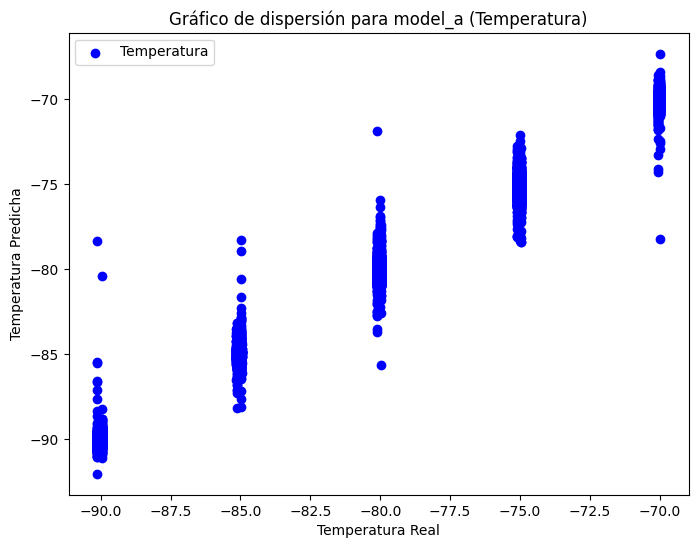

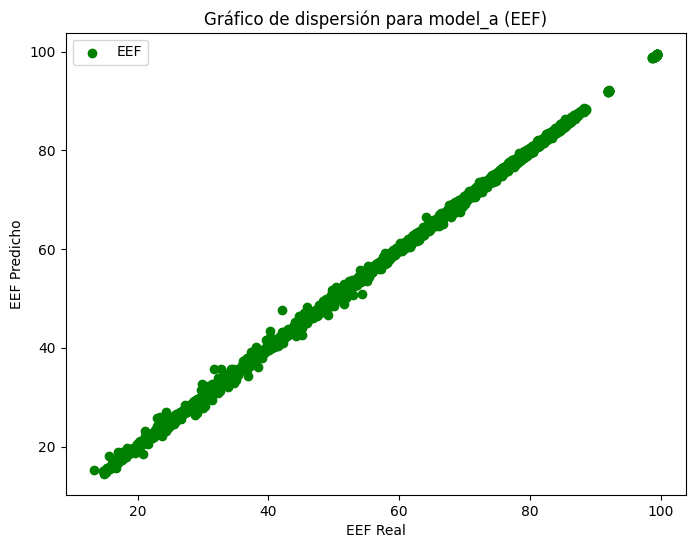

In [ ]:
import matplotlib.pyplot as plt

# Convertir los datos de entrada y salida en arrays de NumPy
input_image_test = np.array(dict_plateaux['image']['test'])
input_temperature_test = np.array(dict_plateaux['temperature']['test'])
input_eef_test = np.array(dict_plateaux['eef']['test'])

# Obtener predicciones de model_a
predictions_a_completo = best_model_a_completo_1.predict(
    {'input_image': input_image_test,
     'input_temperature': input_temperature_test,
     'input_eef': input_eef_test},)

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(input_temperature_test, predictions_a_completo[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_a (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(input_eef_test, predictions_a_completo[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_a (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()

#### Modelo B

In [ ]:
# Convertir los datos de entrada y salida en arrays de NumPy
input_image_train_bft = np.array(dict_bft['image']['train'])
input_temperature_train_bft = np.array(dict_bft['temperature']['train'])
input_eef_train_bft = np.array(dict_bft['eef']['train'])

output_temperature_train_bft = np.array(dict_bft['temperature']['train'])
output_eef_train_bft = np.array(dict_bft['eef']['train'])

input_image_valid_bft = np.array(dict_bft['image']['valid'])
input_temperature_valid_bft = np.array(dict_bft['temperature']['valid'])
input_eef_valid_bft = np.array(dict_bft['eef']['valid'])

output_temperature_valid_bft = np.array(dict_bft['temperature']['valid'])
output_eef_valid_bft = np.array(dict_bft['eef']['valid'])


In [ ]:
import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Definir los callbacks
callbacks_b_2 = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_completo_1.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

# Entrenar el modelo_b_completo con los callbacks
history_b_2 = model_b_completo.fit(
    {'input_image_bft': input_image_train_bft,
     'input_temperature_bft': input_temperature_train_bft,
     'input_eef_bft': input_eef_train_bft},
    {'output_temperature_bft': output_temperature_train_bft,
     'output_eef_bft': output_eef_train_bft},
    epochs=50,
    batch_size=32,
    validation_data=(
        {'input_image_bft': input_image_valid_bft,
         'input_temperature_bft': input_temperature_valid_bft,
         'input_eef_bft': input_eef_valid_bft},
        {'output_temperature_bft': output_temperature_valid_bft,
         'output_eef_bft': output_eef_valid_bft}
    ),
    callbacks=callbacks_b_2
)

Epoch 1/50
356/356 [==============================] - ETA: 0s - loss: 831.5974 - output_temperature_bft_loss: 395.0298 - output_eef_bft_loss: 436.5683 - output_temperature_bft_mae: 15.4262 - output_eef_bft_mae: 15.7935
Epoch 1: val_loss improved from inf to 393.02216, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_completo_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


356/356 [==============================] - 103s 288ms/step - loss: 831.5974 - output_temperature_bft_loss: 395.0298 - output_eef_bft_loss: 436.5683 - output_temperature_bft_mae: 15.4262 - output_eef_bft_mae: 15.7935 - val_loss: 393.0222 - val_output_temperature_bft_loss: 182.9229 - val_output_eef_bft_loss: 210.0992 - val_output_temperature_bft_mae: 10.5072 - val_output_eef_bft_mae: 11.0637 - lr: 0.0010
Epoch 2/50
356/356 [==============================] - ETA: 0s - loss: 61.4568 - output_temperature_bft_loss: 29.7236 - output_eef_bft_loss: 31.7332 - output_temperature_bft_mae: 3.6455 - output_eef_bft_mae: 3.6396
Epoch 2: val_loss improved from 393.02216 to 16.35491, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_completo_1.h5
356/356 [==============================] - 90s 251ms/step - loss: 61.4568 - output_temperature_bft_loss: 29.7236 - output_eef_bft_loss: 31.7332 - output_temperature_bft_mae: 3.6455 - output_eef_bft_mae: 3.6396 - val_loss: 16.354

Guardar Modelo

In [ ]:
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el historial
archivo_history_b_2 = os.path.join(directorio, "history_b_2.pkl")

# Guardar el historial en el archivo usando pickle
with open(archivo_history_b_2, 'wb') as f:
    pickle.dump(history_b_2.history, f)

print("El historial se ha guardado en el archivo", archivo_history_b_2)

El historial se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/history_b_2.pkl


Cargar modelo

In [ ]:
from keras.models import load_model

# Ruta del archivo del modelo guardado
model_b_1_path = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_completo_1.h5"

# Cargar el modelo
best_model_b_completo_1 = load_model(model_b_1_path)


In [ ]:
# Convertir los datos de prueba de entrada y salida en arrays de NumPy
input_image_test_bft = np.array(dict_bft['image']['test'])
input_temperature_test_bft = np.array(dict_bft['temperature']['test'])
input_eef_test_bft = np.array(dict_bft['eef']['test'])

output_temperature_test_bft = np.array(dict_bft['temperature']['test'])
output_eef_test_bft = np.array(dict_bft['eef']['test'])

# Evaluar model_b en el conjunto de datos de prueba
resultados_bft = best_model_b_completo_1.evaluate(
    {'input_image_bft': input_image_test_bft,
     'input_temperature_bft': input_temperature_test_bft,
     'input_eef_bft': input_eef_test_bft},
    {'output_temperature_bft': output_temperature_test_bft,
     'output_eef_bft': output_eef_test_bft}
)

print("Métricas de model_b:")
print(" - Loss total:", resultados_bft[0])
print(" - Loss de la salida de temperatura:", resultados_bft[1])
print(" - Loss de la salida de eef:", resultados_bft[2])
print(" - MAE de la salida de temperatura:", resultados_bft[3])
print(" - MAE de la salida de eef:", resultados_bft[4])



77/77 [==============================] - 11s 121ms/step - loss: 1.9344 - output_temperature_bft_loss: 1.0203 - output_eef_bft_loss: 0.9141 - output_temperature_bft_mae: 0.5962 - output_eef_bft_mae: 0.5392
Métricas de model_b:
 - Loss total: 1.9343796968460083
 - Loss de la salida de temperatura: 1.0202715396881104
 - Loss de la salida de eef: 0.9141088128089905
 - MAE de la salida de temperatura: 0.596245527267456
 - MAE de la salida de eef: 0.5392076969146729


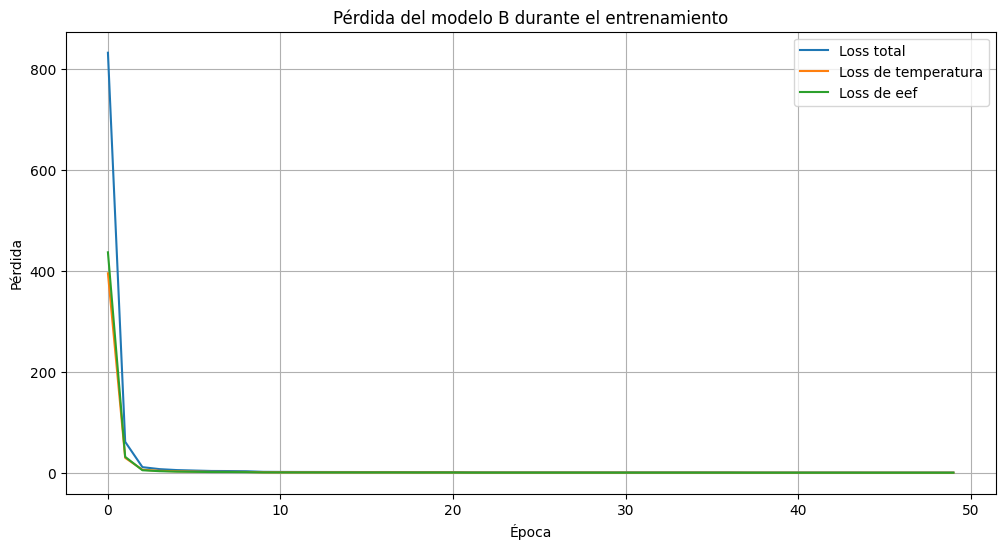

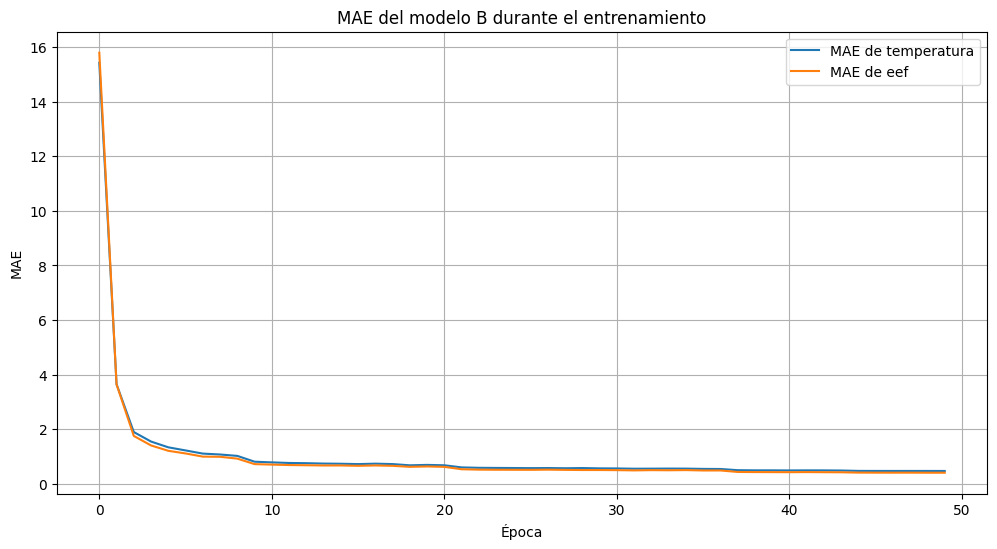

In [ ]:
# Obtener el historial de entrenamiento de model_b
history_b_2 = history_b_2.history

# Graficar la pérdida total y la pérdida de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_b_2['loss'], label='Loss total')
plt.plot(history_b_2['output_temperature_bft_loss'], label='Loss de temperatura')
plt.plot(history_b_2['output_eef_bft_loss'], label='Loss de eef')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo B durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_b_2['output_temperature_bft_mae'], label='MAE de temperatura')
plt.plot(history_b_2['output_eef_bft_mae'], label='MAE de eef')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE del modelo B durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


77/77 [==============================] - 9s 113ms/step


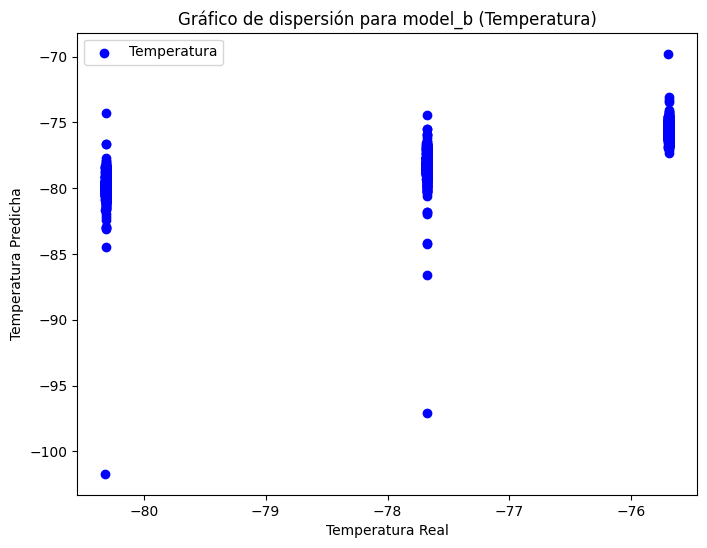

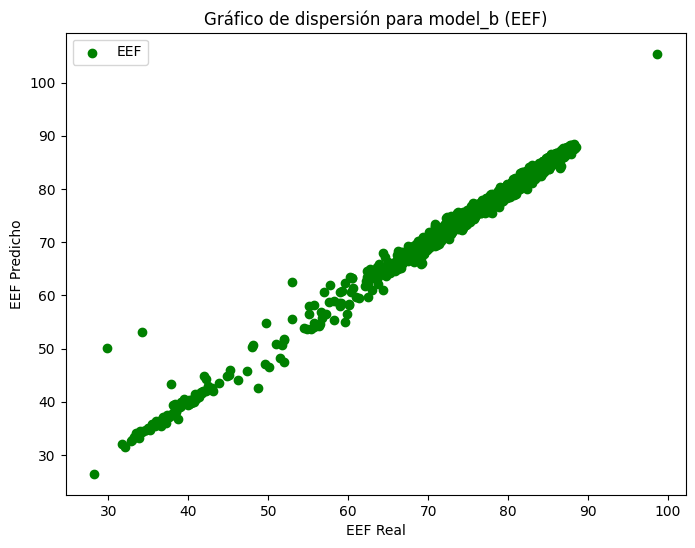

In [ ]:
import matplotlib.pyplot as plt

# Convertir los datos de entrada y salida en arrays de NumPy
input_image_test_bft = np.array(dict_bft['image']['test'])
input_temperature_test_bft = np.array(dict_bft['temperature']['test'])
input_eef_test_bft = np.array(dict_bft['eef']['test'])

# Obtener predicciones de model_b
predictions_b_completo = best_model_b_completo_1.predict(
    {'input_image_bft': input_image_test_bft,
     'input_temperature_bft': input_temperature_test_bft,
     'input_eef_bft': input_eef_test_bft},)

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(input_temperature_test_bft, predictions_b_completo[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_b (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(input_eef_test_bft, predictions_b_completo[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_b (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

# Ruta del archivo que contiene el modelo guardado
ruta_modelo = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_completo.h5"

# Cargar el modelo
best_model_b_completo = load_model(ruta_modelo)

# Ahora puedes utilizar el modelo cargado en tu código


### Predicciones

In [ ]:
import numpy as np

def predecir(model_a, model_b, data_dict):
    # Obtener las imágenes de prueba, temperaturas y EEF del diccionario de datos del modelo A
    imagenes_prueba_a = np.array(data_dict['image']['test'])
    temperaturas_prueba_a = np.array(data_dict['temperature']['test'])
    eef_prueba_a = np.array(data_dict['eef']['test'])

    # Obtener las predicciones del modelo A para las imágenes de prueba
    predicciones_temp_a, predicciones_eef_a = model_a.predict({'input_image': imagenes_prueba_a,
                                                               'input_temperature': temperaturas_prueba_a,
                                                               'input_eef': eef_prueba_a})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagenes_prueba_a,
                      'input_temperature_bft': predicciones_temp_a,
                      'input_eef_bft': predicciones_eef_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones del modelo B
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    # Calcular la media y desviación estándar de las predicciones del modelo B
    media_predicciones_temp_b = np.mean(predicciones_temp_b)
    desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b)
    media_predicciones_eef_b = np.mean(predicciones_eef_b)
    desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b)

    # Imprimir la media y desviación estándar de las predicciones del modelo B
    print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
    print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)


In [ ]:
predecir(best_model_a_completo, best_model_b_completo, dict_plateaux)

323/323 [==============================] - 23s 71ms/step
Predicción de temperatura Best Focus: -78.95807 +- 8.825498
Predicción de EEF Best Focus: 60.75468 +- 17.854906


In [ ]:
import numpy as np

def predecir_modelo(modelo ,model_a, model_b, conjuntos_datos_por_modelo):
    # Obtener las imágenes de prueba, temperaturas y EEF del diccionario de datos del modelo A
    imagenes_prueba_a = np.array(conjuntos_datos_por_modelo[modelo]['plateaux']['image']['test'])
    temperaturas_prueba_a = np.array(conjuntos_datos_por_modelo[modelo]['plateaux']['temperature']['test'])
    eef_prueba_a = np.array(conjuntos_datos_por_modelo[modelo]['plateaux']['eef']['test'])

    # Obtener las predicciones del modelo A para las imágenes de prueba
    predicciones_temp_a, predicciones_eef_a = model_a.predict({'input_image': imagenes_prueba_a,
                                                               'input_temperature': temperaturas_prueba_a,
                                                               'input_eef': eef_prueba_a})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagenes_prueba_a,
                      'input_temperature_bft': predicciones_temp_a,
                      'input_eef_bft': predicciones_eef_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones del modelo B
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    # Calcular la media y desviación estándar de las predicciones del modelo B
    media_predicciones_temp_b = np.mean(predicciones_temp_b)
    desviacion_estandar_predicciones_temp_b = np.std(predicciones_temp_b)
    media_predicciones_eef_b = np.mean(predicciones_eef_b)
    desviacion_estandar_predicciones_eef_b = np.std(predicciones_eef_b)

    # Imprimir la media y desviación estándar de las predicciones del modelo B
    print("Predicción de temperatura Best Focus:", media_predicciones_temp_b, "+-", desviacion_estandar_predicciones_temp_b)
    print("Predicción de EEF Best Focus:", media_predicciones_eef_b, "+-", desviacion_estandar_predicciones_eef_b)

In [ ]:
predecir_modelo('EM', best_model_a_completo, best_model_b_completo, conjuntos_datos_por_modelo)

116/116 [==============================] - 9s 76ms/step
Predicción de temperatura Best Focus: -75.04052 +- 5.631631
Predicción de EEF Best Focus: 58.155926 +- 17.836615


In [ ]:
predecir_modelo('FM3', best_model_a_completo, best_model_b_completo, conjuntos_datos_por_modelo)

116/116 [==============================] - 9s 76ms/step
Predicción de temperatura Best Focus: -77.064896 +- 2.7012184
Predicción de EEF Best Focus: 59.504795 +- 18.546745


In [ ]:
predecir_modelo('FM6', best_model_a_completo, best_model_b_completo, conjuntos_datos_por_modelo)

93/93 [==============================] - 8s 81ms/step
Predicción de temperatura Best Focus: -85.94451 +- 11.92456
Predicción de EEF Best Focus: 65.7232 +- 15.581892


Añadimos el FM10 al diccionario

In [ ]:
conjuntos_datos_por_modelo_1 = conjuntos_datos_por_modelo.copy()

In [ ]:
conjuntos_datos_por_modelo_1['FM10'] = {
    'imagenes': {'plateaux': imagenes_fm10_plateaux, 'bft': imagenes_fm10_bft},
    'temperatura': {'plateaux': temperaturas_fm10_plateaux, 'bft': temperaturas_fm10_bft},
    'eef': {'plateaux': eef_fm10_plateaux, 'bft': eef_fm10_bft}
}

In [ ]:
# Crear un diccionario para almacenar las variables organizadas por modelo
datos_por_modelo_1 = {
    'EM': {'imagenes': {'plateaux': imagenes_em_plateaux, 'bft': imagenes_em_bft},
           'temperatura': {'plateaux': temperaturas_em_plateaux, 'bft': temperaturas_em_bft},
           'eef': {'plateaux': eef_em_plateaux, 'bft': eef_em_bft}},
    'FM3': {'imagenes': {'plateaux': imagenes_fm3_plateaux, 'bft': imagenes_fm3_bft},
            'temperatura': {'plateaux': temperaturas_fm3_plateaux, 'bft': temperaturas_fm3_bft},
            'eef': {'plateaux': eef_fm3_plateaux, 'bft': eef_fm3_bft}},
    'FM6': {'imagenes': {'plateaux': imagenes_fm6_plateaux, 'bft': imagenes_fm6_bft},
            'temperatura': {'plateaux': temperaturas_fm6_plateaux, 'bft': temperaturas_fm6_bft},
            'eef': {'plateaux': eef_fm6_plateaux, 'bft': eef_fm6_bft}},
    'FM10': {'imagenes': {'plateaux': imagenes_fm10_plateaux, 'bft': imagenes_fm10_bft},
             'temperatura': {'plateaux': temperaturas_fm10_plateaux, 'bft': temperaturas_fm10_bft},
             'eef': {'plateaux': eef_fm10_plateaux, 'bft': eef_fm10_bft}}
}


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

def obtener_imagenes(modelo, subtipo, datos_por_modelo_1):
    # Suponiendo que los datos por modelo están estructurados como un diccionario
    return datos_por_modelo_1[modelo]['imagenes'][subtipo]

def obtener_temperaturas(modelo, subtipo, datos_por_modelo_1):
    # Suponiendo que los datos por modelo están estructurados como un diccionario
    return datos_por_modelo_1[modelo]['temperatura'][subtipo]

def obtener_eef(modelo, subtipo, datos_por_modelo_1):
    # Suponiendo que los datos por modelo están estructurados como un diccionario
    return datos_por_modelo_1[modelo]['eef'][subtipo]

conjuntos_datos_por_modelo_1 = {}

# Por cada modelo y subtipo, dividir los datos en entrenamiento, validación y prueba
#Si quiero añadir FM10 añadirlo a la lista
for modelo in ["EM", "FM3", "FM6","FM10"]:
    conjuntos_datos_por_modelo_1[modelo] = {}
    for subtipo in ["plateaux", "bft"]:
        # Obtener los datos correspondientes al modelo y subtipo actual
        imagenes = obtener_imagenes(modelo, subtipo, datos_por_modelo_1)
        temperaturas = obtener_temperaturas(modelo, subtipo, datos_por_modelo_1)
        eef = obtener_eef(modelo, subtipo, datos_por_modelo_1)

        # Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
        x_train, x_temp_val_test, temp_train, temp_val_test, eef_train, eef_val_test = train_test_split(imagenes, temperaturas, eef, test_size=0.3, random_state=1)
        x_valid, x_test, temp_valid, temp_test, eef_valid, eef_test = train_test_split(x_temp_val_test, temp_val_test, eef_val_test, test_size=0.5, random_state=1)

        # Ajustar la forma de los datos de imagen de entrenamiento y validación
        image_train = np.expand_dims(x_train, axis=-1)
        image_valid = np.expand_dims(x_valid, axis=-1)
        image_test = np.expand_dims(x_test, axis=-1)

        #Creamos diccionario
        conjuntos_datos_por_modelo_1[modelo][subtipo] = {
            "image": {
                "train": image_train,
                "valid": image_valid,
                "test": image_test
            },
            "temperature": {
                "train": temp_train,
                "valid": temp_valid,
                "test": temp_test
            },
            "eef": {
                "train": eef_train,
                "valid": eef_valid,
                "test": eef_test
            }
        }



In [ ]:
import os
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo = os.path.join(directorio, "conjuntos_datos_por_modelo_1.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo, 'wb') as f:
    pickle.dump(conjuntos_datos_por_modelo_1, f)

print("El diccionario conjuntos_datos_por_modelo_1 se ha guardado en el archivo", archivo)


El diccionario conjuntos_datos_por_modelo_1 se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/conjuntos_datos_por_modelo_1.pkl


In [ ]:
predecir_modelo('FM10', best_model_a_completo, best_model_b_completo, conjuntos_datos_por_modelo_1)

116/116 [==============================] - 9s 76ms/step
Predicción de temperatura Best Focus: -89.8331 +- 17.191557
Predicción de EEF Best Focus: 58.96505 +- 24.82889


#### Predicciones Por modelo

Para realizar las predicciones se emplean:
* best_model_a_completo
* best_model_b_completo
* conjuntos_datos_por_modelo_1

Se va a obtener la distribucion de probabilidad de los resultados

Importar datos

In [ ]:
# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo = os.path.join(directorio, "conjuntos_datos_por_modelo_1.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo, 'wb') as f:
    pickle.dump(conjuntos_datos_por_modelo_1, f)

In [ ]:
from keras.models import load_model

# Directorio donde se encuentran los archivos de diccionario
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre de los archivos de diccionario
archivo_conjuntos_datos_por_modelo_1 = os.path.join(directorio, "conjuntos_datos_por_modelo_1.pkl")

# Cargar los diccionarios desde los archivos usando pickle
with open(archivo_conjuntos_datos_por_modelo_1, 'rb') as f:
    conjuntos_datos_por_modelo_1 = pickle.load(f)

print("Los diccionarios se han cargado desde los archivos correspondientes.")


Los diccionarios se han cargado desde los archivos correspondientes.


In [ ]:
import numpy as np

def predecir_modelo(modelo ,model_a, model_b, conjuntos_datos_por_modelo):
    # Obtener las imágenes de prueba, temperaturas y EEF del diccionario de datos del modelo A
    imagenes_prueba_a = np.array(conjuntos_datos_por_modelo[modelo]['plateaux']['image']['test'])
    temperaturas_prueba_a = np.array(conjuntos_datos_por_modelo[modelo]['plateaux']['temperature']['test'])
    eef_prueba_a = np.array(conjuntos_datos_por_modelo[modelo]['plateaux']['eef']['test'])

    # Obtener las predicciones del modelo A para las imágenes de prueba
    predicciones_temp_a, predicciones_eef_a = model_a.predict({'input_image': imagenes_prueba_a,
                                                               'input_temperature': temperaturas_prueba_a,
                                                               'input_eef': eef_prueba_a})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagenes_prueba_a,
                      'input_temperature_bft': predicciones_temp_a,
                      'input_eef_bft': predicciones_eef_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones del modelo B
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    return predicciones_temp_b, predicciones_eef_b

In [ ]:
BFT_FM3, EEF_FM3 = predecir_modelo('FM3', best_model_a_completo_1, best_model_b_completo_1, conjuntos_datos_por_modelo_1)

116/116 [==============================] - 17s 138ms/step


In [ ]:
BFT_FM6, EEF_FM6 = predecir_modelo('FM6', best_model_a_completo_1, best_model_b_completo_1, conjuntos_datos_por_modelo_1)

93/93 [==============================] - 14s 149ms/step


In [ ]:
BFT_EM, EEF_EM = predecir_modelo('EM', best_model_a_completo_1, best_model_b_completo_1, conjuntos_datos_por_modelo_1)

116/116 [==============================] - 10s 87ms/step


In [ ]:
BFT_FM10, EEF_FM10 = predecir_modelo('FM10', best_model_a_completo_1, best_model_b_completo_1, conjuntos_datos_por_modelo_1)

116/116 [==============================] - 8s 69ms/step


In [ ]:
BFT_FM13, EEF_FM13 = predecir_modelo('FM13', best_model_a_completo_1, best_model_b_completo_1, conjuntos_datos_por_modelo_2)

44/44 [==============================] - 3s 64ms/step


In [ ]:
# Especificar la ruta donde deseas guardar los archivos
ruta_guardado = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/'

# Guardar los datos en archivos numpy (.npy)
np.save(ruta_guardado + 'BFT_FM3.npy', BFT_FM3)
np.save(ruta_guardado + 'EEF_FM3.npy', EEF_FM3)
np.save(ruta_guardado + 'BFT_FM6.npy', BFT_FM6)
np.save(ruta_guardado + 'EEF_FM6.npy', EEF_FM6)
np.save(ruta_guardado + 'BFT_EM.npy', BFT_EM)
np.save(ruta_guardado + 'EEF_EM.npy', EEF_EM)
np.save(ruta_guardado + 'BFT_FM10.npy', BFT_FM10)
np.save(ruta_guardado + 'EEF_FM10.npy', EEF_FM10)

# Confirmar que los archivos se han guardado correctamente
print("Datos guardados exitosamente en Google Drive.")

Datos guardados exitosamente en Google Drive.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def representar_resultados_temperatura_boxplot(predicciones_temp_b, conf_level=0.95):
    # Convertir el array numpy en un objeto DataFrame de pandas
    df_temp = pd.DataFrame(predicciones_temp_b, columns=['Predicciones de Temperatura'])

    # Calcular la mediana de las predicciones
    mediana_temp = np.median(predicciones_temp_b)

    # Imprimir estadísticas resumidas
    print("Estadísticas de Predicciones de Temperatura:")
    print(df_temp.describe())
    print("Mediana de las Predicciones de Temperatura:", mediana_temp)
    print()

    # Crear un gráfico de caja (boxplot) para las predicciones de temperatura
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df_temp, color='skyblue')
    plt.title('Distribución de Predicciones de Temperatura')
    plt.ylabel('Temperatura')
    plt.axhline(y=mediana_temp, color='red', linestyle='--', label=f'Mediana: {mediana_temp}')
    plt.legend()
    plt.tight_layout()
    plt.show()

def representar_resultados_temperatura_violin(predicciones_temp_b, conf_level=0.95):
    # Convertir el array numpy en un objeto DataFrame de pandas
    df_temp = pd.DataFrame(predicciones_temp_b, columns=['Predicciones de Temperatura'])

    # Calcular la mediana y los percentiles
    mediana_temp = np.median(predicciones_temp_b)
    p25_temp = np.percentile(predicciones_temp_b, 25)
    p75_temp = np.percentile(predicciones_temp_b, 75)

    # Calcular el rango intercuartílico (IQR)
    iqr_temp = p75_temp - p25_temp

    uncertainty_lower = mediana_temp - p25_temp
    uncertainty_upper = p75_temp - mediana_temp


    # Imprimir estadísticas resumidas
    print("Estadísticas de Predicciones de Temperatura:")
    print(df_temp.describe())
    print("Mediana de las Predicciones de Temperatura:", mediana_temp)
    print("Incertidumbre (25% - Mediana):", uncertainty_lower)
    print("Incertidumbre (Mediana - 75%):", uncertainty_upper)

    print()

    # Crear un gráfico de violín para las predicciones de temperatura
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df_temp, color='skyblue')
    plt.title('Distribución de Predicciones de Temperatura')
    plt.ylabel('Temperatura')
    plt.axhline(y=mediana_temp, color='red', linestyle='--', label=f'Mediana: {mediana_temp}')

    # Mostrar los percentiles en el gráfico
    plt.axhspan(p25_temp, p75_temp, color='gray', alpha=0.2, label='IQR (25%-75%)')
    plt.axhline(y=p25_temp, color='gray', linestyle=':')
    plt.axhline(y=p75_temp, color='gray', linestyle=':')

    plt.legend()
    plt.tight_layout()
    plt.show()


def representar_resultados_temperatura_violin_moda(predicciones_temp_b, conf_level=0.95):
    # Convertir el array numpy en un objeto DataFrame de pandas
    df_temp = pd.DataFrame(predicciones_temp_b, columns=['Predicciones de Temperatura'])

    # Calcular la moda y los percentiles
    moda_temp = df_temp['Predicciones de Temperatura'].mode().iloc[0]
    p25_temp = np.percentile(predicciones_temp_b, 25)
    p75_temp = np.percentile(predicciones_temp_b, 75)

    # Calcular el rango intercuartílico (IQR)
    iqr_temp = p75_temp - p25_temp

    uncertainty_lower = moda_temp - p25_temp
    uncertainty_upper = p75_temp - moda_temp


    # Imprimir estadísticas resumidas
    print("Estadísticas de Predicciones de Temperatura:")
    print(df_temp.describe())
    print("Moda de las Predicciones de Temperatura:", moda_temp)
    print("Incertidumbre (25% - Moda):", uncertainty_lower)
    print("Incertidumbre (Moda - 75%):", uncertainty_upper)

    print()

    # Crear un gráfico de violín para las predicciones de temperatura
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df_temp, color='skyblue')
    plt.title('Distribución de Predicciones de Temperatura')
    plt.ylabel('Temperatura')
    plt.axhline(y=moda_temp, color='red', linestyle='--', label=f'Moda: {moda_temp}')

    # Mostrar los percentiles en el gráfico
    plt.axhspan(p25_temp, p75_temp, color='gray', alpha=0.2, label='IQR (25%-75%)')
    plt.axhline(y=p25_temp, color='gray', linestyle=':', label='25%')
    plt.axhline(y=p75_temp, color='gray', linestyle=':', label='75%')

    plt.legend()
    plt.tight_layout()
    plt.show()

def representar_resultados_temperatura_violin_mediana(predicciones_temp_b, conf_level=0.95):
    # Convertir el array numpy en un objeto DataFrame de pandas
    df_temp = pd.DataFrame(predicciones_temp_b, columns=['Predicciones de Temperatura'])

    # Calcular la mediana y los percentiles
    mediana_temp = np.median(predicciones_temp_b)
    p25_temp = np.percentile(predicciones_temp_b, 25)
    p75_temp = np.percentile(predicciones_temp_b, 75)

    # Calcular el rango intercuartílico (IQR)
    iqr_temp = p75_temp - p25_temp

    uncertainty_lower = mediana_temp - p25_temp
    uncertainty_upper = p75_temp - mediana_temp

    # Imprimir estadísticas resumidas
    print("Estadísticas de Predicciones de Temperatura:")
    print(df_temp.describe())
    print("Mediana de las Predicciones de Temperatura:", mediana_temp)
    print("Incertidumbre (25% - Mediana):", uncertainty_lower)
    print("Incertidumbre (Mediana - 75%):", uncertainty_upper)

    print()

    # Crear un gráfico de violín para las predicciones de temperatura
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df_temp, color='skyblue')
    plt.title('Distribución de Predicciones de Temperatura')
    plt.ylabel('Temperatura')
    plt.axhline(y=mediana_temp, color='red', linestyle='--', label=f'Mediana: {mediana_temp}')

    # Mostrar los percentiles en el gráfico
    plt.axhspan(p25_temp, p75_temp, color='gray', alpha=0.2, label='IQR (25%-75%)')
    plt.axhline(y=p25_temp, color='gray', linestyle=':', label='25%')
    plt.axhline(y=p75_temp, color='gray', linestyle=':', label='75%')

    plt.legend()
    plt.tight_layout()
    plt.show()


def representar_resultados_eef(predicciones_eef_b, conf_level=0.95):
    # Convertir el array numpy en un objeto DataFrame de pandas
    df_eef = pd.DataFrame(predicciones_eef_b, columns=['Predicciones de EEF'])

    # Calcular la mediana de las predicciones
    mediana_eef = np.median(predicciones_eef_b)

    # Imprimir estadísticas resumidas
    print("Estadísticas de Predicciones de EEF:")
    print(df_eef.describe())
    print("Mediana de las Predicciones de EEF:", mediana_eef)
    print()

    # Crear un gráfico de caja (boxplot) para las predicciones de EEF
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df_eef, color='lightgreen')
    plt.title('Distribución de Predicciones de EEF')
    plt.ylabel('EEF')
    plt.axhline(y=mediana_eef, color='red', linestyle='--', label=f'Mediana: {mediana_eef}')
    plt.legend()
    plt.tight_layout()
    plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def representar_resultados_eef_histograma(predicciones_eef_b, conf_level=0.95):
    # Convertir el array numpy en un objeto DataFrame de pandas
    df_eef = pd.DataFrame(predicciones_eef_b, columns=['Predicciones de EEF'])

    # Calcular la mediana de las predicciones
    mediana_eef = np.median(predicciones_eef_b)

    # Imprimir estadísticas resumidas
    print("Estadísticas de Predicciones de EEF:")
    print(df_eef.describe())
    print("Mediana de las Predicciones de EEF:", mediana_eef)
    print()

    # Crear un histograma para las predicciones de EEF
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_eef, bins=20, kde=True, color='lightgreen')
    plt.title('Distribución de Predicciones de EEF')
    plt.xlabel('EEF')
    plt.ylabel('Frecuencia')
    plt.axvline(x=mediana_eef, color='red', linestyle='--', label=f'Mediana: {mediana_eef}')
    plt.legend()
    plt.tight_layout()
    plt.show()




##### FM3

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  3690.000000
mean                    -76.528809
std                       2.590636
min                     -89.205666
25%                     -77.692974
50%                     -76.630997
75%                     -75.499443
max                     -63.086658
Mediana de las Predicciones de Temperatura: -76.631
Incertidumbre (25% - Mediana): 1.0619773864746094
Incertidumbre (Mediana - 75%): 1.1315536499023438



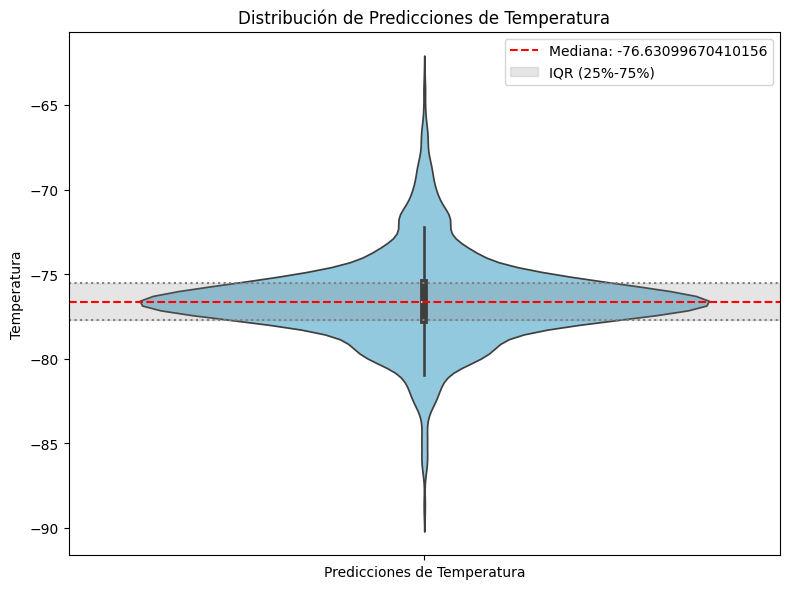

In [ ]:
representar_resultados_temperatura_violin(BFT_FM3)

Estadísticas de Predicciones de EEF:
       Predicciones de EEF
count          3690.000000
mean             58.390343
std              18.516890
min               9.910230
25%              48.843476
50%              57.429621
75%              75.638330
max              89.814575
Mediana de las Predicciones de EEF: 57.42962



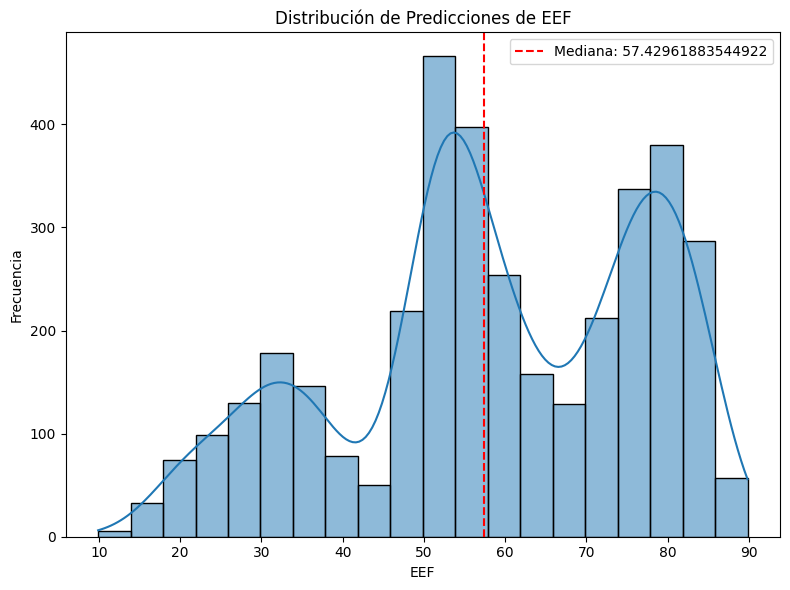

In [ ]:
representar_resultados_eef_histograma(EEF_FM3)

##### FM6

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  2952.000000
mean                    -83.169876
std                       7.748144
min                    -127.240829
25%                     -85.772795
50%                     -81.048592
75%                     -77.628252
max                     -70.903015
Mediana de las Predicciones de Temperatura: -81.04859
Incertidumbre (25% - Mediana): 4.724203109741211
Incertidumbre (Mediana - 75%): 3.420339584350586



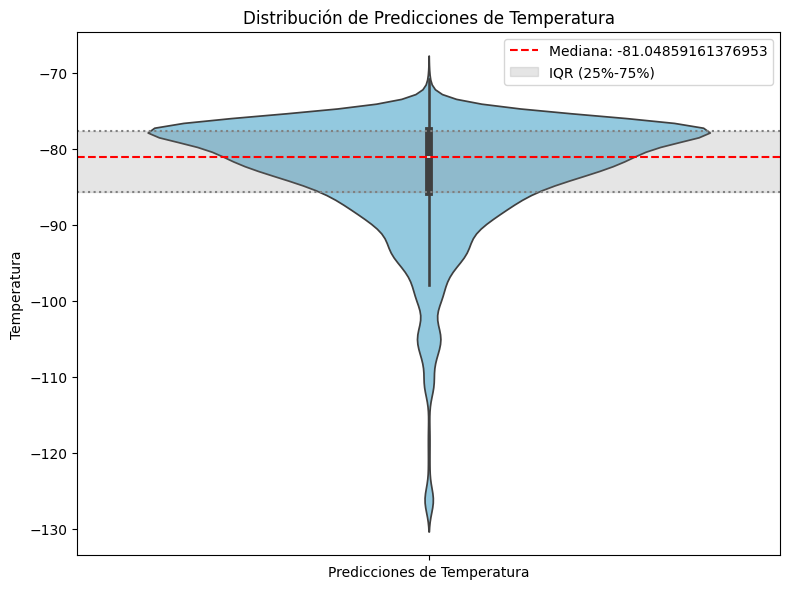

In [ ]:
representar_resultados_temperatura_violin(BFT_FM6)

Estadísticas de Predicciones de EEF:
       Predicciones de EEF
count          2952.000000
mean             64.557526
std              16.883451
min               7.558474
25%              53.776443
50%              68.316917
75%              76.581739
max             125.544533
Mediana de las Predicciones de EEF: 68.31692



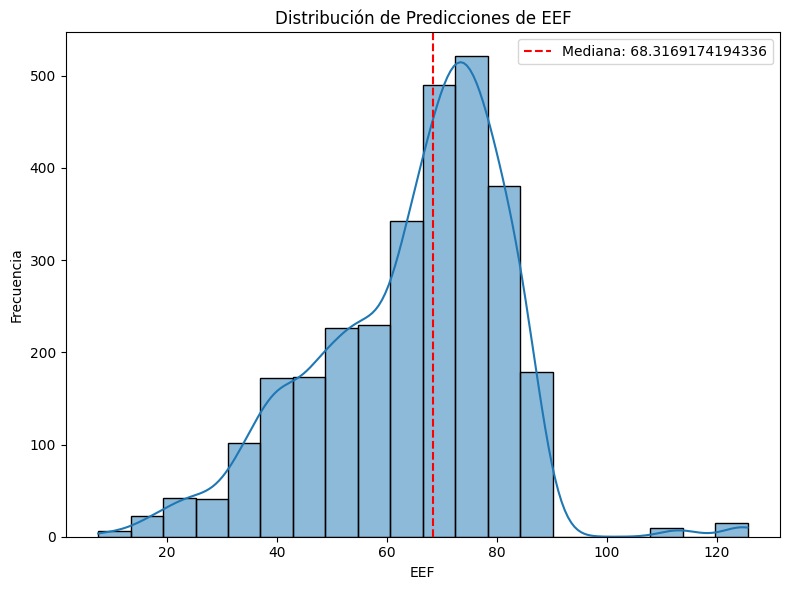

In [ ]:
representar_resultados_eef_histograma(EEF_FM6)

##### EM

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  3690.000000
mean                    -73.754135
std                       5.820132
min                    -114.493156
25%                     -75.471035
50%                     -74.626476
75%                     -72.619617
max                     -50.277576
Mediana de las Predicciones de Temperatura: -74.62648
Incertidumbre (25% - Mediana): 0.8445549011230469
Incertidumbre (Mediana - 75%): 2.0068626403808594



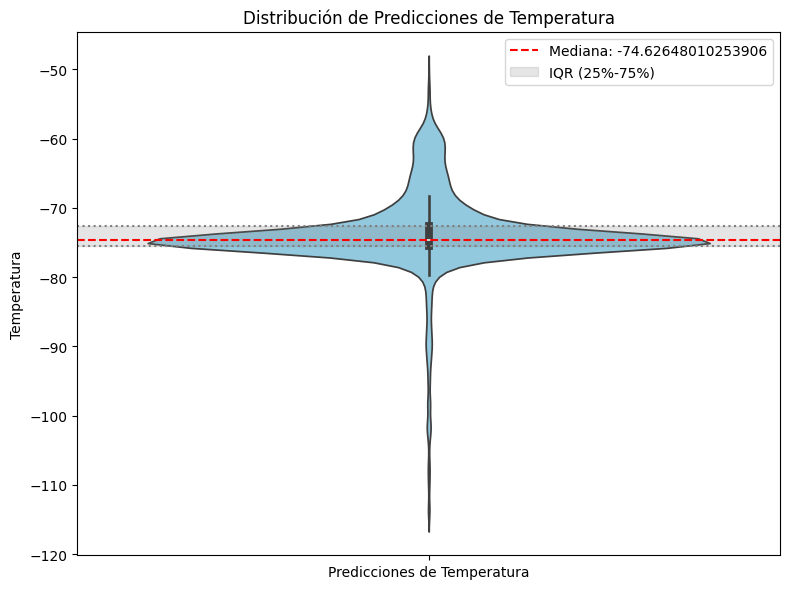

In [ ]:
representar_resultados_temperatura_violin(BFT_EM)

Estadísticas de Predicciones de EEF:
       Predicciones de EEF
count          3690.000000
mean             57.009224
std              19.120670
min              13.684428
25%              41.752556
50%              60.326849
75%              72.771538
max             101.936699
Mediana de las Predicciones de EEF: 60.32685



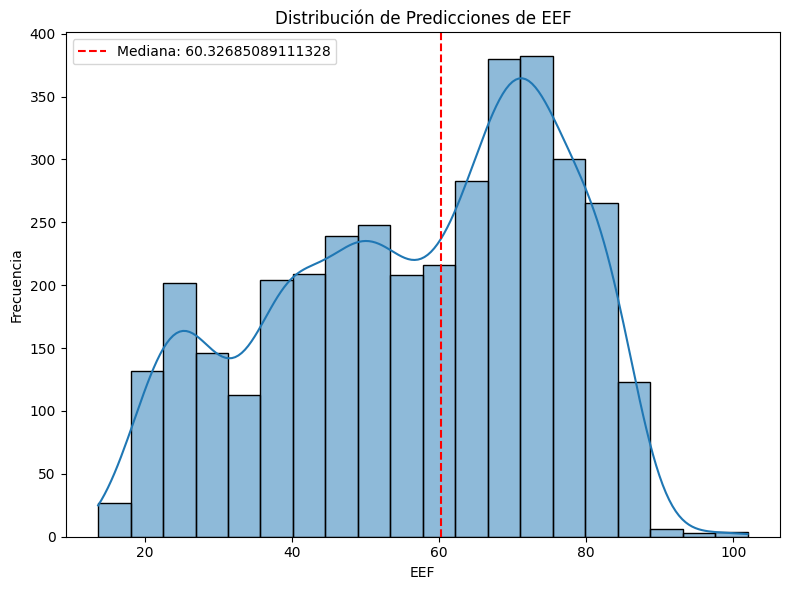

In [ ]:
representar_resultados_eef_histograma(EEF_EM)

##### FM10

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  3690.000000
mean                    -85.757805
std                      13.788709
min                    -183.126190
25%                     -87.024616
50%                     -81.777809
75%                     -79.345192
max                     -63.814289
Mediana de las Predicciones de Temperatura: -81.77781
Incertidumbre (25% - Mediana): 5.246807098388672
Incertidumbre (Mediana - 75%): 2.4326171875



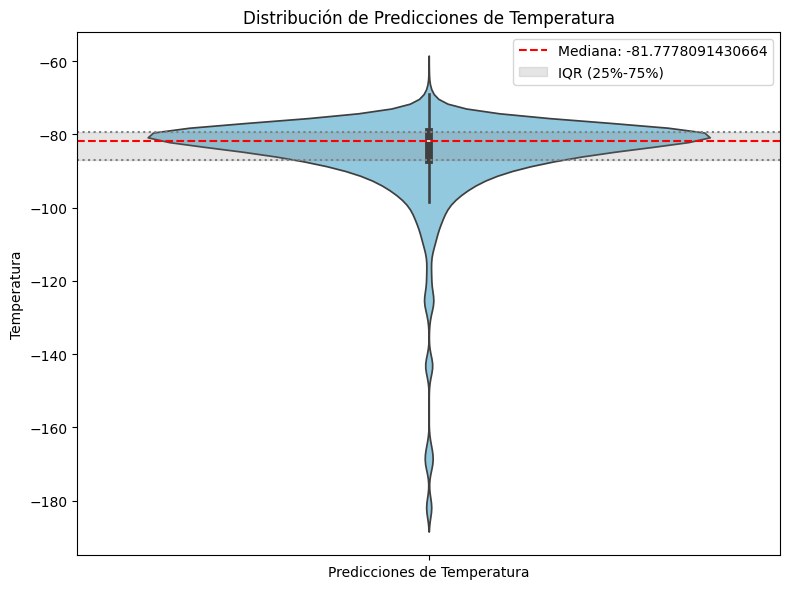

In [ ]:
representar_resultados_temperatura_violin(BFT_FM10)

Estadísticas de Predicciones de EEF:
       Predicciones de EEF
count          3690.000000
mean             57.633617
std              22.092966
min              -6.293670
25%              44.777126
50%              61.624897
75%              76.328697
max              97.628632
Mediana de las Predicciones de EEF: 61.624897



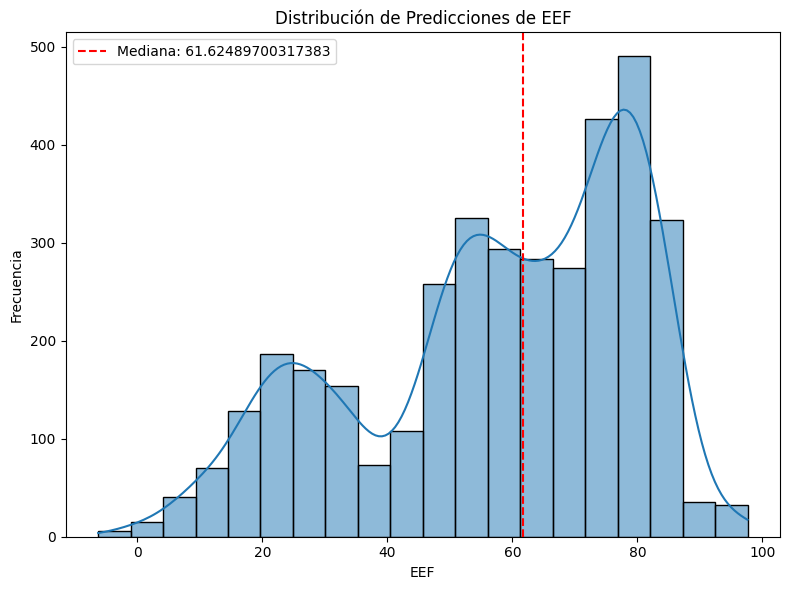

In [ ]:
representar_resultados_eef_histograma(EEF_FM10)

##### FM13

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  1380.000000
mean                    -83.161804
std                       6.737929
min                    -111.818100
25%                     -85.878925
50%                     -80.121647
75%                     -78.508362
max                     -68.626762
Mediana de las Predicciones de Temperatura: -80.12164
Incertidumbre (25% - Mediana): 5.757282257080078
Incertidumbre (Mediana - 75%): 1.61328125



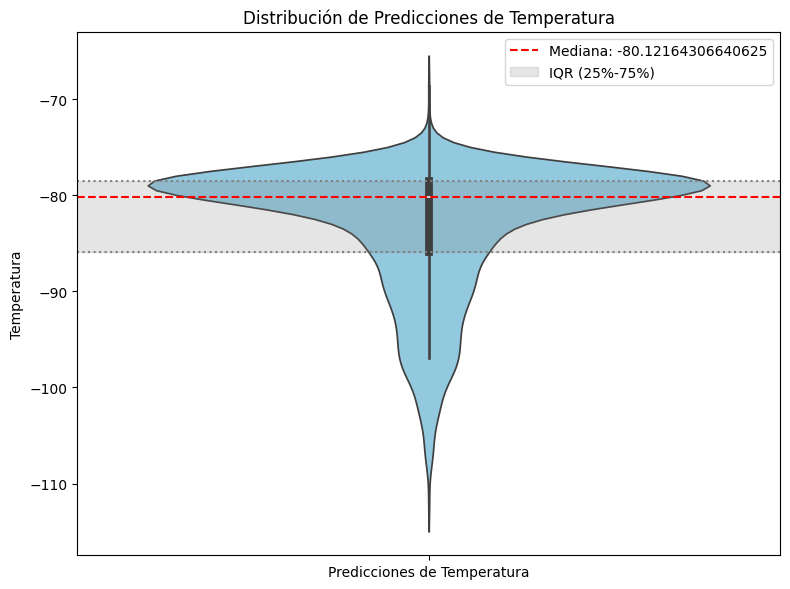

In [ ]:
representar_resultados_temperatura_violin(BFT_FM13)

Estadísticas de Predicciones de EEF:
       Predicciones de EEF
count          1380.000000
mean             63.323048
std              19.928877
min               4.950342
25%              47.854897
50%              70.534298
75%              80.130810
max              89.301193
Mediana de las Predicciones de EEF: 70.5343



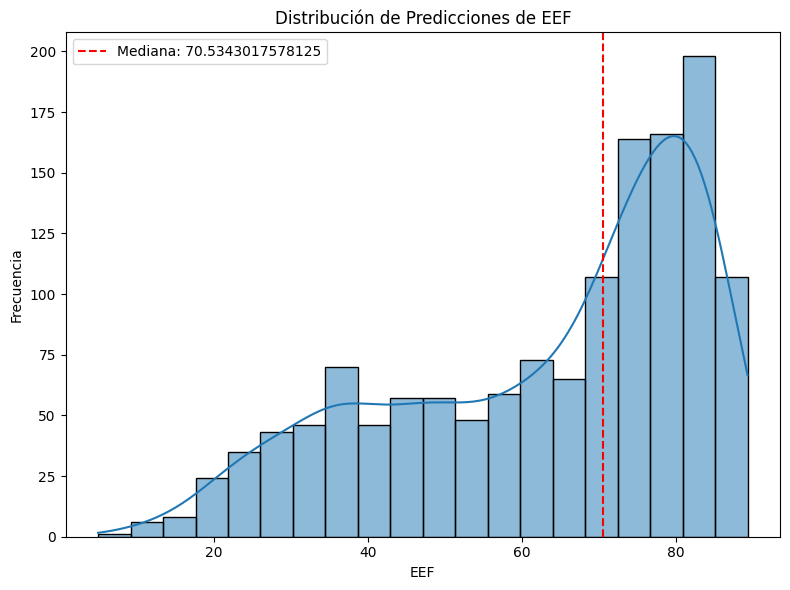

In [ ]:
representar_resultados_eef_histograma(EEF_FM13)

Representando con la Moda y la Densidad máxima de los datos en el punto de la distribución

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

def representar_resultados_temperatura_violin_max_density(predicciones_temp_b, conf_level=0.95):
    # Convertir el array numpy en un objeto DataFrame de pandas
    df_temp = pd.DataFrame(predicciones_temp_b, columns=['Predicciones de Temperatura'])

    # Calcular la mediana y los percentiles
    mediana_temp = np.median(predicciones_temp_b)
    p25_temp = np.percentile(predicciones_temp_b, 25)
    p75_temp = np.percentile(predicciones_temp_b, 75)

    # Calcular el rango intercuartílico (IQR)
    iqr_temp = p75_temp - p25_temp

    uncertainty_lower = mediana_temp - p25_temp
    uncertainty_upper = p75_temp - mediana_temp

    # Calcular la densidad máxima de los datos en el punto de la distribución
    kde = gaussian_kde(predicciones_temp_b.flatten())
    x_vals = np.linspace(predicciones_temp_b.min(), predicciones_temp_b.max(), 1000)
    y_vals = kde(x_vals)
    max_density_index = np.argmax(y_vals)
    max_density_value = y_vals[max_density_index]
    max_density_temp = x_vals[max_density_index]

    # Imprimir estadísticas resumidas
    print("Estadísticas de Predicciones de Temperatura:")
    print(df_temp.describe())
    print("Mediana de las Predicciones de Temperatura:", mediana_temp)
    print("Incertidumbre (25% - Mediana):", uncertainty_lower)
    print("Incertidumbre (Mediana - 75%):", uncertainty_upper)
    print("Valor de temperatura con la densidad máxima de los datos:", max_density_temp)

    print()

    # Crear un gráfico de violín para las predicciones de temperatura
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df_temp, color='skyblue')
    plt.title('Distribución de Predicciones de Temperatura')
    plt.ylabel('Temperatura')

    # Mostrar los percentiles en el gráfico
    plt.axhspan(p25_temp, p75_temp, color='gray', alpha=0.2, label='IQR (25%-75%)')
    plt.axhline(y=p25_temp, color='gray', linestyle=':', label='25%')
    plt.axhline(y=p75_temp, color='gray', linestyle=':', label='75%')

    # Mostrar la densidad máxima en el gráfico
    plt.axhline(y=max_density_temp, color='green', linestyle='-.', label=f'Temperatura con Densidad Máxima: {max_density_temp:.2f}')

    plt.legend()
    plt.tight_layout()
    plt.show()


Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  3690.000000
mean                    -76.528809
std                       2.590636
min                     -89.205666
25%                     -77.692974
50%                     -76.630997
75%                     -75.499443
max                     -63.086658
Moda de las Predicciones de Temperatura: -77.16027
Mediana de las Predicciones de Temperatura: -76.631
Incertidumbre (25% - Mediana): 1.0619773864746094
Incertidumbre (Mediana - 75%): 1.1315536499023438



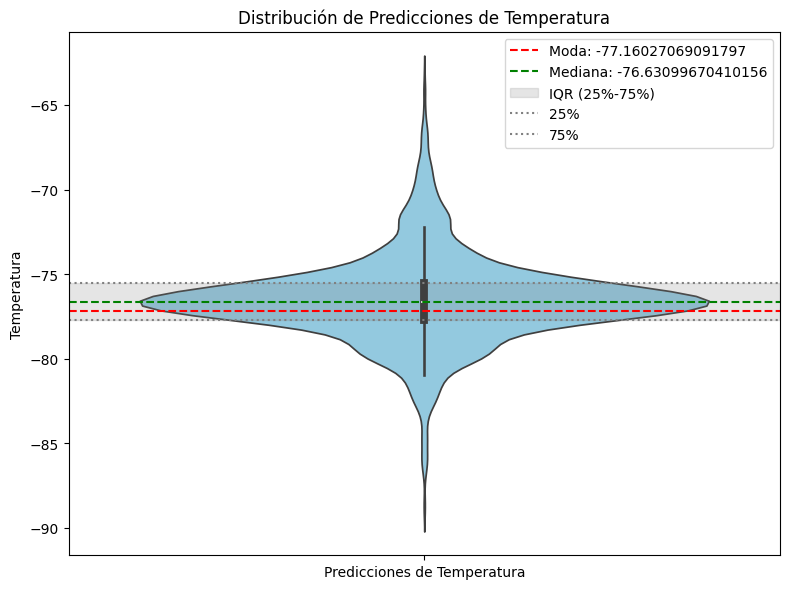

In [ ]:
representar_resultados_temperatura_violin_moda_mediana(BFT_FM3)

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  2952.000000
mean                    -83.169876
std                       7.748144
min                    -127.240829
25%                     -85.772795
50%                     -81.048592
75%                     -77.628252
max                     -70.903015
Moda de las Predicciones de Temperatura: -77.1301
Mediana de las Predicciones de Temperatura: -81.04859
Incertidumbre (25% - Mediana): 4.724203109741211
Incertidumbre (Mediana - 75%): 3.420339584350586



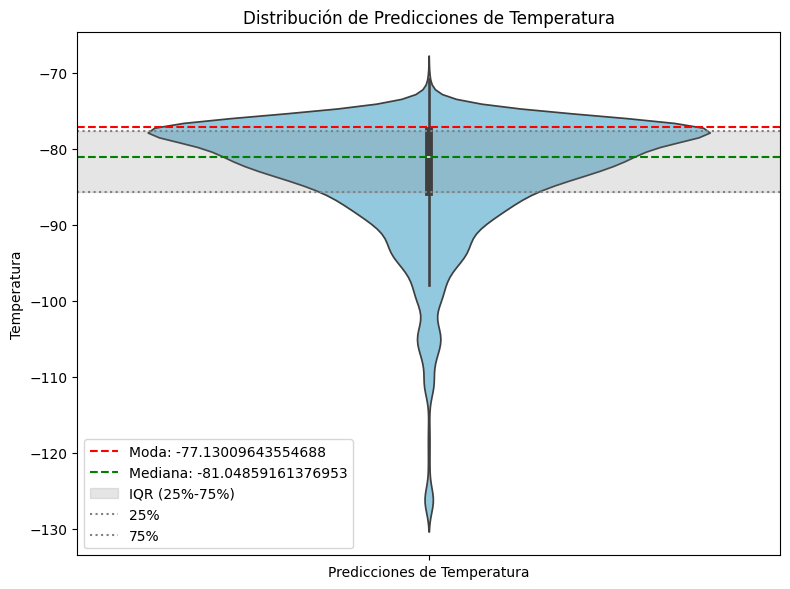

In [ ]:
representar_resultados_temperatura_violin_moda_mediana(BFT_FM6)

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  3690.000000
mean                    -73.754135
std                       5.820132
min                    -114.493156
25%                     -75.471035
50%                     -74.626476
75%                     -72.619617
max                     -50.277576
Moda de las Predicciones de Temperatura: -75.57389
Mediana de las Predicciones de Temperatura: -74.62648
Incertidumbre (25% - Mediana): 0.8445549011230469
Incertidumbre (Mediana - 75%): 2.0068626403808594



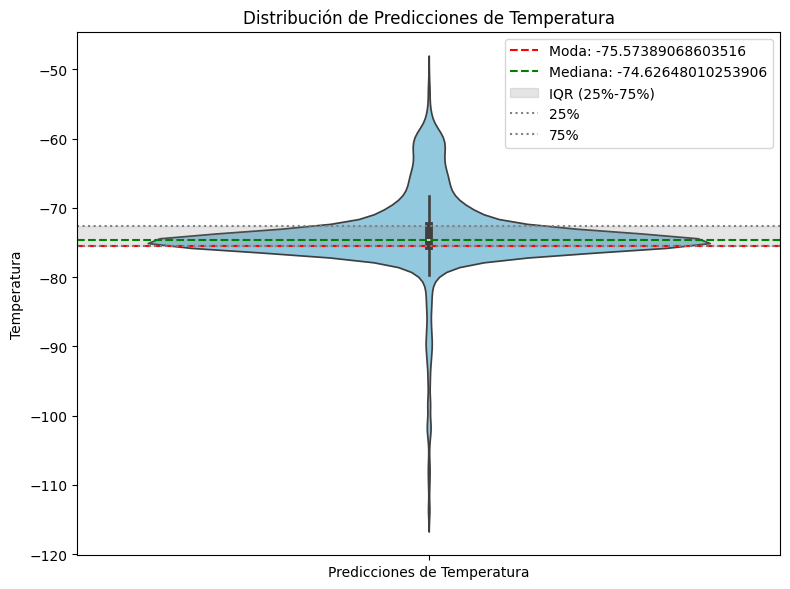

In [ ]:
representar_resultados_temperatura_violin_moda_mediana(BFT_EM)

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  3690.000000
mean                    -85.757805
std                      13.788709
min                    -183.126190
25%                     -87.024616
50%                     -81.777809
75%                     -79.345192
max                     -63.814289
Moda de las Predicciones de Temperatura: -82.769554
Mediana de las Predicciones de Temperatura: -81.77781
Incertidumbre (25% - Mediana): 5.246807098388672
Incertidumbre (Mediana - 75%): 2.4326171875



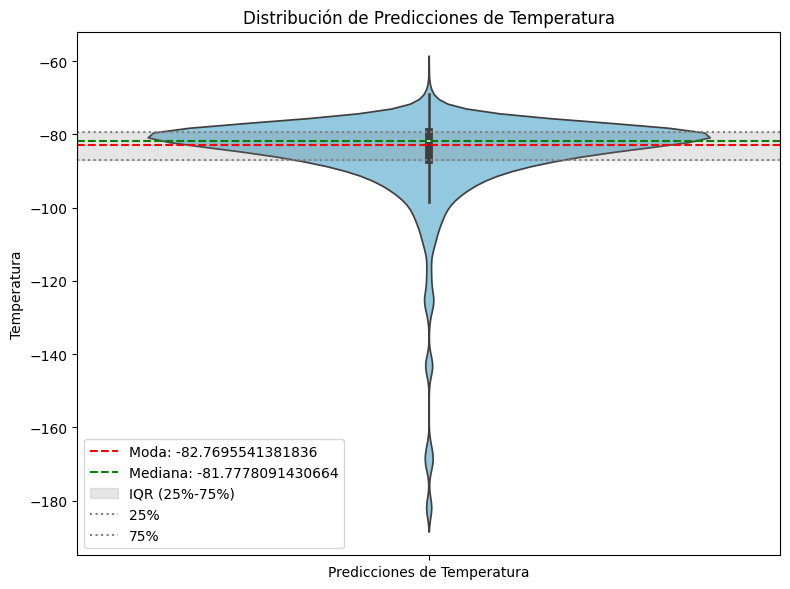

In [ ]:
representar_resultados_temperatura_violin_moda_mediana(BFT_FM10)

#### Predicciones con solo imagenes de Modelo A en modelo B

In [ ]:
import numpy as np
""" Introducimos directamente los datos del Modelo A en el B"""

def predecir_modelo_bft(modelo, model_b, conjuntos_datos_por_modelo):
    # Obtener las imágenes de prueba, temperaturas y EEF del diccionario de datos del modelo A
    imagenes_prueba_a = np.array(conjuntos_datos_por_modelo[modelo]['plateaux']['image']['test'])
    temperaturas_prueba_a = np.array(conjuntos_datos_por_modelo[modelo]['plateaux']['temperature']['test'])
    eef_prueba_a = np.array(conjuntos_datos_por_modelo[modelo]['plateaux']['eef']['test'])

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagenes_prueba_a,
                      'input_temperature_bft': temperaturas_prueba_a,
                      'input_eef_bft': eef_prueba_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones del modelo B
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    return predicciones_temp_b, predicciones_eef_b

In [ ]:
BFT_FM3_bft, EEF_FM3_bft= predecir_modelo_bft('FM3', best_model_b_completo_1, conjuntos_datos_por_modelo_1)

116/116 [==============================] - 16s 139ms/step


In [ ]:
BFT_FM6_bft, EEF_FM6_bft= predecir_modelo_bft('FM6', best_model_b_completo_1, conjuntos_datos_por_modelo_1)

93/93 [==============================] - 12s 126ms/step


In [ ]:
BFT_FM10_bft, EEF_FM10_bft= predecir_modelo_bft('FM10', best_model_b_completo_1, conjuntos_datos_por_modelo_1)

116/116 [==============================] - 13s 116ms/step


Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  3690.000000
mean                    -76.528809
std                       2.590636
min                     -89.205666
25%                     -77.692974
50%                     -76.630997
75%                     -75.499443
max                     -63.086658
Mediana de las Predicciones de Temperatura: -76.631
Incertidumbre (25% - Mediana): 1.0619773864746094
Incertidumbre (Mediana - 75%): 1.1315536499023438



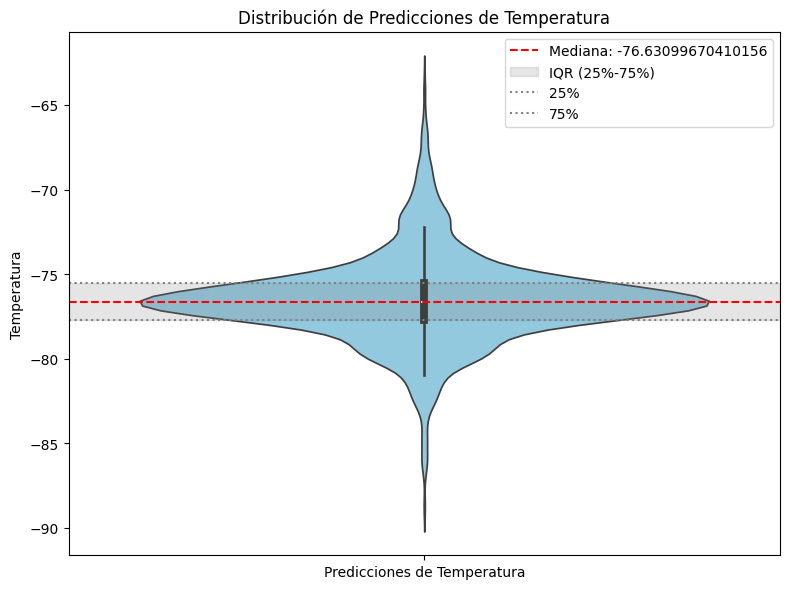

In [ ]:
representar_resultados_temperatura_violin_mediana(BFT_FM3_bft)

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  2952.000000
mean                    -83.169876
std                       7.748144
min                    -127.240829
25%                     -85.772795
50%                     -81.048592
75%                     -77.628252
max                     -70.903015
Mediana de las Predicciones de Temperatura: -81.04859
Incertidumbre (25% - Mediana): 4.724203109741211
Incertidumbre (Mediana - 75%): 3.420339584350586



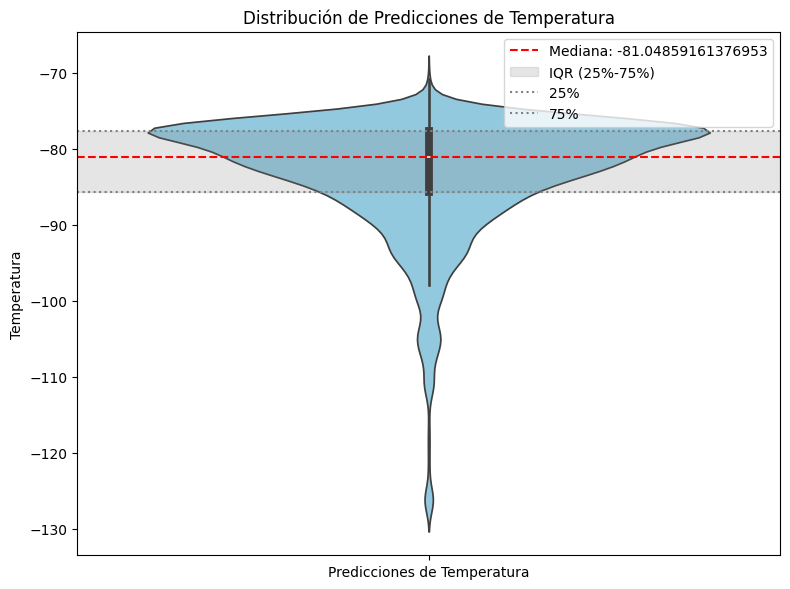

In [ ]:
representar_resultados_temperatura_violin_mediana(BFT_FM6_bft)

Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  3690.000000
mean                    -85.757805
std                      13.788709
min                    -183.126190
25%                     -87.024616
50%                     -81.777809
75%                     -79.345192
max                     -63.814289
Mediana de las Predicciones de Temperatura: -81.77781
Incertidumbre (25% - Mediana): 5.246807098388672
Incertidumbre (Mediana - 75%): 2.4326171875



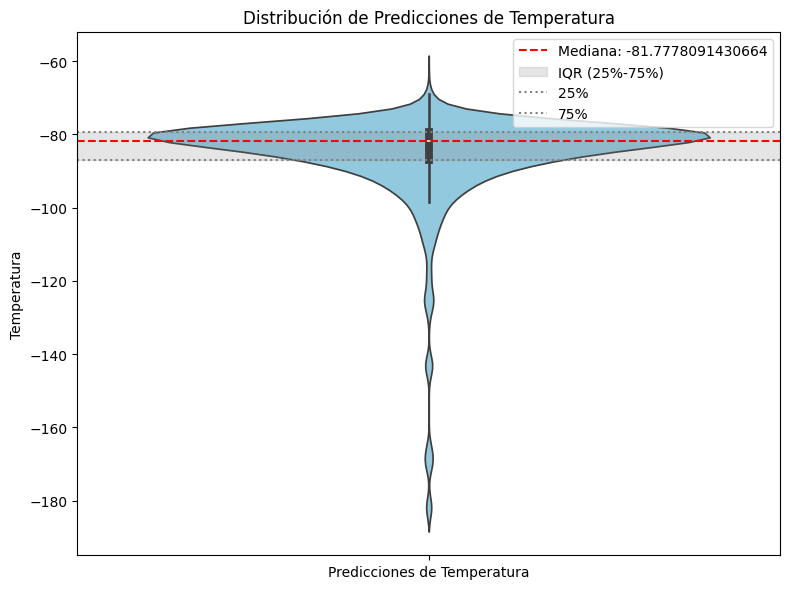

In [ ]:
representar_resultados_temperatura_violin_mediana(BFT_FM10_bft)

#### Predicciones con un -70 Plateaux FM10

In [ ]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
import pickle

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/FM10_imagenes_-70.pkl'

# Cargar el archivo pickle
with open(ruta_archivo, 'rb') as archivo:
    imagenes_recortadas_con_eef_plateaux_fm10_70 = pickle.load(archivo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
""" Funcion para eliminar el primer frame de cada fov"""

def eliminar_diccionarios_por_frame(diccionarios):
    # Crear un conjunto para almacenar los obsid únicos
    obsids_unicos = set(diccionario['obsid'] for diccionario in diccionarios)

    # Iterar sobre cada obsid único
    for obsid in obsids_unicos:
        # Filtrar los diccionarios con el mismo obsid
        diccionarios_mismo_obsid = [diccionario for diccionario in diccionarios if diccionario['obsid'] == obsid]

        # Iterar sobre los diccionarios con el mismo obsid
        for diccionario in diccionarios_mismo_obsid:
            # Filtrar los diccionarios con frame igual a 1
            diccionarios = [d for d in diccionarios if not (d['frame'] == 1 and d['fov_numero'] == diccionario['fov_numero'])]

    return diccionarios

# Uso de la función
imagenes_recortadas_con_eef_plateaux_fm10_70 = eliminar_diccionarios_por_frame(imagenes_recortadas_con_eef_plateaux_fm10_70)

In [ ]:
# Extraer imágenes y temperaturas fm10
imagenes_fm10_plateaux_70 = np.array([item['imagen_recortada'] for item in imagenes_recortadas_con_eef_plateaux_fm10_70])
temperaturas_fm10_plateaux_70 = np.array([item['Temperatura_TRP1'] for item in imagenes_recortadas_con_eef_plateaux_fm10_70])
eef_fm10_plateaux_70 = np.array([item['eef'] for item in imagenes_recortadas_con_eef_plateaux_fm10_70])

In [ ]:
print("Tamaño de imagenes", imagenes_fm10_plateaux_70.shape)
print("Tamaño etiquetas Temperatura", temperaturas_fm10_plateaux_70.shape)
print("Tamaño etiquetas EEF", eef_fm10_plateaux_70.shape)

Tamaño de imagenes (4920, 11, 11)
Tamaño etiquetas Temperatura (4920,)
Tamaño etiquetas EEF (4920,)


In [ ]:
conjuntos_datos_por_modelo_2 = conjuntos_datos_por_modelo.copy()

In [ ]:
conjuntos_datos_por_modelo_2['FM10_-70'] = {
    'imagenes': {'plateaux': imagenes_fm10_plateaux_70, 'bft': imagenes_fm10_bft},
    'temperatura': {'plateaux': temperaturas_fm10_plateaux_70, 'bft': temperaturas_fm10_bft},
    'eef': {'plateaux': eef_fm10_plateaux_70, 'bft': eef_fm10_bft}
}

In [ ]:
# Crear un diccionario para almacenar las variables organizadas por modelo
datos_por_modelo_2 = {
    'EM': {'imagenes': {'plateaux': imagenes_em_plateaux, 'bft': imagenes_em_bft},
           'temperatura': {'plateaux': temperaturas_em_plateaux, 'bft': temperaturas_em_bft},
           'eef': {'plateaux': eef_em_plateaux, 'bft': eef_em_bft}},
    'FM3': {'imagenes': {'plateaux': imagenes_fm3_plateaux, 'bft': imagenes_fm3_bft},
            'temperatura': {'plateaux': temperaturas_fm3_plateaux, 'bft': temperaturas_fm3_bft},
            'eef': {'plateaux': eef_fm3_plateaux, 'bft': eef_fm3_bft}},
    'FM6': {'imagenes': {'plateaux': imagenes_fm6_plateaux, 'bft': imagenes_fm6_bft},
            'temperatura': {'plateaux': temperaturas_fm6_plateaux, 'bft': temperaturas_fm6_bft},
            'eef': {'plateaux': eef_fm6_plateaux, 'bft': eef_fm6_bft}},
    'FM10': {'imagenes': {'plateaux': imagenes_fm10_plateaux, 'bft': imagenes_fm10_bft},
             'temperatura': {'plateaux': temperaturas_fm10_plateaux, 'bft': temperaturas_fm10_bft},
             'eef': {'plateaux': eef_fm10_plateaux, 'bft': eef_fm10_bft}},
    'FM10_70': {'imagenes': {'plateaux': imagenes_fm10_plateaux_70, 'bft': imagenes_fm10_bft},
                 'temperatura': {'plateaux': temperaturas_fm10_plateaux_70, 'bft': temperaturas_fm10_bft},
                 'eef': {'plateaux': eef_fm10_plateaux_70, 'bft': eef_fm10_bft}}
}


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

def obtener_imagenes(modelo, subtipo):
    # Suponiendo que los datos por modelo están estructurados como un diccionario
    return datos_por_modelo_2[modelo]['imagenes'][subtipo]

def obtener_temperaturas(modelo, subtipo):
    # Suponiendo que los datos por modelo están estructurados como un diccionario
    return datos_por_modelo_2[modelo]['temperatura'][subtipo]

def obtener_eef(modelo, subtipo):
    # Suponiendo que los datos por modelo están estructurados como un diccionario
    return datos_por_modelo_2[modelo]['eef'][subtipo]

conjuntos_datos_por_modelo_2 = {}

# Por cada modelo y subtipo, dividir los datos en entrenamiento, validación y prueba
# Si quieres añadir FM10 añádelo a la lista
for modelo in ["EM", "FM3", "FM6", "FM10", "FM10_70"]:
    conjuntos_datos_por_modelo_2[modelo] = {}
    for subtipo in ["plateaux", "bft"]:
        # Obtener los datos correspondientes al modelo y subtipo actual
        imagenes = obtener_imagenes(modelo, subtipo)
        temperaturas = obtener_temperaturas(modelo, subtipo)
        eef = obtener_eef(modelo, subtipo)

        # Dividir los datos en entrenamiento (70%), validación (15%) y prueba (15%)
        x_train, x_temp_val_test, temp_train, temp_val_test, eef_train, eef_val_test = train_test_split(imagenes, temperaturas, eef, test_size=0.3, random_state=1)
        x_valid, x_test, temp_valid, temp_test, eef_valid, eef_test = train_test_split(x_temp_val_test, temp_val_test, eef_val_test, test_size=0.5, random_state=1)

        # Ajustar la forma de los datos de imagen de entrenamiento y validación
        image_train = np.expand_dims(x_train, axis=-1)
        image_valid = np.expand_dims(x_valid, axis=-1)
        image_test = np.expand_dims(x_test, axis=-1)

        #Creamos diccionario
        conjuntos_datos_por_modelo_2[modelo][subtipo] = {
            "image": {
                "train": image_train,
                "valid": image_valid,
                "test": image_test
            },
            "temperature": {
                "train": temp_train,
                "valid": temp_valid,
                "test": temp_test
            },
            "eef": {
                "train": eef_train,
                "valid": eef_valid,
                "test": eef_test
            }
        }



In [ ]:
import os
import pickle

# Directorio donde deseas guardar el archivo
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre del archivo en el que guardar el diccionario
archivo = os.path.join(directorio, "conjuntos_datos_por_modelo_2.pkl")

# Guardar el diccionario en el archivo usando pickle
with open(archivo, 'wb') as f:
    pickle.dump(conjuntos_datos_por_modelo_2, f)

print("El diccionario conjuntos_datos_por_modelo_2 se ha guardado en el archivo", archivo)


El diccionario conjuntos_datos_por_modelo_2 se ha guardado en el archivo /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/conjuntos_datos_por_modelo_2.pkl


In [ ]:
import numpy as np

def predecir_modelo_2(modelo ,model_a, model_b, conjuntos_datos_por_modelo_2):
    # Obtener las imágenes de prueba, temperaturas y EEF del diccionario de datos del modelo A
    imagenes_prueba_a = np.array(conjuntos_datos_por_modelo_2[modelo]['plateaux']['image']['test'])
    temperaturas_prueba_a = np.array(conjuntos_datos_por_modelo_2[modelo]['plateaux']['temperature']['test'])
    eef_prueba_a = np.array(conjuntos_datos_por_modelo_2[modelo]['plateaux']['eef']['test'])

    # Obtener las predicciones del modelo A para las imágenes de prueba
    predicciones_temp_a, predicciones_eef_a = model_a.predict({'input_image': imagenes_prueba_a,
                                                               'input_temperature': temperaturas_prueba_a,
                                                               'input_eef': eef_prueba_a})

    # Preparar los datos para el modelo B
    datos_modelo_b = {'input_image_bft': imagenes_prueba_a,
                      'input_temperature_bft': predicciones_temp_a,
                      'input_eef_bft': predicciones_eef_a}

    # Obtener las predicciones del modelo B
    predicciones_b = model_b.predict(datos_modelo_b)

    # Desempaquetar las predicciones del modelo B
    predicciones_temp_b = predicciones_b[0]
    predicciones_eef_b = predicciones_b[1]

    return predicciones_temp_b, predicciones_eef_b

In [ ]:
BFT_FM10_70, EEF_FM10_70 = predecir_modelo_2('FM10_70', best_model_a_completo, best_model_b_completo, conjuntos_datos_por_modelo_2)

24/24 [==============================] - 3s 105ms/step


Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                   738.000000
mean                   -109.867867
std                      25.996162
min                    -245.660980
25%                    -110.912706
50%                    -103.771484
75%                     -98.999928
max                     -89.439415
Mediana de las Predicciones de Temperatura: -103.771484



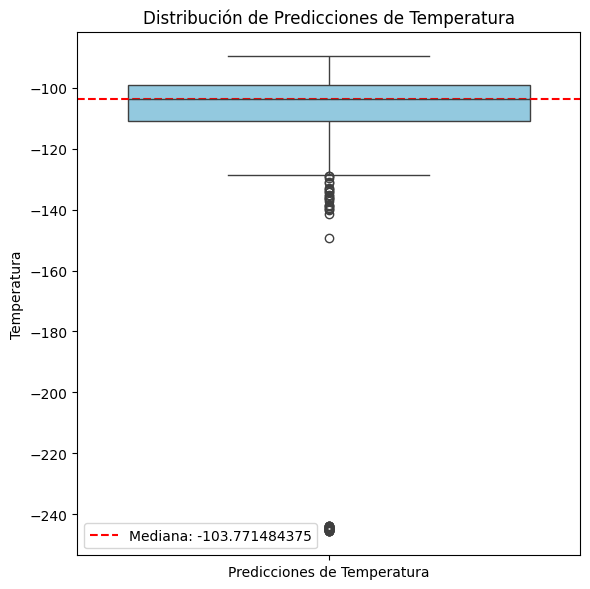

In [ ]:
representar_resultados_temperatura(BFT_FM10_70)

# Optimización Modelo final

Se realiza la optimización del modelo implementado con los datos de EM, FM3, FM6.

Se aplican los cambios implementados en el entrenamiento con los callbacks

## Importacion Datos

Importamos los datos que vamos a emplear para entrenar el modelo:

* dict_plateaux
* dict_bft

In [ ]:
import os
import pickle

# Directorio donde se encuentran los archivos de diccionario
directorio = "/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/data/"

# Nombre de los archivos de diccionario
archivo_dict_plateaux = os.path.join(directorio, "dict_plateaux.pkl")
archivo_dict_bft = os.path.join(directorio, "dict_bft.pkl")
archivo_dict_modelo_bft = os.path.join(directorio, "dict_modelo_bft.pkl")
archivo_dict_modelo_plateaux = os.path.join(directorio, "dict_modelo_plateaux.pkl")

# Cargar los diccionarios desde los archivos usando pickle
with open(archivo_dict_plateaux, 'rb') as f:
    dict_plateaux = pickle.load(f)

with open(archivo_dict_bft, 'rb') as f:
    dict_bft = pickle.load(f)

print("Los diccionarios se han cargado desde los archivos correspondientes.")

Los diccionarios se han cargado desde los archivos correspondientes.


## Definicion Modelo

* Función de pérdida personalizada: Puedes definir una función de pérdida personalizada que penalice más fuertemente las predicciones que se desvíen del intervalo de confianza del 95%.
* Métricas personalizadas: Puedes definir métricas personalizadas que evalúen qué porcentaje de las predicciones caen dentro del intervalo de confianza del 95% y también calcular el error promedio entre las predicciones y los valores reales.
* Validación cruzada: Puedes realizar validación cruzada para evaluar el rendimiento del modelo de manera más robusta y evitar el sobreajuste.
* Técnicas de regularización: Puedes aplicar técnicas de regularización para evitar el sobreajuste y mejorar la generalización del modelo.

### Modelo A

In [ ]:
# Importar librerías necesarias
import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras.backend as K

# Definir la función de pérdida personalizada
def custom_loss(y_true, y_pred):
    # Calcular la desviación estándar de las predicciones
    std_dev = K.std(y_pred, axis=0)

    # Calcular el intervalo de confianza del 95%
    lower_bound = K.mean(y_pred) - 1.96 * std_dev
    upper_bound = K.mean(y_pred) + 1.96 * std_dev

    # Calcular la pérdida
    loss = K.mean(K.square(K.maximum(0., K.abs(y_true - y_pred) - std_dev)))

    return loss

# Definir el modelo A
input_image = Input(shape=(11, 11, 1), name='input_image')
input_temperature = Input(shape=(1,), name='input_temperature')
input_eef = Input(shape=(1,), name='input_eef')

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_image)
x = MaxPooling2D((1, 1))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((1, 1))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((1, 1))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

regression_temperature_output = Dense(1, activation='linear', name='output_temperature')(x)
regression_eef_output = Dense(1, activation='linear', name='output_eef')(x)

# Construir el modelo A con la función de pérdida personalizada
model_a_completo_opt = Model(inputs=[input_image, input_temperature, input_eef],
                         outputs=[regression_temperature_output, regression_eef_output])

# Compilar el modelo A con la función de pérdida personalizada
optimizer = Adam(learning_rate=0.001)
model_a_completo_opt.compile(optimizer=optimizer,
                         loss={'output_temperature': custom_loss, 'output_eef': custom_loss},
                         metrics={'output_temperature': 'MAPE', 'output_eef': 'MAPE'})

model_a_completo_opt.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 11, 11, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 11, 11, 64)           640       ['input_image[0][0]']         
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 64)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 11, 11, 128)          73856     ['max_pooling2d_3[0][0]'

### Modelo B

In [ ]:
#Modelo B

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras.backend as K

# Definir la función de pérdida personalizada
def custom_loss(y_true, y_pred):
    # Calcular la desviación estándar de las predicciones
    std_dev = K.std(y_pred, axis=0)

    # Calcular el intervalo de confianza del 95%
    lower_bound = K.mean(y_pred) - 1.96 * std_dev
    upper_bound = K.mean(y_pred) + 1.96 * std_dev

    # Calcular la pérdida
    loss = K.mean(K.square(K.maximum(0., K.abs(y_true - y_pred) - std_dev)))

    return loss

#Definir modelo B

# Definir la entrada para las imágenes
input_img_bft = Input(shape=(11, 11, 1), name='input_image_bft')
input_temp_bft = Input(shape=(1,), name='input_temperature_bft')
input_eef_bft = Input(shape=(1,), name='input_eef_bft')

# Rama compartida de la red convolucional
x_bft = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Conv2D(128, (3, 3), activation='relu', padding='same')(x_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Conv2D(256, (3, 3), activation='relu', padding='same')(x_bft)
x_bft = MaxPooling2D((1, 1))(x_bft)
x_bft = Flatten()(x_bft)
x_bft = Dense(128, activation='relu')(x_bft)

# Rama de regresión de temperatura
output_temp_bft = Dense(1, activation='linear', name='output_temperature_bft')(x_bft)

# Rama de regresión de EEF
output_eef_bft = Dense(1, activation='linear', name='output_eef_bft')(x_bft)

# Construir el modelo B
model_b_completo_opt = Model(inputs=[input_img_bft, input_temp_bft, input_eef_bft],
                outputs=[output_temp_bft, output_eef_bft])

# Compilar el modelo B

# Definir el optimizador con la tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.001)

model_b_completo_opt.compile(optimizer=optimizer,
                         loss={'output_temperature_bft': custom_loss, 'output_eef_bft': custom_loss},
                         metrics={'output_temperature_bft': 'MAPE', 'output_eef_bft': 'MAPE'})

model_b_completo_opt.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image_bft (InputLaye  [(None, 11, 11, 1)]          0         []                            
 r)                                                                                               
                                                                                                  
 conv2d_9 (Conv2D)           (None, 11, 11, 64)           640       ['input_image_bft[0][0]']     
                                                                                                  
 max_pooling2d_9 (MaxPoolin  (None, 11, 11, 64)           0         ['conv2d_9[0][0]']            
 g2D)                                                                                             
                                                                                            

## Entrenamiento

### Modelo A

In [ ]:
# Convertir los datos de entrada y salida en arrays de NumPy
input_image_train = np.array(dict_plateaux['image']['train'])
input_temperature_train = np.array(dict_plateaux['temperature']['train'])
input_eef_train = np.array(dict_plateaux['eef']['train'])

output_temperature_train = np.array(dict_plateaux['temperature']['train'])
output_eef_train = np.array(dict_plateaux['eef']['train'])

input_image_valid = np.array(dict_plateaux['image']['valid'])
input_temperature_valid = np.array(dict_plateaux['temperature']['valid'])
input_eef_valid = np.array(dict_plateaux['eef']['valid'])

output_temperature_valid = np.array(dict_plateaux['temperature']['valid'])
output_eef_valid = np.array(dict_plateaux['eef']['valid'])

# Definir los callbacks
callbacks_a_2 = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_completo_opt.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

# Entrenar el modelo_a_completo con los callbacks
history_a_2 = model_a_completo_opt.fit(
    {'input_image': input_image_train,
     'input_temperature': input_temperature_train,
     'input_eef': input_eef_train},
    {'output_temperature': output_temperature_train,
     'output_eef': output_eef_train},
    epochs=10,
    batch_size=32,
    validation_data=(
        {'input_image': input_image_valid,
         'input_temperature': input_temperature_valid,
         'input_eef': input_eef_valid},
        {'output_temperature': output_temperature_valid,
         'output_eef': output_eef_valid}
    ),
    callbacks=callbacks_a_2
)



Epoch 1/10
1507/1507 [==============================] - ETA: 0s - loss: 4304.1216 - output_temperature_loss: 403.4397 - output_eef_loss: 3900.6687 - output_temperature_MAPE: 30.5638 - output_eef_MAPE: 51.6335
Epoch 1: val_loss improved from inf to 42.66057, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_completo_opt.h5
1507/1507 [==============================] - 597s 391ms/step - loss: 4304.1216 - output_temperature_loss: 403.4397 - output_eef_loss: 3900.6687 - output_temperature_MAPE: 30.5638 - output_eef_MAPE: 51.6335 - val_loss: 42.6606 - val_output_temperature_loss: 17.5668 - val_output_eef_loss: 25.0938 - val_output_temperature_MAPE: 21.1738 - val_output_eef_MAPE: 40.4142 - lr: 0.0010
Epoch 2/10
1507/1507 [==============================] - ETA: 0s - loss: 1.7364 - output_temperature_loss: 1.6050 - output_eef_loss: 0.1314 - output_temperature_MAPE: 7.6587 - output_eef_MAPE: 21.0170
Epoch 2: val_loss improved from 42.66057 to 1.73408, saving mode

### Modelo B

In [ ]:
# Convertir los datos de entrada y salida en arrays de NumPy
input_image_train_bft = np.array(dict_bft['image']['train'])
input_temperature_train_bft = np.array(dict_bft['temperature']['train'])
input_eef_train_bft = np.array(dict_bft['eef']['train'])

output_temperature_train_bft = np.array(dict_bft['temperature']['train'])
output_eef_train_bft = np.array(dict_bft['eef']['train'])

input_image_valid_bft = np.array(dict_bft['image']['valid'])
input_temperature_valid_bft = np.array(dict_bft['temperature']['valid'])
input_eef_valid_bft = np.array(dict_bft['eef']['valid'])

output_temperature_valid_bft = np.array(dict_bft['temperature']['valid'])
output_eef_valid_bft = np.array(dict_bft['eef']['valid'])


In [ ]:
import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Definir los callbacks
callbacks_b_2 = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_completo_opt.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

# Entrenar el modelo_b_completo con los callbacks
history_b_2_opt = model_b_completo_opt.fit(
    {'input_image_bft': input_image_train_bft,
     'input_temperature_bft': input_temperature_train_bft,
     'input_eef_bft': input_eef_train_bft},
    {'output_temperature_bft': output_temperature_train_bft,
     'output_eef_bft': output_eef_train_bft},
    epochs=10,
    batch_size=32,
    validation_data=(
        {'input_image_bft': input_image_valid_bft,
         'input_temperature_bft': input_temperature_valid_bft,
         'input_eef_bft': input_eef_valid_bft},
        {'output_temperature_bft': output_temperature_valid_bft,
         'output_eef_bft': output_eef_valid_bft}
    ),
    callbacks=callbacks_b_2
)

Epoch 1/10
356/356 [==============================] - ETA: 0s - loss: 70333.5078 - output_temperature_bft_loss: 59025.4766 - output_eef_bft_loss: 11308.0420 - output_temperature_bft_MAPE: 61.8799 - output_eef_bft_MAPE: 51.7319
Epoch 1: val_loss improved from inf to 635.14966, saving model to /content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_completo.h5
356/356 [==============================] - 130s 350ms/step - loss: 70333.5078 - output_temperature_bft_loss: 59025.4766 - output_eef_bft_loss: 11308.0420 - output_temperature_bft_MAPE: 61.8799 - output_eef_bft_MAPE: 51.7319 - val_loss: 635.1497 - val_output_temperature_bft_loss: 410.3905 - val_output_eef_bft_loss: 224.7593 - val_output_temperature_bft_MAPE: 29.4084 - val_output_eef_bft_MAPE: 35.3967 - lr: 0.0010
Epoch 2/10
356/356 [==============================] - ETA: 0s - loss: 16.9804 - output_temperature_bft_loss: 11.6514 - output_eef_bft_loss: 5.3290 - output_temperature_bft_MAPE: 32.3582 - output_eef_bft_MAPE: 36.

## Validación

### Modelo A

In [ ]:
from keras.models import load_model
import keras.backend as K
from keras import utils
import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

ruta_modelo ='/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_a_completo_opt.h5'

# Define la función de pérdida personalizada
def custom_loss(y_true, y_pred):
    # Calcular la desviación estándar de las predicciones
    std_dev = K.std(y_pred, axis=0)

    # Calcular el intervalo de confianza del 95%
    lower_bound = K.mean(y_pred) - 1.96 * std_dev
    upper_bound = K.mean(y_pred) + 1.96 * std_dev

    # Calcular la pérdida
    loss = K.mean(K.square(K.maximum(0., K.abs(y_true - y_pred) - std_dev)))

    return loss

# Registrar la función de pérdida personalizada
with utils.custom_object_scope({'custom_loss': custom_loss}):
    # Cargar el modelo
    best_model_a_completo_opt = load_model(ruta_modelo)



In [ ]:
# Convertir los datos de prueba de entrada y salida en arrays de NumPy
input_image_test = np.array(dict_plateaux['image']['test'])
input_temperature_test = np.array(dict_plateaux['temperature']['test'])
input_eef_test = np.array(dict_plateaux['eef']['test'])

output_temperature_test = np.array(dict_plateaux['temperature']['test'])
output_eef_test = np.array(dict_plateaux['eef']['test'])


# Evaluar model_a en el conjunto de datos de prueba
resultados = best_model_a_completo_opt.evaluate(
    {'input_image': input_image_test,
     'input_temperature': input_temperature_test,
     'input_eef': input_eef_test},
    {'output_temperature': output_temperature_test,
     'output_eef': output_eef_test}
)

print("Métricas de model_a:")
print(" - Loss total:", resultados[0])
print(" - Loss de la salida de temperatura:", resultados[1])
print(" - Loss de la salida de eef:", resultados[2])
print(" - MAE de la salida de temperatura:", resultados[3])
print(" - MAE de la salida de eef:", resultados[4])


323/323 [==============================] - 43s 131ms/step - loss: 0.2061 - output_temperature_loss: 0.2049 - output_eef_loss: 0.0011 - output_temperature_MAPE: 3.9733 - output_eef_MAPE: 12.1076
Métricas de model_a:
 - Loss total: 0.20605190098285675
 - Loss de la salida de temperatura: 0.20492391288280487
 - Loss de la salida de eef: 0.0011279790196567774
 - MAE de la salida de temperatura: 3.9733262062072754
 - MAE de la salida de eef: 12.107646942138672


In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento de model_a
history_a_2 = history_a_2.history

# Graficar la pérdida total y la pérdida de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_a_2['loss'], label='Loss total')
plt.plot(history_a_2['output_temperature_loss'], label='Loss de temperatura')
plt.plot(history_a_2['output_eef_loss'], label='Loss de eef')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_a_2['output_temperature_MAPE'], label='MAPE de temperatura')
plt.plot(history_a_2['output_eef_MAPE'], label='MAPE de eef')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'dict' object has no attribute 'history'

323/323 [==============================] - 35s 106ms/step


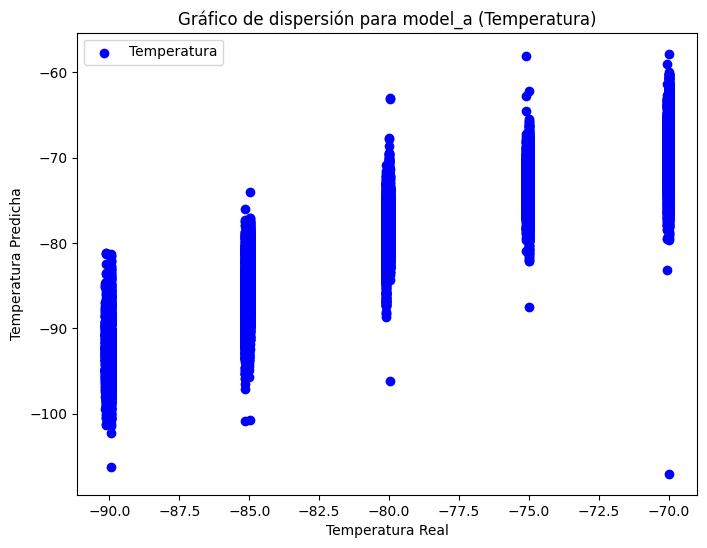

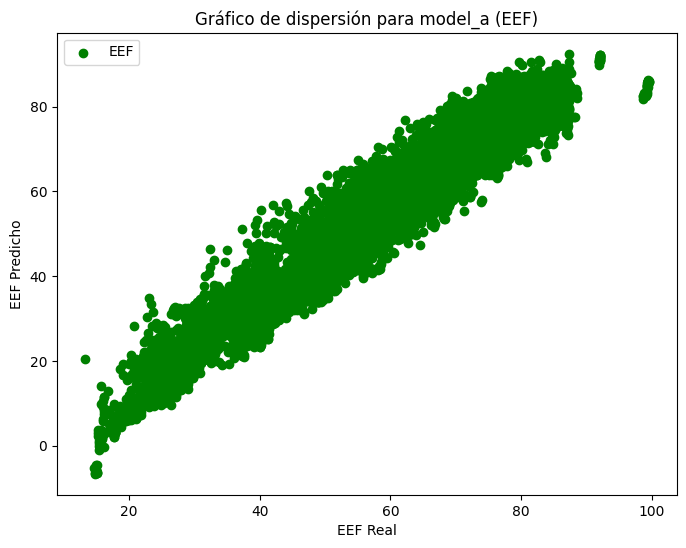

In [ ]:
import matplotlib.pyplot as plt

# Convertir los datos de entrada y salida en arrays de NumPy
input_image_test = np.array(dict_plateaux['image']['test'])
input_temperature_test = np.array(dict_plateaux['temperature']['test'])
input_eef_test = np.array(dict_plateaux['eef']['test'])

# Obtener predicciones de model_a
predictions_a_completo_opt = best_model_a_completo_opt.predict(
    {'input_image': input_image_test,
     'input_temperature': input_temperature_test,
     'input_eef': input_eef_test},)

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(input_temperature_test, predictions_a_completo_opt[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_a (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(input_eef_test, predictions_a_completo_opt[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_a (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()

### Modelo B

In [ ]:
from keras.models import load_model
import keras.backend as K
from keras import utils
import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

ruta_modelo ='/content/drive/MyDrive/Master_BigData/TFM/RedNeuronal/best_model_b_completo.h5'

# Define la función de pérdida personalizada
def custom_loss(y_true, y_pred):
    # Calcular la desviación estándar de las predicciones
    std_dev = K.std(y_pred, axis=0)

    # Calcular el intervalo de confianza del 95%
    lower_bound = K.mean(y_pred) - 1.96 * std_dev
    upper_bound = K.mean(y_pred) + 1.96 * std_dev

    # Calcular la pérdida
    loss = K.mean(K.square(K.maximum(0., K.abs(y_true - y_pred) - std_dev)))

    return loss

# Registrar la función de pérdida personalizada
with utils.custom_object_scope({'custom_loss': custom_loss}):
    # Cargar el modelo
    best_model_b_completo_opt = load_model(ruta_modelo)


In [ ]:
# Convertir los datos de prueba de entrada y salida en arrays de NumPy
input_image_test = np.array(dict_plateaux['image']['test'])
input_temperature_test = np.array(dict_plateaux['temperature']['test'])
input_eef_test = np.array(dict_plateaux['eef']['test'])

output_temperature_test = np.array(dict_plateaux['temperature']['test'])
output_eef_test = np.array(dict_plateaux['eef']['test'])


# Evaluar model_a en el conjunto de datos de prueba
resultados = best_model_b_completo_opt.evaluate(
    {'input_image': input_image_test,
     'input_temperature': input_temperature_test,
     'input_eef': input_eef_test},
    {'output_temperature': output_temperature_test,
     'output_eef': output_eef_test}
)

print("Métricas de model_a:")
print(" - Loss total:", resultados[0])
print(" - Loss de la salida de temperatura:", resultados[1])
print(" - Loss de la salida de eef:", resultados[2])
print(" - MAE de la salida de temperatura:", resultados[3])
print(" - MAE de la salida de eef:", resultados[4])


323/323 [==============================] - 29s 88ms/step - loss: 0.2061 - output_temperature_loss: 0.2049 - output_eef_loss: 0.0011 - output_temperature_MAPE: 3.9733 - output_eef_MAPE: 12.1076
Métricas de model_a:
 - Loss total: 0.20605190098285675
 - Loss de la salida de temperatura: 0.20492391288280487
 - Loss de la salida de eef: 0.0011279790196567774
 - MAE de la salida de temperatura: 3.9733262062072754
 - MAE de la salida de eef: 12.107646942138672


KeyError: 'output_temperature_loss'

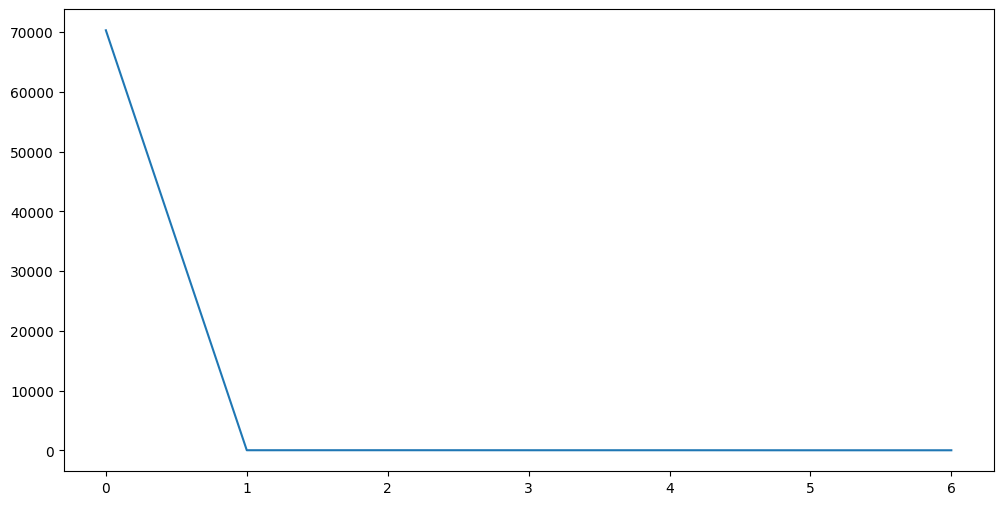

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento de model_a
history_b_2_opt = history_b_2_opt.history

# Graficar la pérdida total y la pérdida de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_b_2_opt['loss'], label='Loss total')
plt.plot(history_b_2_opt['output_temperature_loss'], label='Loss de temperatura')
plt.plot(history_b_2_opt['output_eef_loss'], label='Loss de eef')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE de temperatura y eef
plt.figure(figsize=(12, 6))
plt.plot(history_b_2_opt['output_temperature_MAPE'], label='MAPE de temperatura')
plt.plot(history_b_2_opt['output_eef_MAPE'], label='MAPE de eef')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE del modelo A durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


77/77 [==============================] - 9s 119ms/step


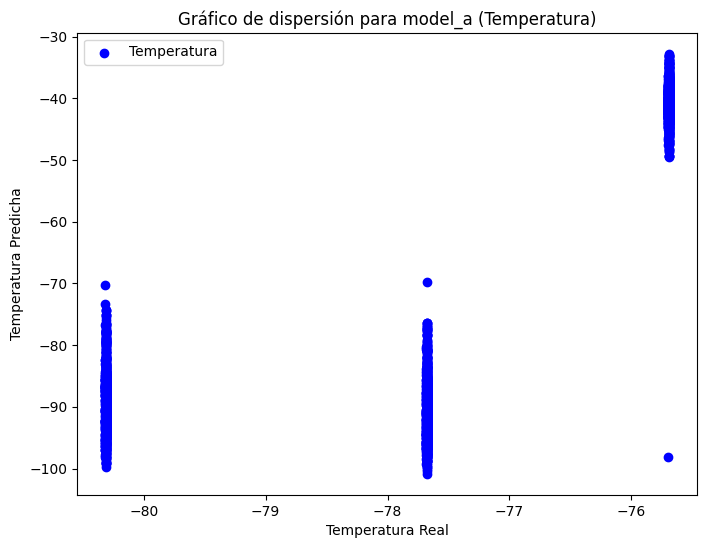

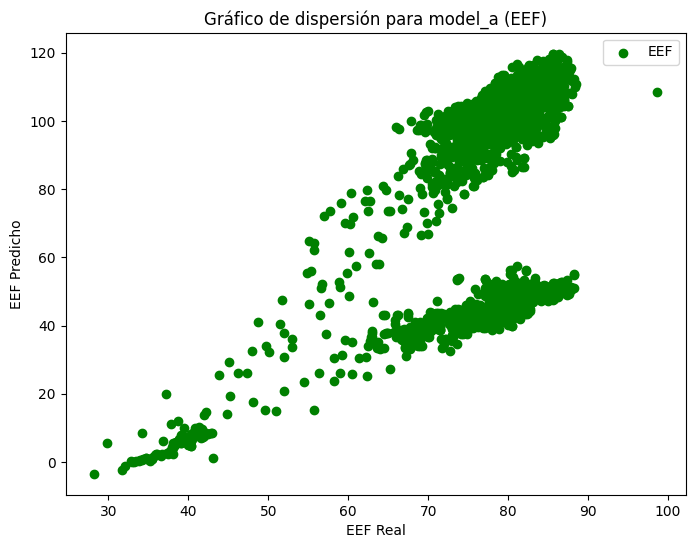

In [ ]:
import matplotlib.pyplot as plt

# Convertir los datos de entrada y salida en arrays de NumPy
input_image_test = np.array(dict_bft['image']['test'])
input_temperature_test = np.array(dict_bft['temperature']['test'])
input_eef_test = np.array(dict_bft['eef']['test'])

# Obtener predicciones de model_a
predictions_b_completo_opt = best_model_b_completo_opt.predict(
    {'input_image_bft': input_image_test,
     'input_temperature_bft': input_temperature_test,
     'input_eef_bft': input_eef_test},)

# Graficar dispersión para temperatura
plt.figure(figsize=(8, 6))
plt.scatter(input_temperature_test, predictions_b_completo_opt[0], color='blue', label='Temperatura')
plt.title('Gráfico de dispersión para model_a (Temperatura)')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.legend()
plt.show()

# Graficar dispersión para EEF
plt.figure(figsize=(8, 6))
plt.scatter(input_eef_test, predictions_b_completo_opt[1], color='green', label='EEF')
plt.title('Gráfico de dispersión para model_a (EEF)')
plt.xlabel('EEF Real')
plt.ylabel('EEF Predicho')
plt.legend()
plt.show()

## Predicción

In [ ]:
BFT_FM3_opt, EEF_FM3_opt = predecir_modelo('FM3', best_model_a_completo_opt, best_model_b_completo_opt, conjuntos_datos_por_modelo_1)

116/116 [==============================] - 14s 119ms/step


Estadísticas de Predicciones de Temperatura:
       Predicciones de Temperatura
count                  3690.000000
mean                    -49.317596
std                       6.962235
min                     -64.098885
25%                     -53.726182
50%                     -51.612850
75%                     -48.685154
max                     -28.529991
Mediana de las Predicciones de Temperatura: -51.61285
Incertidumbre (25% - Mediana): 2.1133317947387695
Incertidumbre (Mediana - 75%): 2.9276962280273438



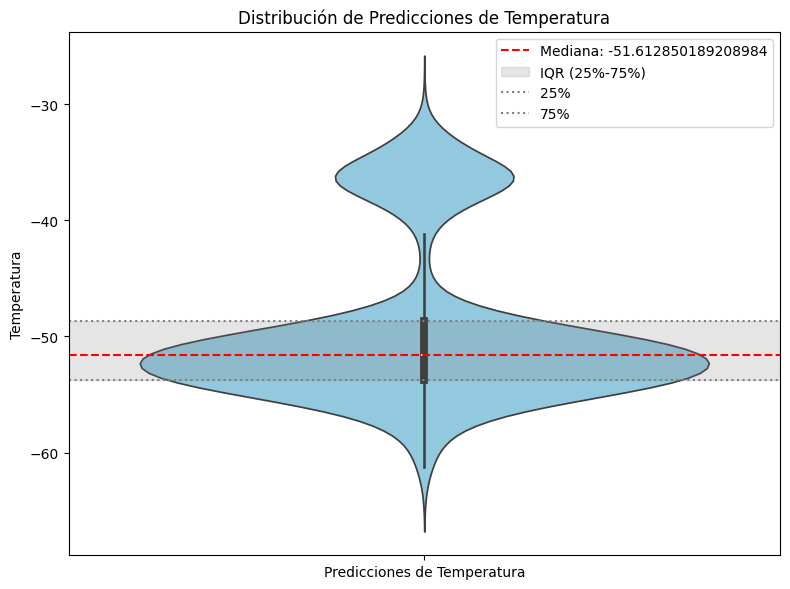

In [ ]:
representar_resultados_temperatura_violin(BFT_FM3_opt)